# Net distance: DVL and FFT measurements


### Installing to virtual environment:
- In terminal, write: _source myenv/bin/activate_
- Install package

## Loading the Rosbag and printing Topics

In [3]:
import rosbag
# Path to your ROS bag file
bag_file_path = "2023-10-31-14-28-26.bag"

# Open the bag file
bag = rosbag.Bag(bag_file_path)

# Get the list of topics
topics = bag.get_type_and_topic_info().topics.keys()

# Print the list of topics
for topic in topics:
    print(topic)



# Have to find the time of the first  message to get when ROV start
for topic, msg, t in bag.read_messages():
    ROV_start_time = t # time since last epoch [ns]
    break

/bluerov2/bluerov2_alive
/bluerov2/bluerov2_armed
/bluerov2/image
/bluerov2_modes
/commanded_thrust
/controller/pid_x
/controller/pid_y
/controller/pid_yaw
/controller/pid_z
/gui/netFollowing_manager
/gui/sensor/ping360
/guidance
/joystick/dead_reckoning_reset
/joystick/joystick_init
/joystick/joystick_thrust
/navigation/plane_approximation
/navigation/plane_approximation_position
/rosout
/rosout_agg
/sensor/attitude
/sensor/depth_temperature
/sensor/dvl_position
/sensor/dvl_reset_position
/sensor/dvl_velocity
/sensor/imu
/sensor/ping
/sensor/ping360
/sensor/usbl
/ted/image


In [2]:
for topic, msg, t in bag.read_messages('/sensor/ping360'):
    print(msg)
    unknown_data = msg.data
    break

len(unknown_data)
    

header: 
  seq: 1
  stamp: 
    secs: 1698758910
    nsecs:  54940700
  frame_id: ''
mode: 0
gain_setting: 0
transmit_duration: 32
sample_period: 80
transmit_frequency: 740
number_of_samples: 1024
angle_ping360: 0
angle_step: 3
angle_deg: 99.0
data: [73, 146, 192, 228, 247, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 254, 247, 240, 230, 215, 211, 211, 212, 214, 214, 214, 214, 214, 215, 215, 216, 215, 216, 216, 216, 216, 214, 212, 210, 207, 204, 202, 201, 200, 200, 200, 200, 200, 201, 202, 203, 203, 203, 202, 202, 200, 198, 195, 192, 190, 187, 183, 179, 175, 170, 167, 161, 155, 152, 150, 149, 149, 151, 152, 154, 155, 156, 158, 159, 159, 158, 158, 157, 155, 154, 152, 150, 148, 146, 142, 140, 138, 135, 132, 130, 128, 126, 125, 124, 123, 121, 121, 120, 119, 

1024

In [3]:
'''for topic, msg, t in bag.read_messages('/navigation/plane_approximation'):
    print(msg)'''

for topic, msg, t in bag.read_messages('/gui/netFollowing_manager'):
    print(msg)
    

header: 
  seq: 7
  stamp: 
    secs: 1698758911
    nsecs: 444487571
  frame_id: "nf_manager_frame"
d_depth: 0.0
d_net_distance: 2.0
d_net_velocity_horizontal: 0.20000000298023224
d_net_velocity_vertical: 0.0
offset_net_heading: 0.0
header: 
  seq: 8
  stamp: 
    secs: 1698758912
    nsecs: 440650463
  frame_id: "nf_manager_frame"
d_depth: 0.0
d_net_distance: 2.0
d_net_velocity_horizontal: 0.20000000298023224
d_net_velocity_vertical: 0.0
offset_net_heading: 0.0
header: 
  seq: 9
  stamp: 
    secs: 1698758913
    nsecs: 441647768
  frame_id: "nf_manager_frame"
d_depth: 0.0
d_net_distance: 2.0
d_net_velocity_horizontal: 0.20000000298023224
d_net_velocity_vertical: 0.0
offset_net_heading: 0.0
header: 
  seq: 10
  stamp: 
    secs: 1698758914
    nsecs: 432645559
  frame_id: "nf_manager_frame"
d_depth: 0.0
d_net_distance: 2.0
d_net_velocity_horizontal: 0.20000000298023224
d_net_velocity_vertical: 0.0
offset_net_heading: 0.0
header: 
  seq: 11
  stamp: 
    secs: 1698758915
    nsecs: 43

In [4]:
''' # Dictionary to store the first message from each topic
first_messages = {}

# Iterate over all messages in the bag
for topic, msg, t in bag.read_messages():
    # If this topic hasn't been encountered before, store its first message
    if topic not in first_messages:
        first_messages[topic] = msg
        # Print the topic and the first message
        print("Topic:", topic)
        print("First Message:", msg)
        #break  # Break after printing the first message from each topic
'''

' # Dictionary to store the first message from each topic\nfirst_messages = {}\n\n# Iterate over all messages in the bag\nfor topic, msg, t in bag.read_messages():\n    # If this topic hasn\'t been encountered before, store its first message\n    if topic not in first_messages:\n        first_messages[topic] = msg\n        # Print the topic and the first message\n        print("Topic:", topic)\n        print("First Message:", msg)\n        #break  # Break after printing the first message from each topic\n'

## Input Stereo Vision Image

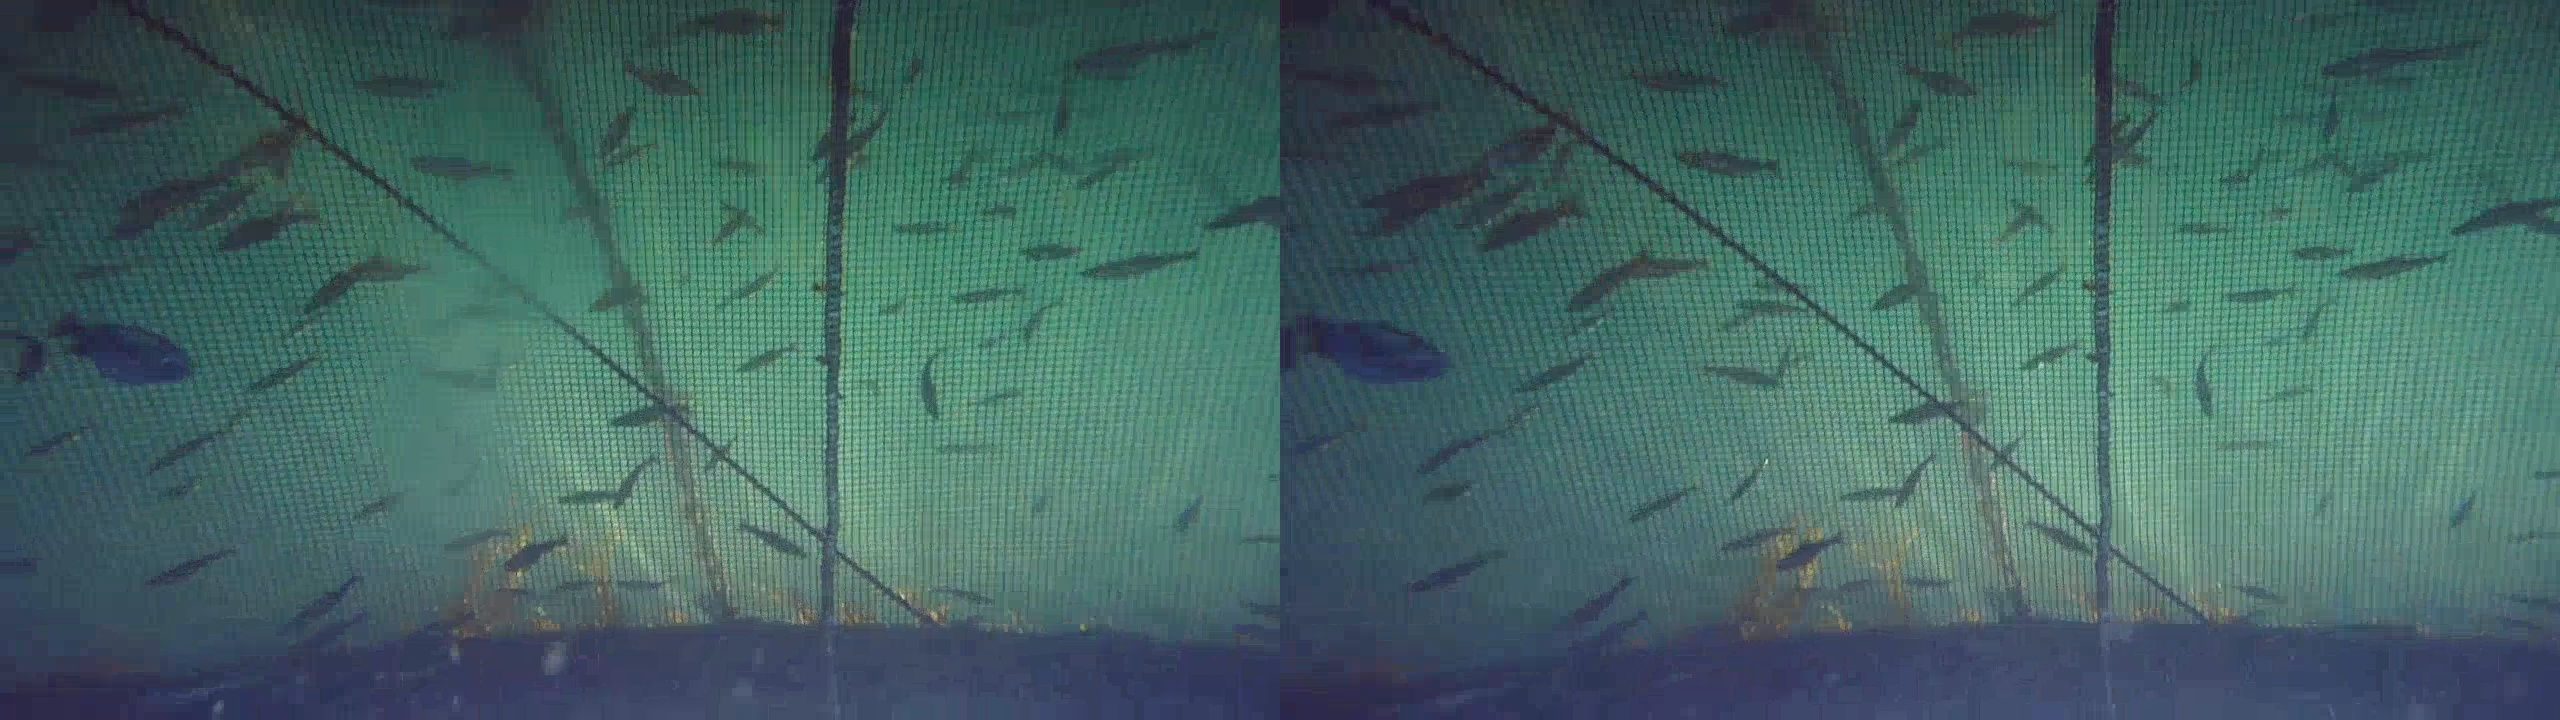

In [5]:
from sensor_msgs.msg import Image
import cv2
from cv_bridge import CvBridge
from IPython.display import display, Image as IPImage


frame = 1
# Iterate over the messages in the bag
for topic, msg, t in bag.read_messages(topics=['/ted/image']):
    bridge = CvBridge()
    cv_image = bridge.imgmsg_to_cv2(msg, desired_encoding="bgr8")

    if frame == 1510:
       cv2.imwrite("image_1500.jpg", cv_image)
       display(IPImage(filename="image_1500.jpg", width = 600))
       break  
        
    frame += 1

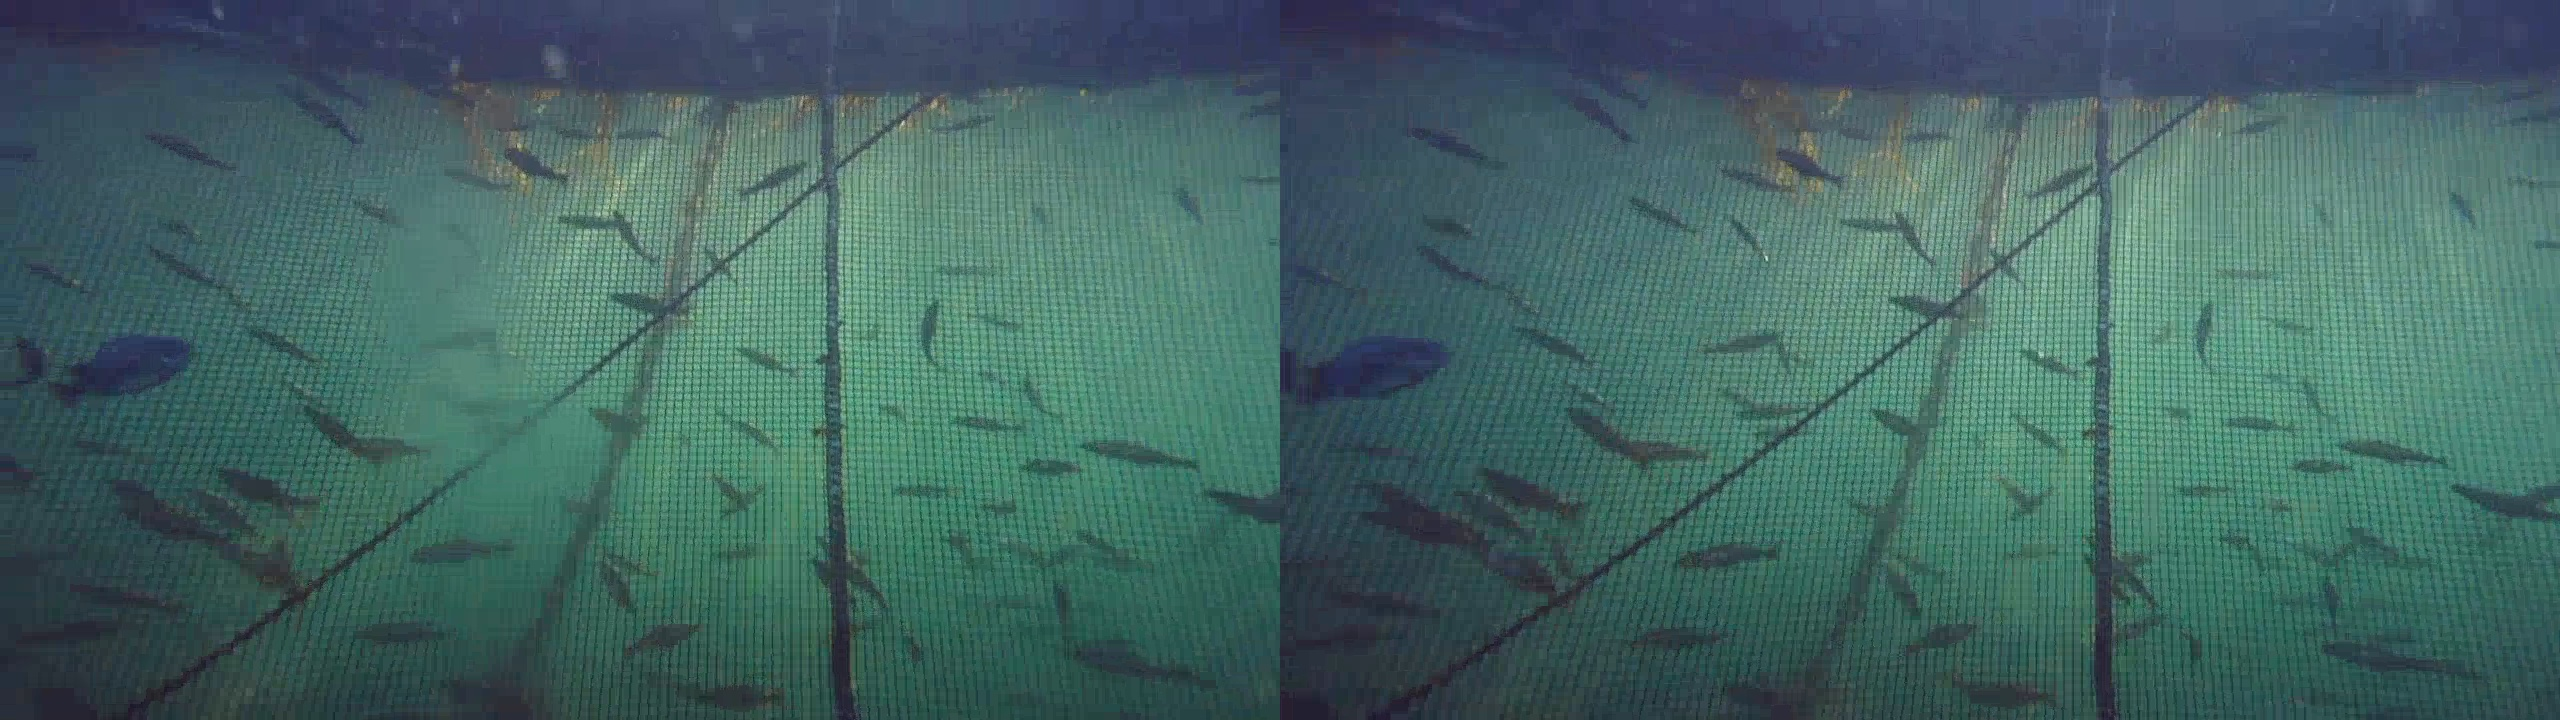

In [6]:
from sensor_msgs.msg import Image
import cv2
from cv_bridge import CvBridge
from IPython.display import display, Image as IPImage

frame = 1

# Iterate over the messages in the bag
for topic, msg, t in bag.read_messages(topics=['/ted/image']):
    bridge = CvBridge()
    cv_image = bridge.imgmsg_to_cv2(msg, desired_encoding="bgr8")

    if frame == 1510:
        # Flip the image vertically
        flipped_image = cv2.flip(cv_image, 0)
        
        # Save the flipped image
        cv2.imwrite("flipped_image_1500.jpg", flipped_image)
        
        # Display the flipped image
        display(IPImage(filename="flipped_image_1500.jpg", width=600))
        break  
    
    frame += 1


## Save Left and Right Images Individually

In [11]:
import os
from IPython.display import HTML
from IPython.display import Markdown



# Create the directory for images
os.makedirs("SV_images_left", exist_ok=True)
os.makedirs("SV_images_right", exist_ok=True)
os.makedirs("SV_images", exist_ok=True)

frame = 0
time_stereo = []
# Iterate over the messages in the bag
for topic, msg, t in bag.read_messages(topics=['/ted/image']):
    bridge = CvBridge()
    cv_image = bridge.imgmsg_to_cv2(msg, desired_encoding="bgr8")
    time_stereo.append(t)

    SV_image_path = os.path.join("SV_images", f"left_image_{frame}.jpg")
    # Save the left image
    cv2.imwrite(SV_image_path, cv_image)


    # Have to flip the image since it from the dataset is up_down.
    #flipped_image = cv2.flip(cv_image, 0)

    
    # Split the stereo image into left and right images
    height, width, _ = cv_image.shape
    half_width = width // 2
    left_image = cv_image[:, :half_width, :]
    right_image = cv_image[:, half_width:, :]
    
    left_image_path = os.path.join("SV_images_left", f"left_image_{frame}.jpg")
    # Save the left image
    cv2.imwrite(left_image_path, left_image)
    
    # Save the right image
    right_image_path = os.path.join("SV_images_right", f"right_image_{frame}.jpg")
    cv2.imwrite(right_image_path, right_image) 
    
    # Display an example of left and right image
    if frame == 2500:
        display(Markdown("### |......................................Example: Image frame 2554........................................|"))
        display(Markdown("### |.................... Left Image ......................|................... Right Image .....................|"))
        # Define HTML code to display images side by side
        html_code = f'<img src="{left_image_path}" style="width:300px; display:inline; margin:0px;"> <img src="{right_image_path}" style="width:300px; display:inline; margin:0px;">'
        display(HTML(html_code))
        display(Markdown("### |............................................................................................................................|"))
  
    if frame == 20:
        display(Markdown(f"### |......................................Example: Image frame 20........................................|"))
        display(Markdown("### |.................... Left Image ......................|................... Right Image .....................|"))
        # Define HTML code to display images side by side
        html_code = f'<img src="{left_image_path}" style="width:300px; display:inline; margin:0px;"> <img src="{right_image_path}" style="width:300px; display:inline; margin:0px;">'
        display(HTML(html_code))
        display(Markdown("### |............................................................................................................................|"))
  
        
    frame += 1


### |......................................Example: Image frame 20........................................|

### |.................... Left Image ......................|................... Right Image .....................|

### |............................................................................................................................|

### |......................................Example: Image frame 2554........................................|

### |.................... Left Image ......................|................... Right Image .....................|

### |............................................................................................................................|

## Create Video of Left and Right Images

In [47]:
# Function to extract the numeric part of a string
def extract_number(s):
    return int(''.join(filter(str.isdigit, s)))

def create_left_right_videos(left_images_folder, right_images_folder, left_video_filename, right_video_filename):
    # List comprehension to generate sorted file paths
    left_image_files = sorted([os.path.join(left_images_folder, f) for f in os.listdir(left_images_folder) if f.endswith('.jpg')], key=extract_number)
    right_image_files = sorted([os.path.join(right_images_folder, f) for f in os.listdir(right_images_folder) if f.endswith('.jpg')], key=extract_number)


    fps = 25  # Frames per second
    frame_width, frame_height = cv2.imread(left_image_files[0]).shape[1], cv2.imread(left_image_files[0]).shape[0] # 1280, 720

    left_video_writer = cv2.VideoWriter(left_video_filename, cv2.VideoWriter_fourcc(*'XVID'), fps, (frame_width, frame_height))
    right_video_writer = cv2.VideoWriter(right_video_filename, cv2.VideoWriter_fourcc(*'XVID'), fps, (frame_width, frame_height))

    # Add images to the video
    for image_file in left_image_files:
        frame = cv2.imread(image_file)
        left_video_writer.write(frame)

    for image_file in right_image_files:
        frame = cv2.imread(image_file)
        right_video_writer.write(frame)
        
    left_video_writer.release()
    right_video_writer.release()

    print(f"Videoes saved as '{left_video_filename}' and '{right_video_filename}' ")

create_left_right_videos("SV_images_left", "SV_images_right", "SV_video_left.avi", "SV_video_right.avi")

Videoes saved as 'SV_video_left.avi' and 'SV_video_right.avi' 


Convert: ffmpeg -i 20240312_100444_dist_ori_analysis_SV_video_right_fr0000.avi -c:v libx264 -preset slow -crf 22 -c:a aac -b:a 128k output.mp4

# Images that are directly from dataset.
<div style="display: flex; flex-direction: row;">
    <div>
        <h5>Left video:</h5>
        <video width="640" height="360" controls>
            <source src="mp4_from_converter/SV_video_left.mp4" type="video/mp4">
        </video>
    </div>
    <div>
        <h5>Right video:</h5>
        <video width="640" height="360" controls>
            <source src="mp4_from_converter/SV_video_right.mp4" type="video/mp4">
        </video>
    </div>
</div>

# Images that are flipped so that they are the right way.
<div style="display: flex; flex-direction: row;">
    <div>
        <h5>Left video:</h5>
        <video width="640" height="360" controls>
            <source src="mp4_from_converter/SV_video_left_turned.mp4" type="video/mp4">
        </video>
    </div>
    <div>
        <h5>Right video:</h5>
        <video width="640" height="360" controls>
            <source src="mp4_from_converter/SV_video_right_turned.mp4" type="video/mp4">
        </video>
    </div>
</div>



## Extract frame number of test, train, validate for YOLO

In [9]:
import os

def extract_image_numbers(left_folder):
    train_numbers = []
    test_numbers = []
    validate_numbers = []

    # Iterate over the left images folders (train, validate, test)
    for folder_name in os.listdir(left_folder):
        # Filter out .DS_Store files and exclude .txt files
        if folder_name == '.DS_Store' or folder_name.endswith('.txt'):
            continue
        
        left_images_folder = os.path.join(left_folder, folder_name)
        
        # Determine which list to append the numbers to based on the folder name
        if folder_name == 'train':
            numbers_list = train_numbers
        elif folder_name == 'test':
            numbers_list = test_numbers
        elif folder_name == 'validate':
            numbers_list = validate_numbers
        else:
            continue
        
        # Iterate over the left images in the current folder
        for left_image_name in os.listdir(left_images_folder):
            # Check if the filename matches the expected pattern and is a JPG file
            if not left_image_name.startswith("left_image_") or not left_image_name.lower().endswith(".jpg"):
                continue
            
            try:
                # Extract the image number from the left image name
                image_number = left_image_name.split("_")[2].split(".")[0]
                
                # Append the number to the appropriate list
                numbers_list.append(int(image_number))
            except IndexError:
                print(f"Ignored {left_image_name} due to invalid filename format")
            except ValueError:
                print(f"Ignored {left_image_name} due to non-numeric image number")

    return train_numbers, test_numbers, validate_numbers

# Replace this path with your actual folder path
left_images_folder = "../data/left"

train_numbers, test_numbers, validate_numbers = extract_image_numbers(left_images_folder)


## Split right and left images

In [37]:
import os
import cv2

# Create folders 'SV_test_images_left' and 'SV_test_images_right' if they don't exist
os.makedirs("SV_test_images_left", exist_ok=True)
os.makedirs("SV_test_images_right", exist_ok=True)

# Loop over images in folder 'SV_images_test'
for image_file in os.listdir("SV_images_test"):
    # Read the stereo image
    stereo_image_path = os.path.join("SV_images_test", image_file)
    cv_image = cv2.imread(stereo_image_path)
    
    # Split the stereo image into left and right images
    height, width, _ = cv_image.shape
    half_width = width // 2
    left_image = cv_image[:, :half_width, :]
    right_image = cv_image[:, half_width:, :]
    
    # Get the frame number from the image filename (assuming the filename format is 'left_image_<frame>.jpg')
    frame = int(image_file.split("_")[2].split(".")[0])
    
    # Save the left image
    left_image_path = os.path.join("SV_test_images_left", f"left_image_{frame}.jpg")
    cv2.imwrite(left_image_path, left_image)
    
    # Save the right image
    right_image_path = os.path.join("SV_test_images_right", f"right_image_{frame}.jpg")
    cv2.imwrite(right_image_path, right_image)

print("Images split and saved successfully.")


Images split and saved successfully.


## Create Test SV video, left and right videos, and time array of test frames

In [46]:
import os
import shutil

source_folder = 'SV_images'
destination_folder = 'SV_images_test'

# Iterate over the frame numbers in test_numbers
for frame in test_numbers:
    # Iterate over the files in the source folder
    for image in os.listdir(source_folder):
        # Extract the frame number from the image filename
        image_frame_number = image.split("_")[2].split(".")[0]
        # Check if the frame number matches
        if frame == int(image_frame_number):
            # Build the full file paths
            source_path = os.path.join(source_folder, image)
            destination_path = os.path.join(destination_folder, image)
            # Copy the file to the destination folder
            shutil.copyfile(source_path, destination_path)
            # Break the loop after finding a match
            break  # Exit the inner loop since we found the matching image


In [23]:
SV_video_filename = 'SV_video_test.avi'

fps = 25  # Frames per second

SV_image_files = sorted([os.path.join("SV_images_test", f) for f in os.listdir("SV_images_test") if f.endswith('.jpg')], key=extract_number)

frame_width, frame_height = cv2.imread(SV_image_files[0]).shape[1], cv2.imread(SV_image_files[0]).shape[0]

SV_video_writer = cv2.VideoWriter(SV_video_filename, cv2.VideoWriter_fourcc(*'XVID'), fps, (frame_width, frame_height))

for image_file in SV_image_files:
    frame = cv2.imread(image_file)
    SV_video_writer.write(frame)
      
SV_video_writer.release()

print(f"Video saved as {SV_video_filename}")

Video saved as SV_video_test.avi


In [48]:
create_left_right_videos('SV_test_images_left', 'SV_test_images_right', 'SV_test_video_left.avi', 'SV_test_video_right.avi')

Videoes saved as 'SV_test_video_left.avi' and 'SV_test_video_right.avi' 


## Get time array SV images test

In [35]:
time_SV_test = []

for i in range(len(time_stereo)):
    for frame in sorted(test_numbers):
        if i == frame:
            time_SV_test.append((time_stereo[i] - ROV_start_time).to_sec())

print(len(time_SV_test))
print(time_SV_test)

2737
[35.830105, 35.8679197, 35.8988517, 35.9447749, 35.9767273, 36.0192066, 36.099278, 36.1738789, 36.2217567, 36.2647192, 36.2997054, 36.3475485, 36.4701439, 36.4970518, 36.540301, 36.5752489, 36.6328873, 36.7037029, 36.7501413, 36.7864084, 36.8291279, 36.8711201, 36.9024796, 36.9501812, 36.9771565, 37.0269883, 37.0734495, 37.102649, 37.1813528, 37.2208281, 37.2667463, 37.2974484, 37.3399444, 37.3738068, 37.4974814, 37.5421648, 37.6191598, 37.6629223, 37.6997075, 37.7406704, 37.786398, 37.8220543, 37.8685024, 37.8998552, 37.9351745, 37.9942571, 38.0178258, 38.0690304, 38.0973578, 38.1427692, 38.1946533, 38.2201652, 38.2664032, 38.2989862, 38.3404629, 38.3888377, 38.4268753, 38.47207, 38.5013423, 38.545052, 38.5726014, 38.6177679, 38.6993725, 38.740918, 38.7734338, 38.8194641, 38.8617832, 38.9368007, 38.9846053, 39.015741, 39.0619764, 39.1067453, 39.1389167, 39.1837761, 39.2166207, 39.2604277, 39.3450633, 39.3863716, 39.431898, 39.4647259, 39.5122973, 39.5483307, 39.5871857, 39.621935

## Get time array FFT

In [102]:
# Calculate when fist stereo image was taken

time_diff_stereo_ROV = (time_stereo[0] - ROV_start_time).to_sec()   
FFT_time = [time_diff_stereo_ROV]

# Calculate time differences between consecutive elements
for i in range(1, len(time_stereo)):
    time_diff = time_stereo[i] - time_stereo[i - 1]

    FFT_time.append(time_diff.to_sec()+ FFT_time[i - 1])

## FFT method net distance
From Christians code, I added writing a file that saves the FFT estimated distance, the frame and whether the net is:
- WELL DETECTED = 2
- MEDIUM DETECTED = 1
- NOT DETECTED = 0

Each line in the file is structured like this:

- Detection_value frame distance
- 0 1 0.98888


## FFT method videos 

Running Charistians code, thi is the output video
<div style="display: flex; flex-direction: row;">
    <div>
        <h5>Left video:</h5>
        <video width="640" height="360" controls>
            <source src="mp4_from_converter/20240309_210735_dist_ori_analysis_SV_video_left_fr0000.mp4" type="video/mp4">
        </video>
    </div>
    <div>
        <h5>Right video:</h5>
        <video width="640" height="360" controls>
            <source src="mp4_from_converter/20240309_210735_dist_ori_analysis_SV_video_left_fr0000.mp4" type="video/mp4">
        </video>
    </div>
</div>


## Turned videos
<div style="display: flex; flex-direction: row;">
    <div>
        <h5>Left video:</h5>
        <video width="640" height="360" controls>
            <source src="mp4_from_converter/FFT_SV_left_turned.mp4" type="video/mp4">
        </video>
    </div>
    <div>
        <h5>Right video:</h5>
        <video width="640" height="360" controls>
            <source src="mp4_from_converter/FFT_SV_right_turned.mp4" type="video/mp4">
        </video>
    </div>
</div>

# Get desired net distance

In [103]:
net_dist_d = []
time_dist_d = []

for topic, msg, t in bag.read_messages(topics=['/gui/netFollowing_manager']):
    net_dist_d.append(msg.d_net_distance * 100)
    time_d = (t - ROV_start_time).to_sec()
    time_dist_d.append(time_d)

print(net_dist_d)
print(time_dist_d)

[200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 110.00000238418579, 189.9999976158142, 209.99999046325684, 209.99999046325684, 209.99999046325684, 209.99999046325684, 209.99999046325684, 209.99999046325684, 209.99999046325684, 209.99999046325684, 209.99999046325684, 209.99999046325684, 209.99999046325684, 209.99999046325684, 209.99999046325684, 209.99999046325684, 209.99999046325684, 209.99999046325684, 209.99999046325684, 209.99999046325684, 209.99999046325684, 209.99999046325684, 209.99999046325684, 209.99999046325684, 209.99999046325684, 209.99999046325684, 209.99999046325684, 209.99999046325684, 209.99999046325684, 209.99999046325684, 209.99999046325684, 209.99999046325684, 209.99999046325684, 209.99999046325684, 209.99999046325684, 209.99999046325684, 

## Read FFT file to get the detection value (well, medium, not) and the net distance

In [104]:
def read_FFT(file_path):
    # Initialize empty arrays to store numbers
    detection_value = []
    FFT_frame = []
    FFT_net_distance = []

    # Open the file in read mode
    with open(file_path, 'r') as file:
        # Read each line from the file
        for line in file:
            # Split the line into numbers based on space
            parts = line.split()
            # Convert each part to integer and append to respective arrays
            detection_value.append(int(parts[0]))
            FFT_frame.append(int(parts[1]))
            FFT_net_distance.append(float(parts[2]))
    
    return detection_value, FFT_frame, FFT_net_distance


FFT_detection_value_left, _ , FFT_net_distance_left = read_FFT("../pose_estimation_net_structure/mybuild/FFT_distance_left.txt")
FFT_detection_value_right, _ , FFT_net_distance_right = read_FFT("../pose_estimation_net_structure/mybuild/FFT_distance_right.txt")

In [105]:
FFT_detection_value_left_rotated, _ , FFT_net_distance_left_rotated = read_FFT("../pose_estimation_net_structure/mybuild/FFT_distance_left_rotated.txt")
FFT_detection_value_right_rotated, _ , FFT_net_distance_right_rotated = read_FFT("../pose_estimation_net_structure/mybuild/FFT_distance_right_rotated.txt")

## Remove non detections and remove non & medium detections

In [106]:
def remove_non_detections(detection_value, net_distance, time, start_point):
    net_distance_cut = []
    time_cut = []
  
    i = 0
    for i in range(len(detection_value)): 
        if i > start_point: 
            if detection_value[i] != 0:
                net_distance_cut.append(net_distance[i])
                time_cut.append(time[i])
    return net_distance_cut, time_cut

def keep_well_detections(detection_value, net_distance, time, start_point):
    net_distance_cut = []
    time_cut = []
  
    i = 0
    for i in range(len(detection_value)): 
        if i > start_point: 
            if detection_value[i] == 2 :
                net_distance_cut.append(net_distance[i])
                time_cut.append(time[i])
    return net_distance_cut, time_cut


FFT_net_distance_left_removed, FFT_time_left_removed = remove_non_detections(FFT_detection_value_left, FFT_net_distance_left, FFT_time, 0)
FFT_net_distance_right_removed, FFT_time_right_removed = remove_non_detections(FFT_detection_value_left, FFT_net_distance_left, FFT_time, 0)

FFT_net_distance_left_well, FFT_time_left_well = keep_well_detections(FFT_detection_value_left, FFT_net_distance_left, FFT_time, 0)
FFT_net_distance_right_well, FFT_time_right_well = keep_well_detections(FFT_detection_value_left, FFT_net_distance_left, FFT_time, 0)

FFT_net_distance_left_cut, FFT_time_left_cut = keep_well_detections(FFT_detection_value_left, FFT_net_distance_left, FFT_time, 1499)
FFT_net_distance_right_cut, FFT_time_right_cut = keep_well_detections(FFT_detection_value_left, FFT_net_distance_left, FFT_time, 1499)


FFT_net_distance_left_rotated_well, FFT_time_left_rotated_well = keep_well_detections(FFT_detection_value_left_rotated, FFT_net_distance_left_rotated, FFT_time, 0)
FFT_net_distance_right_rotated_well, FFT_time_right_rotated_well= keep_well_detections(FFT_detection_value_right_rotated, FFT_net_distance_right_rotated, FFT_time, 0)

## Comparison plots of
### Well, Medium, Non detections VS Well for both cameras
One can observe that the non detections gives deviating differences between left and right camera. Removing the non detections, the left and right camera gives identical measurements. 
### Well, Medium detections VS Well detections for Left camera
To visualize whether there would be less outliers if only well detections are used. Seems like less outliers are there. FFT Well detections will be used in comparison with DVL.

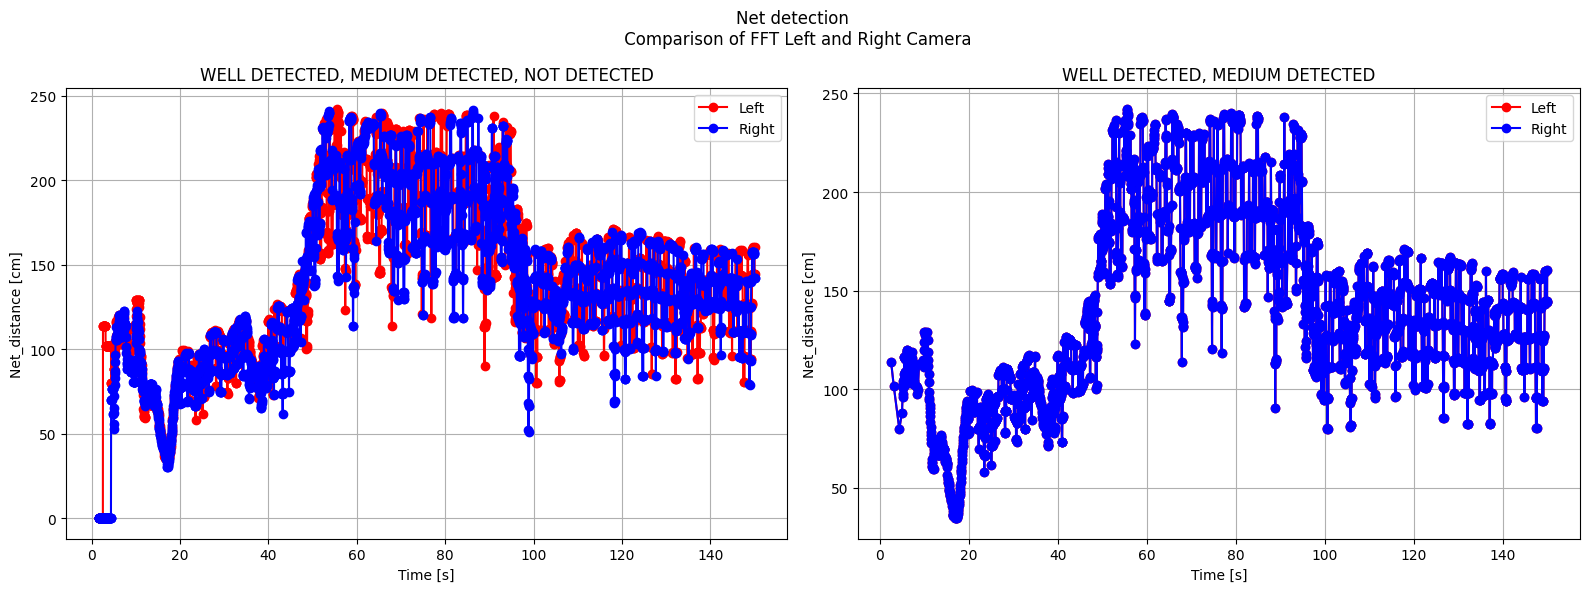

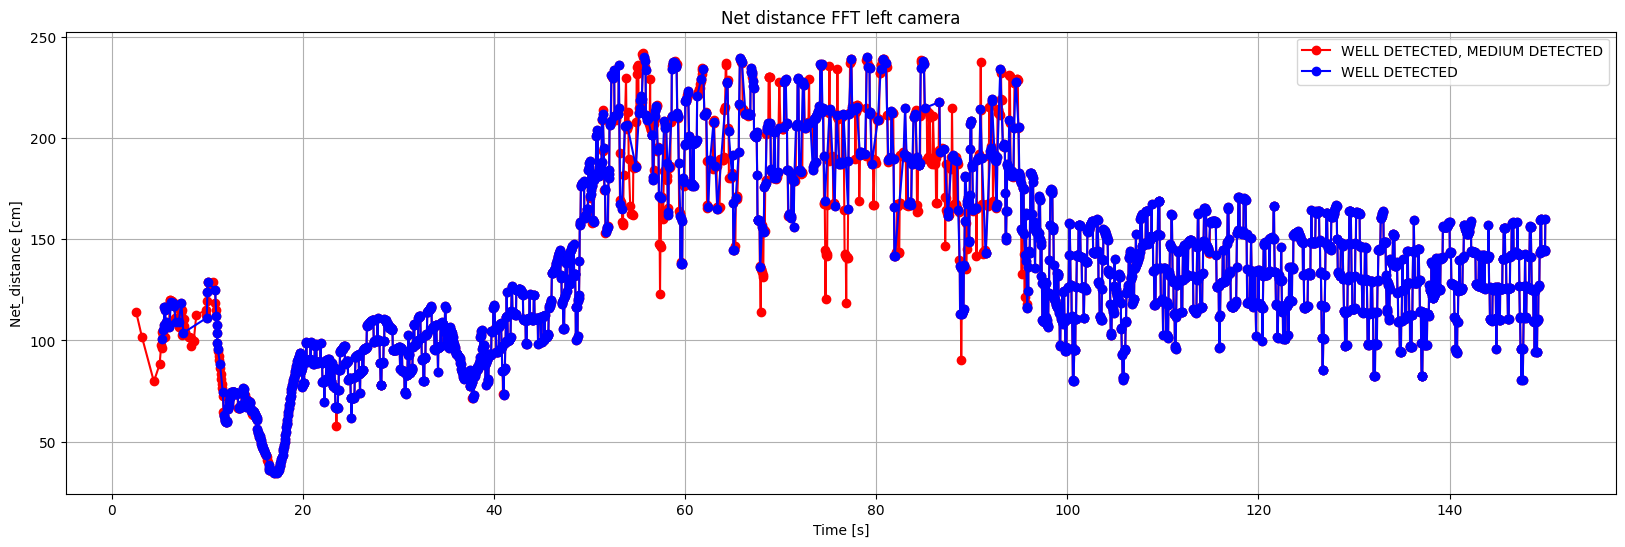

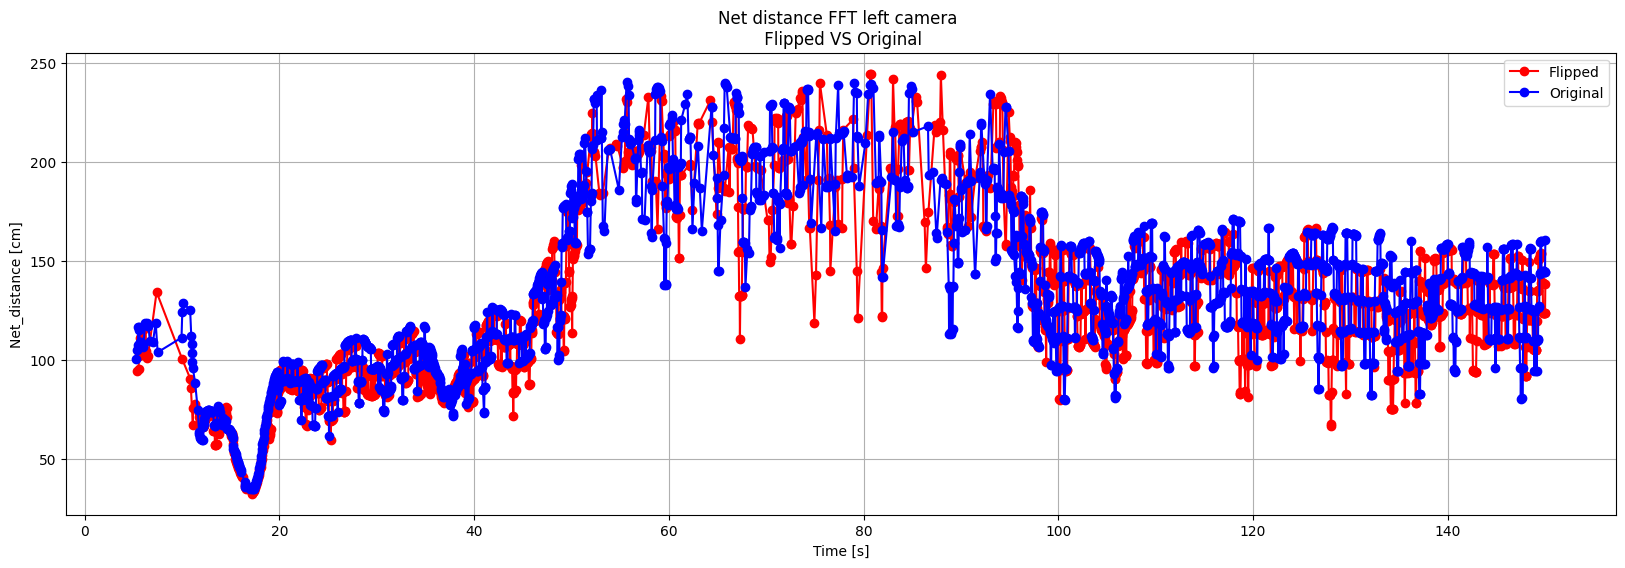

In [107]:
import matplotlib.pyplot as plt

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plot for FFT left vs right camera net distance
axes[0].plot(FFT_time, FFT_net_distance_left, color='r', marker='o', linestyle='-', label="Left")
axes[0].plot(FFT_time, FFT_net_distance_right, color='b', marker='o', linestyle='-', label="Right")
axes[0].set_title('WELL DETECTED, MEDIUM DETECTED, NOT DETECTED')
axes[0].set_xlabel('Time [s]')
axes[0].set_ylabel('Net_distance [cm]')   # Assuming this is in centimeters
axes[0].legend()
axes[0].grid(True)

# Plot for FFT left vs right camera net distance (removed)
axes[1].plot(FFT_time_left_removed, FFT_net_distance_left_removed, color='r', marker='o', linestyle='-', label="Left")
axes[1].plot(FFT_time_right_removed, FFT_net_distance_right_removed, color='b', marker='o', linestyle='-', label="Right")
axes[1].set_title('WELL DETECTED, MEDIUM DETECTED')
axes[1].set_xlabel('Time [s]')
axes[1].set_ylabel('Net_distance [cm]')   # Assuming this is in centimeters
axes[1].legend()
axes[1].grid(True)

# Add a title to the entire figure
plt.suptitle('Net detection \n Comparison of FFT Left and Right Camera')

plt.tight_layout()
plt.show()


# Plot for FFT left camera net distance: well & medium VS well detections
plt.figure(figsize=(20, 6))
plt.plot(FFT_time_left_removed, FFT_net_distance_left_removed, color='r', marker='o', linestyle='-', label="WELL DETECTED, MEDIUM DETECTED")
plt.plot(FFT_time_left_well, FFT_net_distance_left_well, color='b', marker='o', linestyle='-', label="WELL DETECTED")
plt.title('Net distance FFT left camera')  # Corrected line
plt.xlabel('Time [s]')  # Corrected line
plt.ylabel('Net_distance [cm]')  # Corrected line
plt.legend()
plt.grid(True)
plt.show()



# Plot for FFT left camera net distance: well & medium VS well detections
plt.figure(figsize=(20, 6))
plt.plot(FFT_time_left_rotated_well, FFT_net_distance_left_rotated_well, color='r', marker='o', linestyle='-', label="Flipped")
plt.plot(FFT_time_left_well, FFT_net_distance_left_well, color='b', marker='o', linestyle='-', label="Original")
plt.title('Net distance FFT left camera \n Flipped VS Original')  # Corrected line
plt.xlabel('Time [s]')  # Corrected line
plt.ylabel('Net_distance [cm]')  # Corrected line
plt.legend()
plt.grid(True)
plt.show()

In [108]:
diff_net_distance_left_vs_right = []

zero_diff = 0
for i in range(len(FFT_net_distance_left_well)):
    difference = FFT_net_distance_left_well[i] - FFT_net_distance_right_well[i]
    diff_net_distance_left_vs_right.append(difference)
    if difference == False:
        zero_diff +=1

print(diff_net_distance_left_vs_right)
print(zero_diff)
print(len(diff_net_distance_left_vs_right))




diff_net_distance_left_vs_right = []

zero_diff = 0
for i in range(len(FFT_net_distance_left_well)):
    difference = FFT_net_distance_left_removed[i] - FFT_net_distance_right_removed[i]
    diff_net_distance_left_vs_right.append(difference)
    if difference == False:
        zero_diff +=1

print(diff_net_distance_left_vs_right)
print(zero_diff)
print(len(diff_net_distance_left_vs_right))



[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

## DVL distance 
Save net distance and time to lists

In [4]:
import math 

DVL_net_distance = []
DVL_time_epoch = []
DVL_velocity_uv = []

for topic, msg, t in bag.read_messages(topics=['/navigation/plane_approximation']):
    DVL_net_distance.append(msg.NetDistance*100)
    DVL_time_epoch.append(t)
    U = math.sqrt(msg.NetVelocity_u**2 + msg.NetVelocity_v**2 + msg.NetVelocity_w**2)
    DVL_velocity_uv.append(U)

# Find when first DVL msg was received in  coparison to when ROV got first msg.
time_diff_DVL_ROV = (DVL_time_epoch[0]- ROV_start_time).to_sec()   

print(time_diff_DVL_ROV)
DVL_time = [time_diff_DVL_ROV]

# Calculate time differences between consecutive elements
for i in range(1, len(DVL_time_epoch)):
    time_diff = DVL_time_epoch[i] - DVL_time_epoch[i - 1]
    # Accumulate time differences to get total time duration
    DVL_time.append(time_diff.to_sec() + DVL_time[i - 1])  # Convert to seconds


4.5546249


### Plot DVL net distance measurements

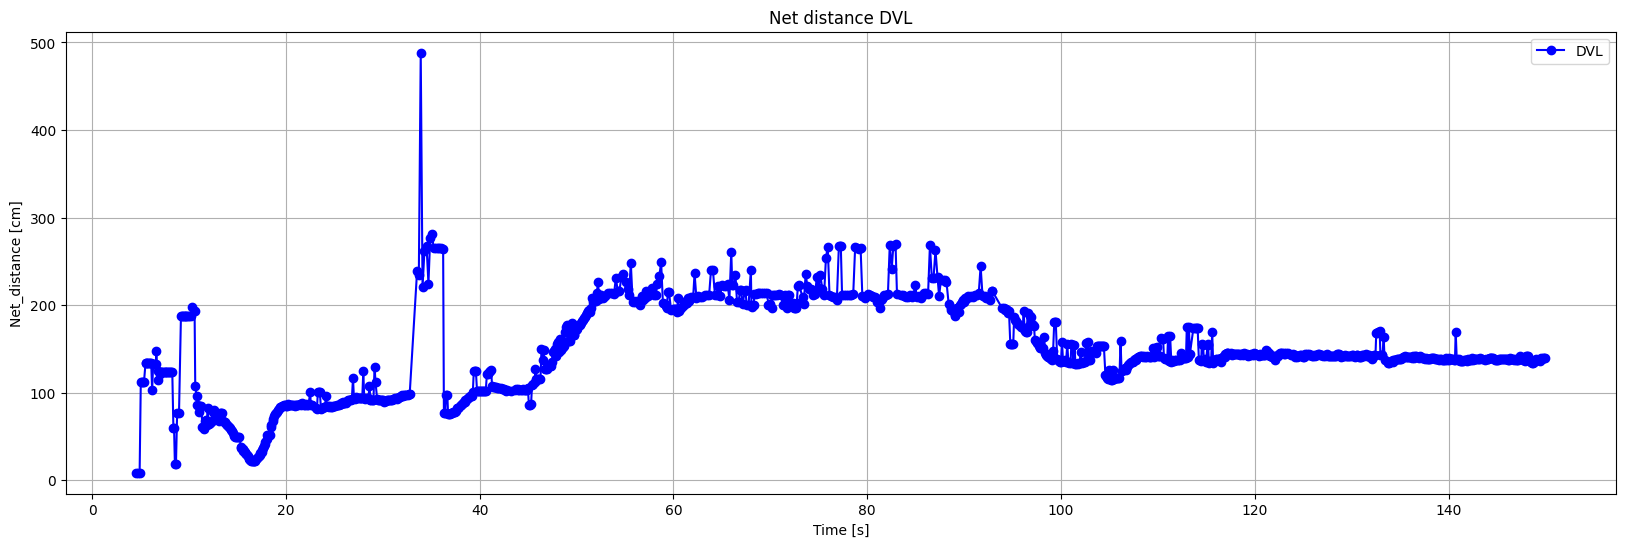

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))
plt.plot(DVL_time, DVL_net_distance, color='b', marker='o', linestyle='-', label="DVL")
plt.title('Net distance DVL')  # Corrected line
plt.xlabel('Time [s]')  # Corrected line
plt.ylabel('Net_distance [cm]')  # Corrected line
plt.legend()
plt.grid(True)
plt.show()

# Remove net distance outliers 

Possibility to shorten the DVL graph: cut start or end

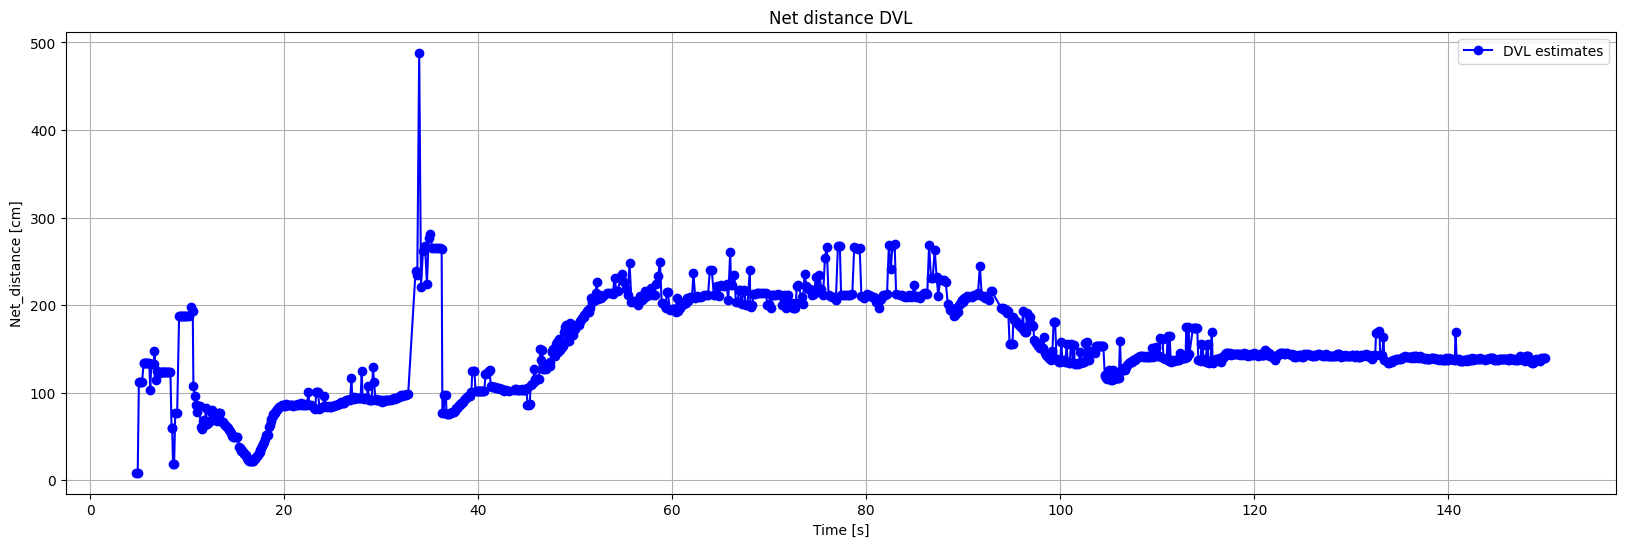

In [6]:
DVL_net_distance_cut = []
DVL_time_cut = []
DVL_velocity_uv_cut = []
for i in range(1, len(DVL_time)):
    if DVL_time[i] > 0:
        DVL_net_distance_cut.append(DVL_net_distance[i])
        DVL_time_cut.append(DVL_time[i])
        DVL_velocity_uv_cut.append(DVL_velocity_uv[i])


plt.figure(figsize=(20, 6))
plt.plot(DVL_time_cut, DVL_net_distance_cut, color='b', marker='o', linestyle='-', label="DVL estimates")
plt.title('Net distance DVL')  # Corrected line
plt.xlabel('Time [s]')  # Corrected line
plt.ylabel('Net_distance [cm]')  # Corrected line
plt.legend()
plt.grid(True)
plt.show()

# Remove outliers VELOCITY

One can observe that there areoutliers on time 32-33 s (?). This is somthing we want to remove. The other places the distances are varying is probably the sensors variable so those should be kept.

Based on the velocity by integrating the velocity of the ROV in the timespan from one point to the next and making that a treshold, I might find a treshold.



## Outlier detection with max velocity of ROV. 
Two methods
- start by taking average of the first 40 samples
- Start at sample 60
- Start approved distance is when there are 19 consecutive approved distances after. 

Neither are optimal, bus since it starts and have outliers, it is hard to start a good way. Maybe make a list, adding autil 10 samples are good enough and use that as a start point

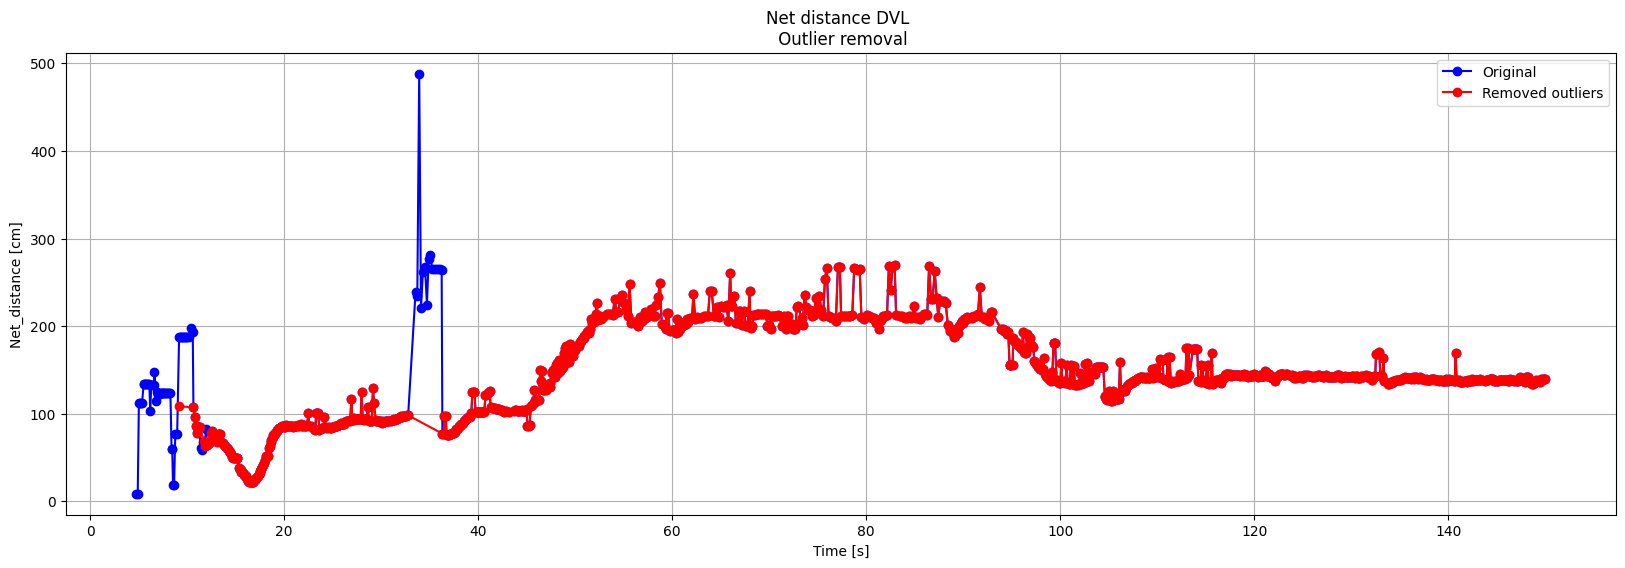

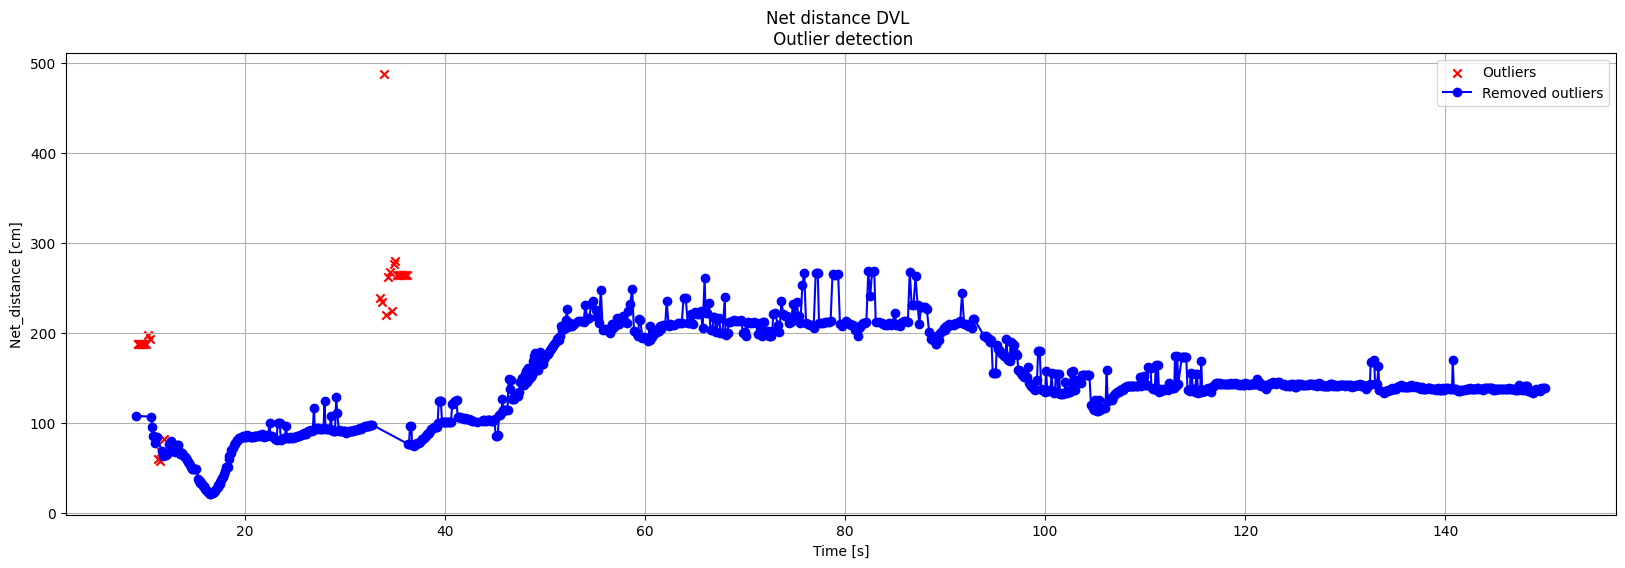

In [42]:
max_velocity = 1.5 # m/s, maximum forward speed https://www.dropbox.com/s/0j0puotbfs7dj9s/br_bluerov2_datasheet_rev2023-R4ROV.pdf?dl=0

DVL_net_distance_cut_outliers = []
DVL_time_cut_outliers = []

DVL_net_distance_outliers = []
DVL_time_outliers = []


i = 1
average_start_distance = 0
number_samples_start_average = 40
for i in range(len(DVL_net_distance_cut)):

    if i < number_samples_start_average:
        average_start_distance += DVL_net_distance_cut[i] 
    
    else: 
        if i == number_samples_start_average:
            average_start_distance = average_start_distance/number_samples_start_average
            DVL_net_distance_cut_outliers.append(average_start_distance)
            DVL_time_cut_outliers.append(DVL_time_cut[i])
        else:
            distance_points = DVL_net_distance_cut[i] - DVL_net_distance_cut_outliers[-1]

            if abs(distance_points) < abs(max_velocity * DVL_time_cut_outliers[-1]):
                DVL_net_distance_cut_outliers.append(DVL_net_distance_cut[i])
                DVL_time_cut_outliers.append(DVL_time_cut[i])
            else:
                DVL_net_distance_outliers.append(DVL_net_distance_cut[i])
                DVL_time_outliers.append(DVL_time_cut[i])


plt.figure(figsize=(20, 6))
plt.plot(DVL_time_cut, DVL_net_distance_cut, color='b', marker='o', linestyle='-', label="Original")
plt.plot(DVL_time_cut_outliers, DVL_net_distance_cut_outliers, color='r', marker='o', linestyle='-', label="Removed outliers")
plt.title('Net distance DVL \n Outlier removal')  # Corrected line
plt.xlabel('Time [s]')  # Corrected line
plt.ylabel('Net_distance [cm]')  # Corrected line
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(20, 6))
plt.scatter(DVL_time_outliers, DVL_net_distance_outliers, label='Outliers',  marker='x', color='red')
plt.plot(DVL_time_cut_outliers, DVL_net_distance_cut_outliers, color='blue', marker='o', label="Removed outliers")
plt.title('Net distance DVL \n Outlier detection')  # Corrected line
plt.xlabel('Time [s]')  # Corrected line
plt.ylabel('Net_distance [cm]')  # Corrected line
plt.legend()
plt.grid(True)
plt.show()


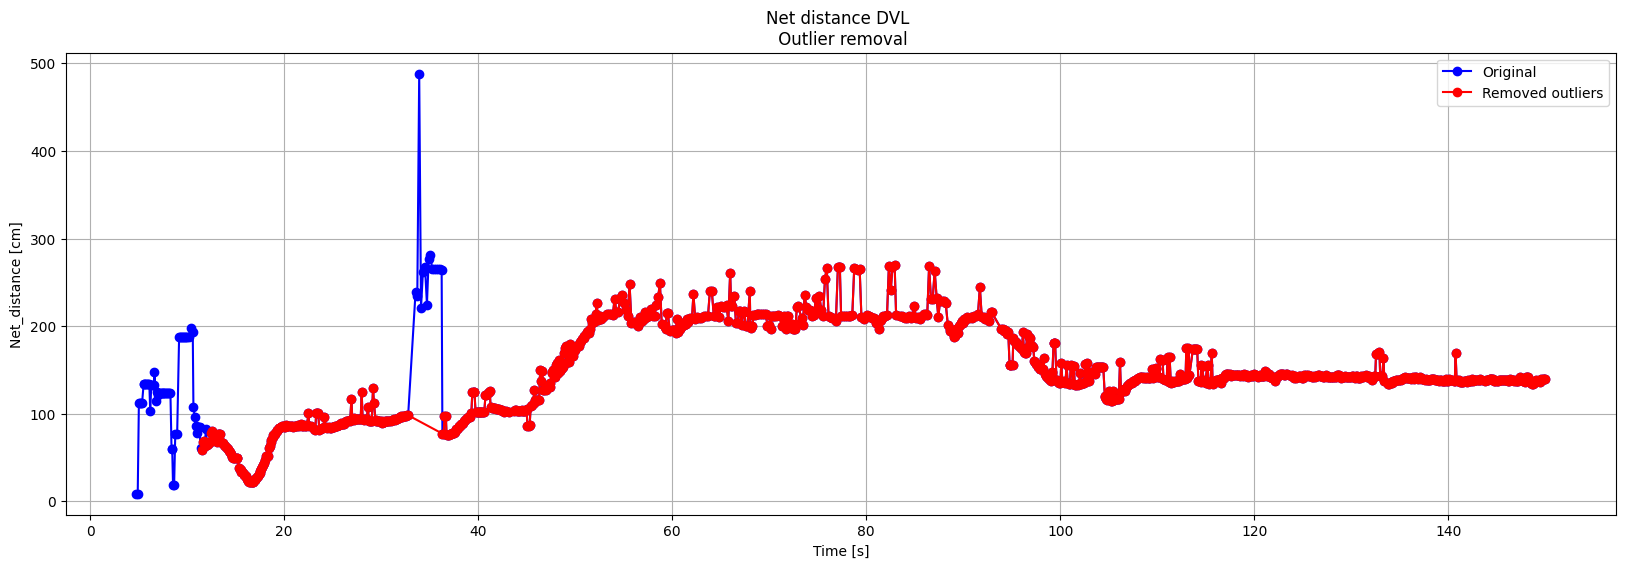

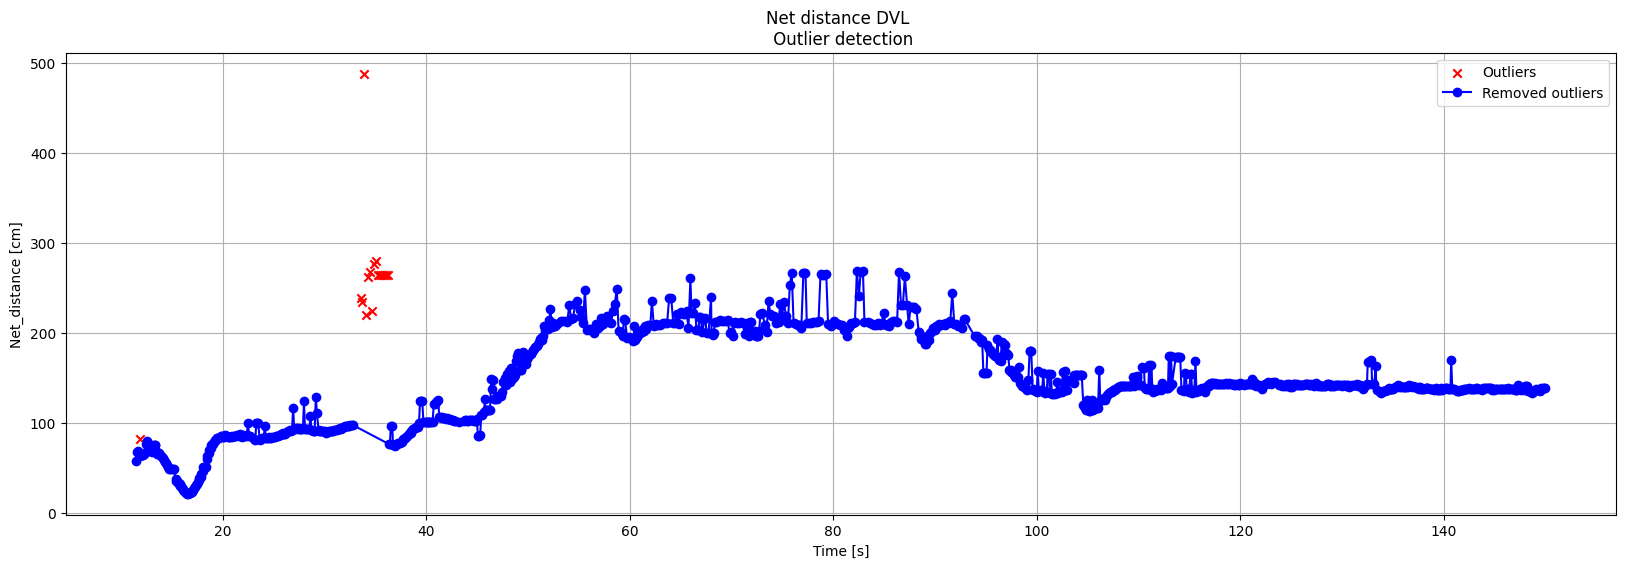

In [41]:
max_velocity = 1.5 # m/s, maximum forward speed https://www.dropbox.com/s/0j0puotbfs7dj9s/br_bluerov2_datasheet_rev2023-R4ROV.pdf?dl=0

DVL_net_distance_cut_outliers = []
DVL_time_cut_outliers = []

DVL_net_distance_outliers = []
DVL_time_outliers = []

start_idx = 60
DVL_net_distance_cut_outliers.append(DVL_net_distance_cut[start_idx])
DVL_time_cut_outliers.append(DVL_time_cut[start_idx])



for i in range(start_idx + 1,len(DVL_net_distance_cut)):
    distance_points = DVL_net_distance_cut[i] - DVL_net_distance_cut_outliers[-1]

    if abs(distance_points) < abs(max_velocity * DVL_time_cut_outliers[-1]):
        DVL_net_distance_cut_outliers.append(DVL_net_distance_cut[i])
        DVL_time_cut_outliers.append(DVL_time_cut[i])
    else:
        DVL_net_distance_outliers.append(DVL_net_distance_cut[i])
        DVL_time_outliers.append(DVL_time_cut[i])


plt.figure(figsize=(20, 6))
plt.plot(DVL_time_cut, DVL_net_distance_cut, color='b', marker='o', linestyle='-', label="Original")
plt.plot(DVL_time_cut_outliers, DVL_net_distance_cut_outliers, color='r', marker='o', linestyle='-', label="Removed outliers")
plt.title('Net distance DVL \n Outlier removal')  # Corrected line
plt.xlabel('Time [s]')  # Corrected line
plt.ylabel('Net_distance [cm]')  # Corrected line
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(20, 6))
plt.scatter(DVL_time_outliers, DVL_net_distance_outliers, label='Outliers',  marker='x', color='red')
plt.plot(DVL_time_cut_outliers, DVL_net_distance_cut_outliers, color='blue', marker='o', label="Removed outliers")
plt.title('Net distance DVL \n Outlier detection')  # Corrected line
plt.xlabel('Time [s]')  # Corrected line
plt.ylabel('Net_distance [cm]')  # Corrected line
plt.legend()
plt.grid(True)
plt.show()


In [29]:
def find_start_approved_distances(no_approved_distances, DVL_net_distance_cut, DVL_time_cut, max_velocity ):
    keep_looking = True
    dist_start_sequence = []
    time_start_sequence = []

    outliers_distance = []
    outliers_time = []

    dist_start_sequence.append(DVL_net_distance_cut[0])
    time_start_sequence.append(DVL_time_cut[0])

    i = 1
    while keep_looking:
        distance_points = DVL_net_distance_cut[i] - dist_start_sequence[-1]

        if abs(distance_points) < abs(max_velocity * time_start_sequence[-1]):
            dist_start_sequence.append(DVL_net_distance_cut[i])
            time_start_sequence.append(DVL_time_cut[i])

            if len(dist_start_sequence) == no_approved_distances:
                keep_looking = False
        else:
            for j in range(len(dist_start_sequence)):
                outliers_distance.append(dist_start_sequence[j])
                outliers_time.append(time_start_sequence[j])

            dist_start_sequence = []
            time_start_sequence = []

            dist_start_sequence.append(DVL_net_distance_cut[i])
            time_start_sequence.append(DVL_time_cut[i])
        i += 1

    return dist_start_sequence, time_start_sequence, outliers_distance, outliers_time


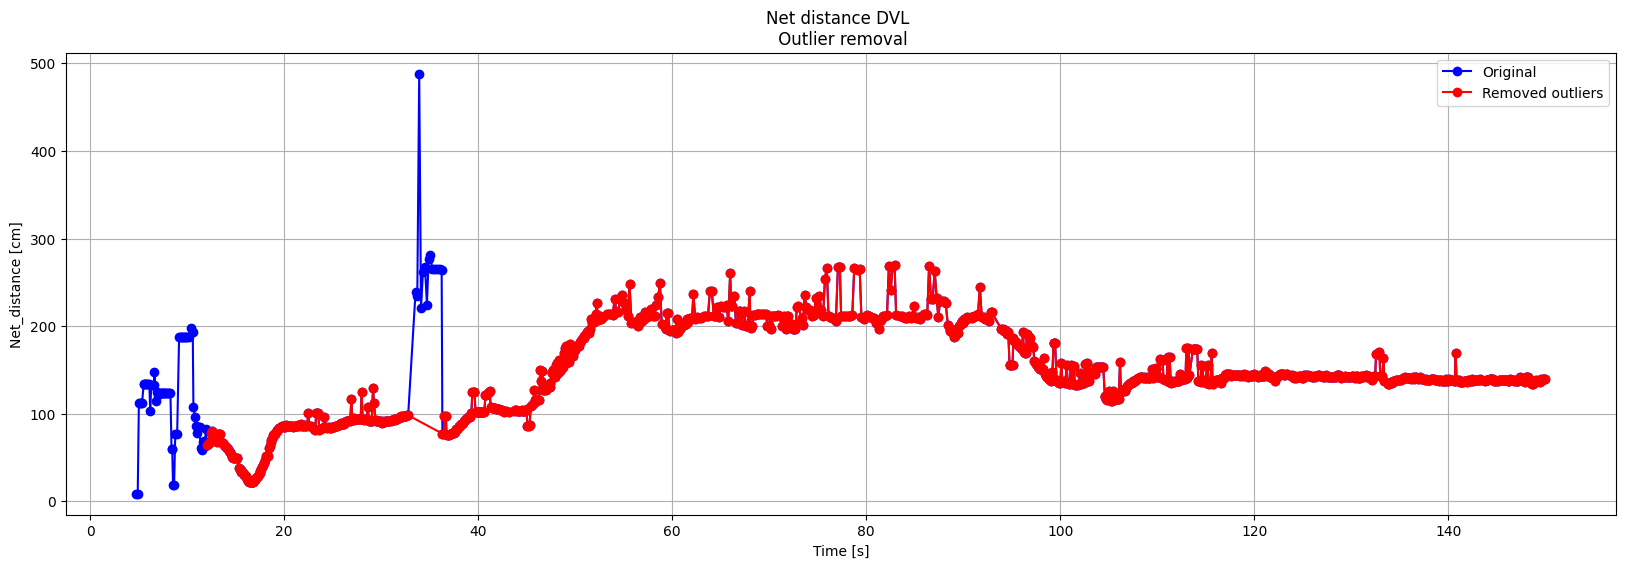

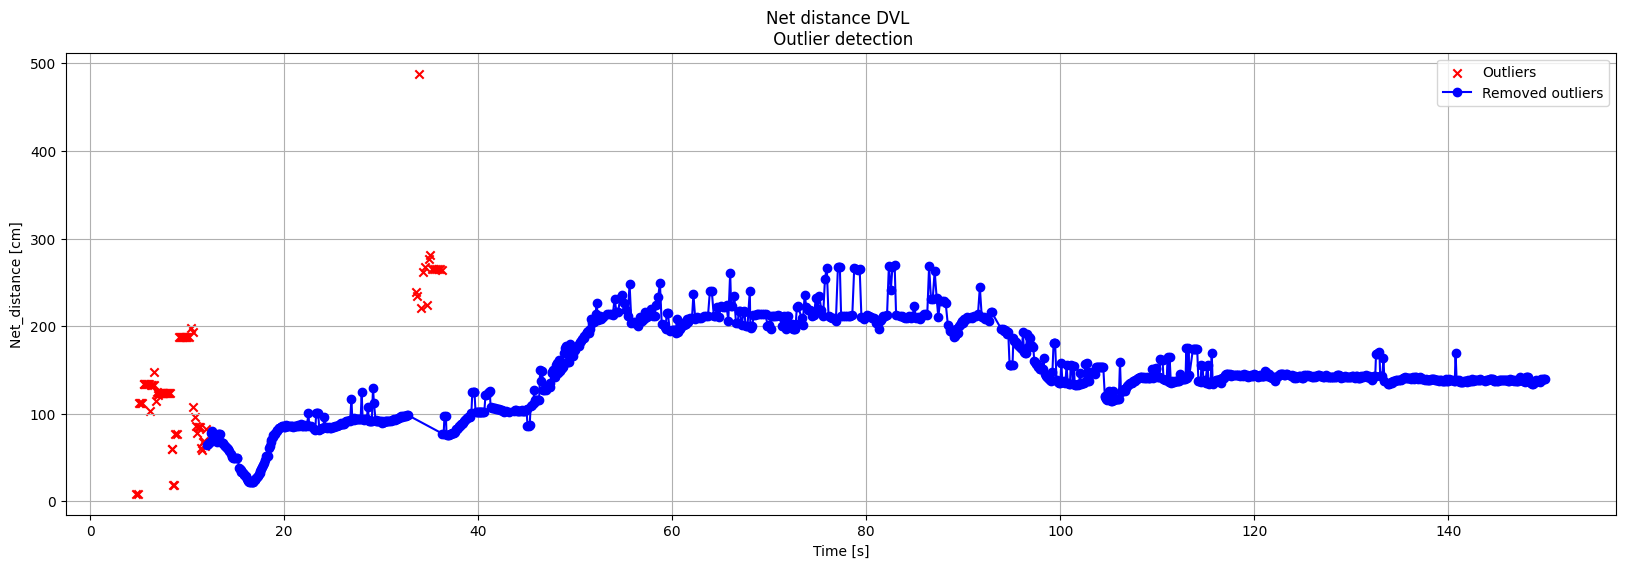

In [33]:
max_velocity = 1.5 # m/s, maximum forward speed https://www.dropbox.com/s/0j0puotbfs7dj9s/br_bluerov2_datasheet_rev2023-R4ROV.pdf?dl=0
DVL_net_distance_cut_outliers, DVL_time_cut_outliers, DVL_net_distance_outliers, DVL_time_outliers = find_start_approved_distances(20,  DVL_net_distance_cut, DVL_time_cut, max_velocity)

for i in range(len(DVL_net_distance_cut_outliers) + len(DVL_net_distance_outliers) + 1,len(DVL_net_distance_cut)):
    distance_points = DVL_net_distance_cut[i] - DVL_net_distance_cut_outliers[-1]

    if abs(distance_points) < abs(max_velocity * DVL_time_cut_outliers[-1]):
        DVL_net_distance_cut_outliers.append(DVL_net_distance_cut[i])
        DVL_time_cut_outliers.append(DVL_time_cut[i])
    else:
        DVL_net_distance_outliers.append(DVL_net_distance_cut[i])
        DVL_time_outliers.append(DVL_time_cut[i])


plt.figure(figsize=(20, 6))
plt.plot(DVL_time_cut, DVL_net_distance_cut, color='b', marker='o', linestyle='-', label="Original")
plt.plot(DVL_time_cut_outliers, DVL_net_distance_cut_outliers, color='r', marker='o', linestyle='-', label="Removed outliers")
plt.title('Net distance DVL \n Outlier removal')  # Corrected line
plt.xlabel('Time [s]')  # Corrected line
plt.ylabel('Net_distance [cm]')  # Corrected line
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(20, 6))
plt.scatter(DVL_time_outliers, DVL_net_distance_outliers, label='Outliers',  marker='x', color='red')
plt.plot(DVL_time_cut_outliers, DVL_net_distance_cut_outliers, color='blue', marker='o', label="Removed outliers")
plt.title('Net distance DVL \n Outlier detection')  # Corrected line
plt.xlabel('Time [s]')  # Corrected line
plt.ylabel('Net_distance [cm]')  # Corrected line
plt.legend()
plt.grid(True)
plt.show()





## Outlier detection, compare to the 10 last.

Bad method: either one have to have not so many values to take the average from, but then the outliers at 35 sec approx are getting approved, or for too fast movement, see 17-20 sec: is taken as outliers becauseit is higher then the rest.

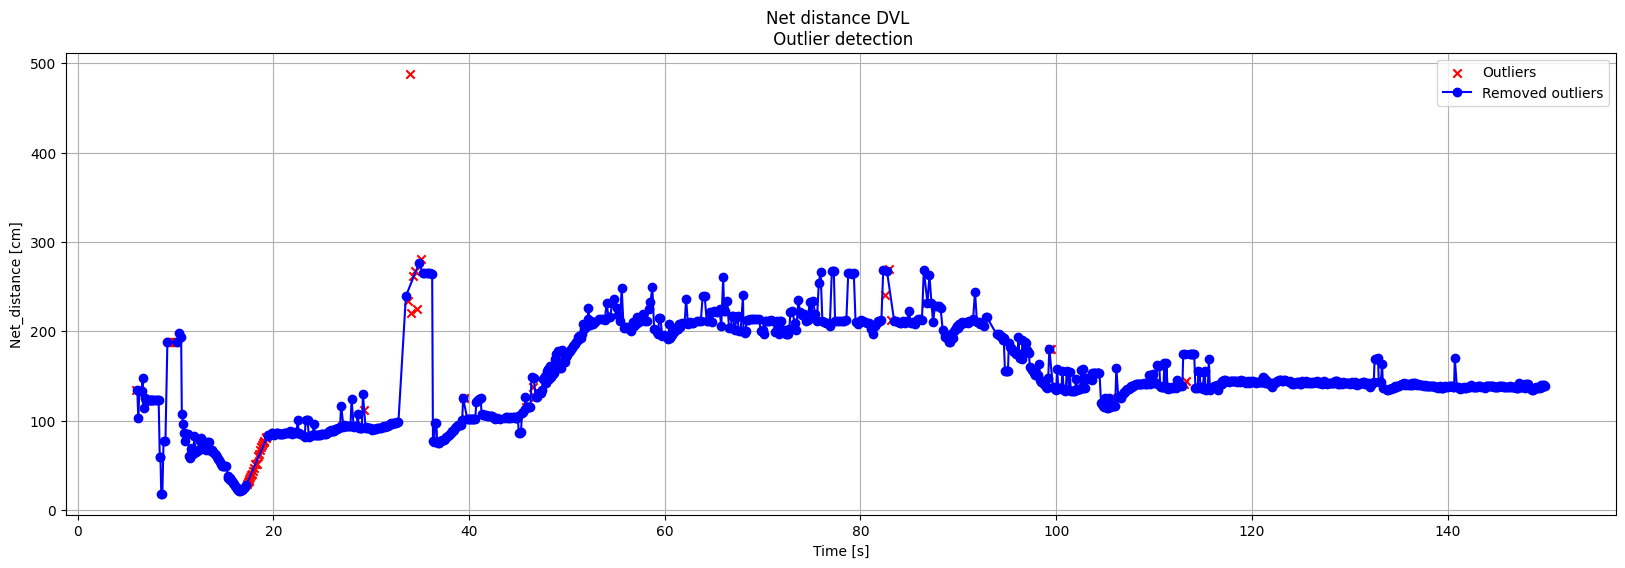

In [47]:
DVL_distance_average_oultier_detection = []
DVL_time_average_oultier_detection = []

DVL_distance_average_oultiers = []
DVL_time_average_oultiers = []



for i in range(11, len(DVL_net_distance_cut)):
    average_last_10 = sum(DVL_net_distance_cut[i - 11:i - 1]) / 10
    if abs(DVL_net_distance[i]) > abs(1.2 * average_last_10):
        DVL_distance_average_oultiers.append(DVL_net_distance_cut[i])
        DVL_time_average_oultiers.append(DVL_time_cut[i])
    else:
        DVL_distance_average_oultier_detection.append(DVL_net_distance_cut[i])
        DVL_time_average_oultier_detection.append(DVL_time_cut[i])



plt.figure(figsize=(20, 6))
plt.scatter(DVL_time_average_oultiers, DVL_distance_average_oultiers, label='Outliers',  marker='x', color='red')
plt.plot(DVL_time_average_oultier_detection, DVL_distance_average_oultier_detection, color='blue', marker='o', label="Removed outliers")
plt.title('Net distance DVL \n Outlier detection')  # Corrected line
plt.xlabel('Time [s]')  # Corrected line
plt.ylabel('Net_distance [cm]')  # Corrected line
plt.legend()
plt.grid(True)
plt.show()




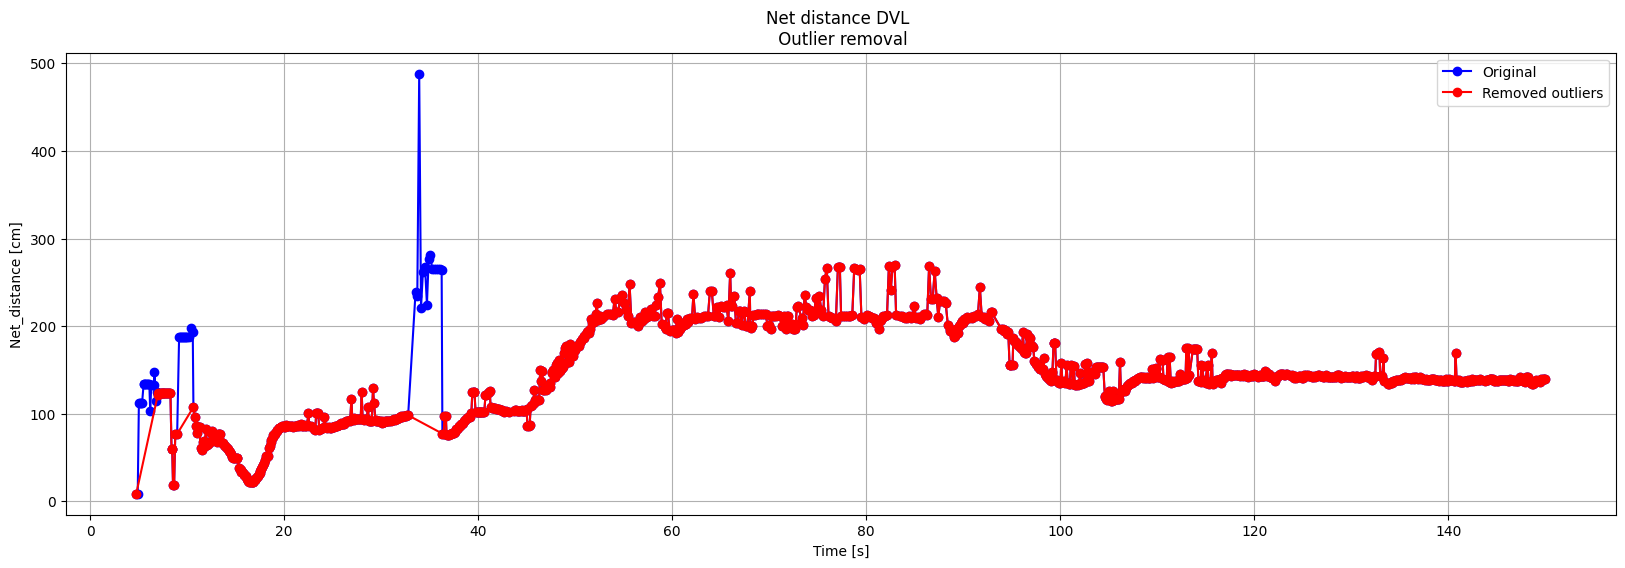

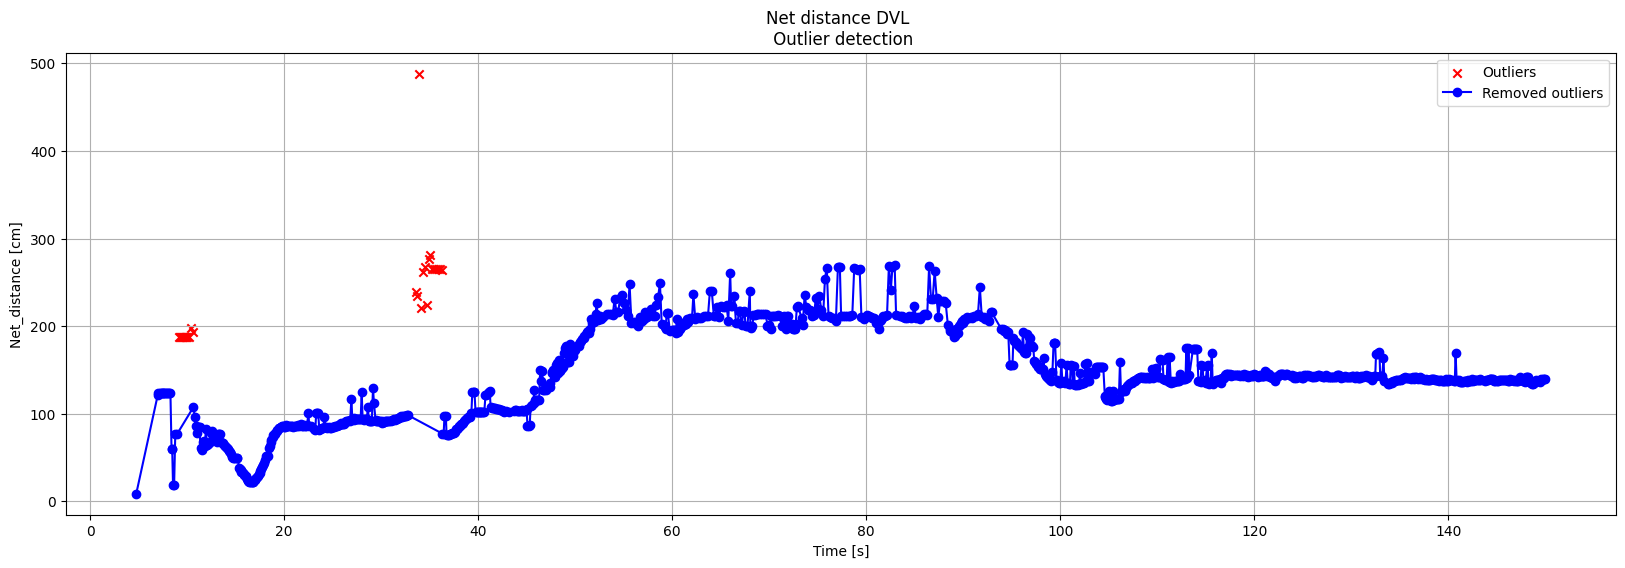

In [116]:
# Just removing the ones that are more then 1 meter away from last approved distance
DVL_net_distance_cut_outliers = []
DVL_time_cut_outliers = []

DVL_net_distance_outliers = []
DVL_time_outliers = []

DVL_net_distance_cut_outliers.append(DVL_net_distance_cut[0])
DVL_time_cut_outliers.append(DVL_time_cut[0])

i = 1
average_start_100_samples = 0
for i in range(len(DVL_net_distance_cut)):

    if i < 20:
        average_start_100_samples += DVL_net_distance_cut[i] 
    
    else: 
        if i == 20:
            average_start_100_samples = average_start_100_samples/100
            distance_points = DVL_net_distance_cut[i] - average_start_100_samples
        else:
            distance_points = DVL_net_distance_cut[i] - DVL_net_distance_cut_outliers[-1]

        if abs(distance_points) < 100:
            DVL_net_distance_cut_outliers.append(DVL_net_distance_cut[i])
            DVL_time_cut_outliers.append(DVL_time_cut[i])
        else:
            DVL_net_distance_outliers.append(DVL_net_distance_cut[i])
            DVL_time_outliers.append(DVL_time_cut[i])


plt.figure(figsize=(20, 6))
plt.plot(DVL_time_cut, DVL_net_distance_cut, color='b', marker='o', linestyle='-', label="Original")
plt.plot(DVL_time_cut_outliers, DVL_net_distance_cut_outliers, color='r', marker='o', linestyle='-', label="Removed outliers")
plt.title('Net distance DVL \n Outlier removal')  # Corrected line
plt.xlabel('Time [s]')  # Corrected line
plt.ylabel('Net_distance [cm]')  # Corrected line
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(20, 6))
plt.scatter(DVL_time_outliers, DVL_net_distance_outliers, label='Outliers',  marker='x', color='red')
plt.plot(DVL_time_cut_outliers, DVL_net_distance_cut_outliers, color='blue', marker='o', label="Removed outliers")
plt.title('Net distance DVL \n Outlier detection')  # Corrected line
plt.xlabel('Time [s]')  # Corrected line
plt.ylabel('Net_distance [cm]')  # Corrected line
plt.legend()
plt.grid(True)
plt.show()

# max velocity of vehicle * time difference: max vel.

Threshold 100 cm from one measurement to another

# Smoothing: Savitzky-Golay filter

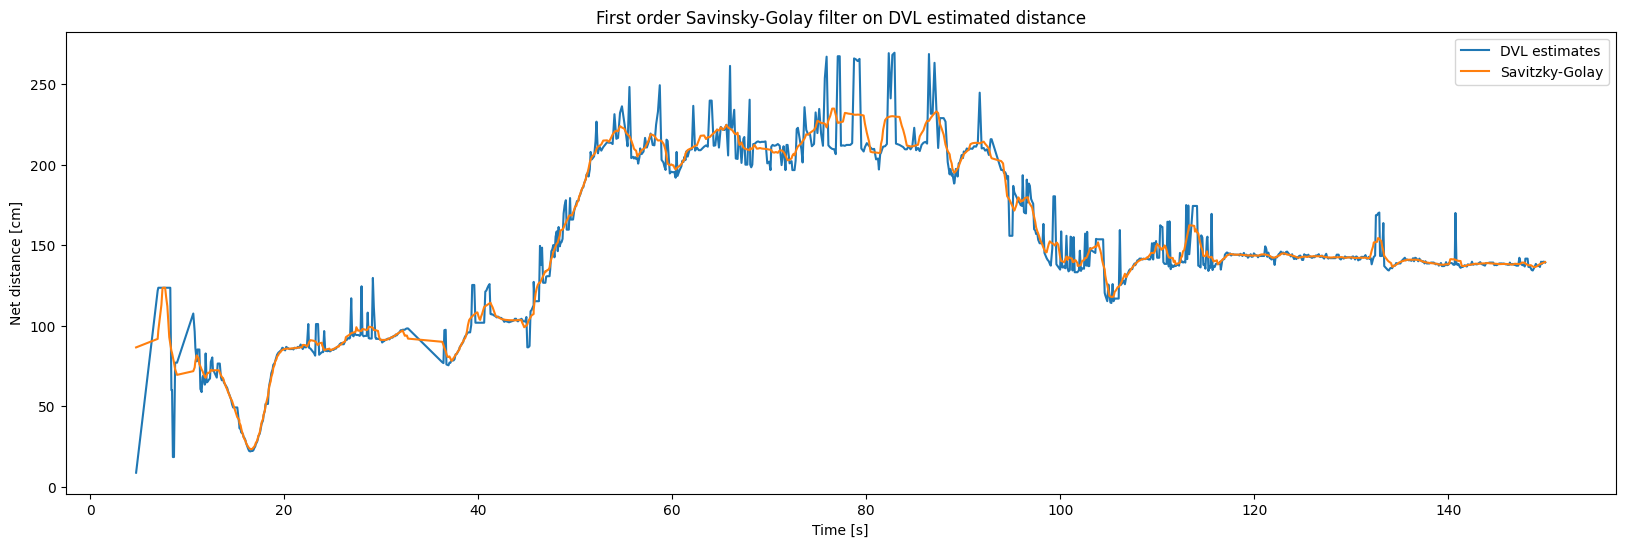

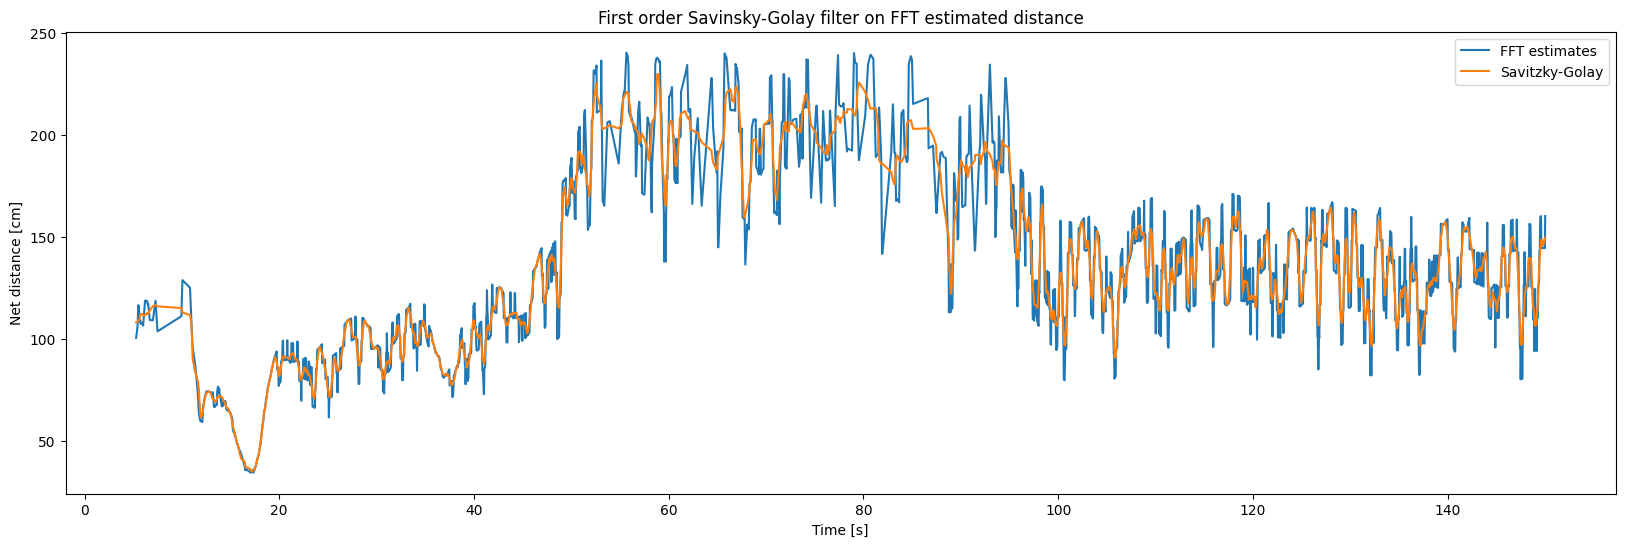

In [117]:
from scipy.signal import savgol_filter
import numpy as np

# Apply Savitzky-Golay filter
DVL_net_distance_savinsky = savgol_filter(DVL_net_distance_cut_outliers, window_length=11, polyorder=1)

# Apply Savitzky-Golay filter
FFT_net_distance_savinsky = savgol_filter(FFT_net_distance_left_well, window_length=11, polyorder=1)

# Plot original and smoothed data
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 6))
plt.plot(DVL_time_cut_outliers, DVL_net_distance_cut_outliers, label='DVL estimates')
plt.plot(DVL_time_cut_outliers, DVL_net_distance_savinsky, label='Savitzky-Golay')
plt.title('First order Savinsky-Golay filter on DVL estimated distance')
plt.xlabel('Time [s]')  # Corrected line
plt.ylabel('Net distance [cm]')  # Corrected line
plt.legend()
plt.show()

# Plot original and smoothed data
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 6))
plt.plot(FFT_time_left_well, FFT_net_distance_left_well, label='FFT estimates')
plt.plot(FFT_time_left_well, FFT_net_distance_savinsky, label='Savitzky-Golay')
plt.title('First order Savinsky-Golay filter on FFT estimated distance')
plt.xlabel('Time [s]')  # Corrected line
plt.ylabel('Net distance [cm]')  # Corrected line
plt.legend()
plt.show()

# Smooting: average
For every second, I only want the mean of the estimations as a point.

count_list:  [1, 8, 8, 2, 8, 6, 8, 9, 9, 11, 10, 9, 9, 9, 7, 6, 8, 8, 9, 8, 9, 8, 8, 9, 8, 7, 3, 8, 9, 8, 9, 8, 7, 3, 9, 8, 8, 9, 8, 8, 9, 7, 5, 3, 4, 5, 7, 5, 4, 6, 7, 6, 5, 3, 4, 5, 6, 5, 6, 4, 6, 6, 7, 3, 5, 4, 4, 6, 4, 4, 4, 7, 4, 3, 5, 4, 4, 5, 5, 9, 5, 4, 5, 8, 8, 8, 9, 8, 9, 8, 8, 9, 5, 9, 8, 9, 8, 8, 9, 8, 8, 9, 5, 9, 8, 9, 8, 9, 8, 8, 9, 8, 6, 8, 8, 9, 8, 8, 8, 9, 8, 9, 5, 9, 8, 8, 9, 8, 8, 9, 8, 9, 5, 9, 8, 8, 9, 8, 9]
Mean of count_list:  7.057553956834532
Min count_list:  1
Max count_list:  11
count_list:  [11, 5, 2, 3, 10, 23, 17, 12, 21, 6, 19, 23, 24, 24, 24, 23, 22, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 23, 20, 20, 23, 24, 19, 25, 24, 24, 24, 24, 24, 24, 24, 23, 22, 17, 12, 6, 9, 10, 6, 11, 16, 18, 7, 6, 1, 4, 9, 11, 19, 12, 8, 13, 16, 9, 13, 8, 3, 7, 8, 3, 5, 3, 9, 9, 9, 1, 3, 9, 21, 10, 5, 8, 14, 10, 20, 22, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 21, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 

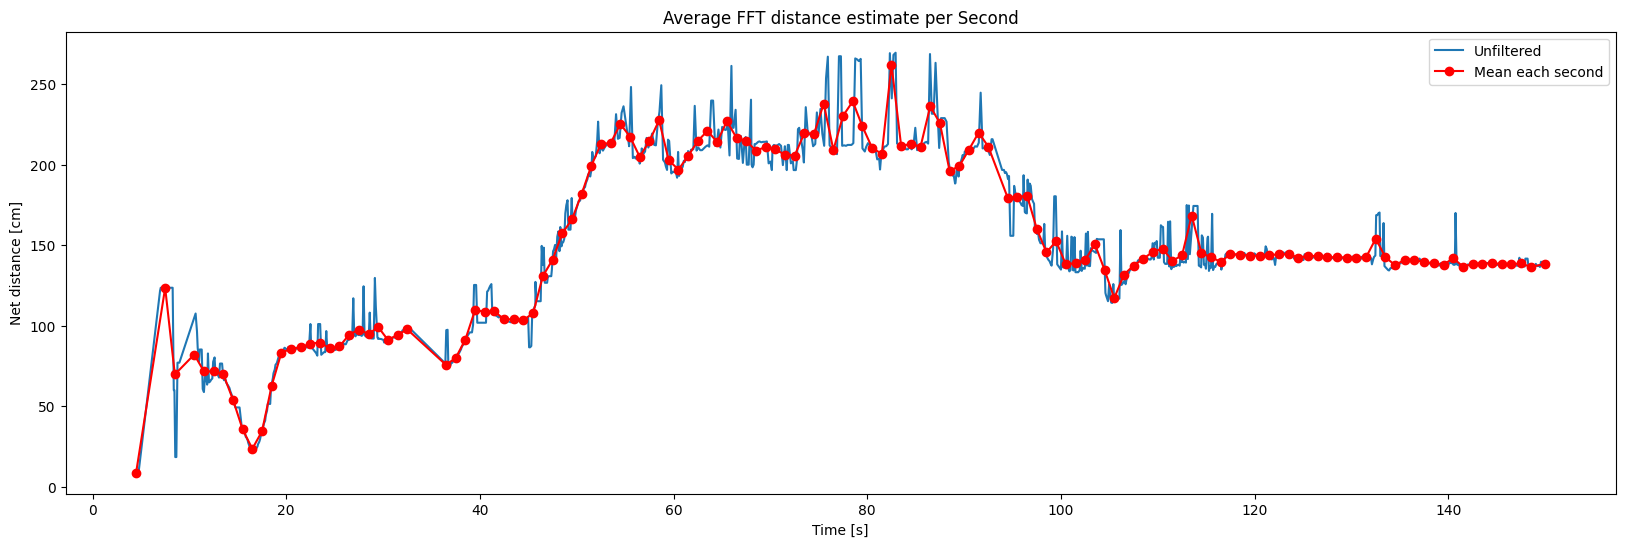

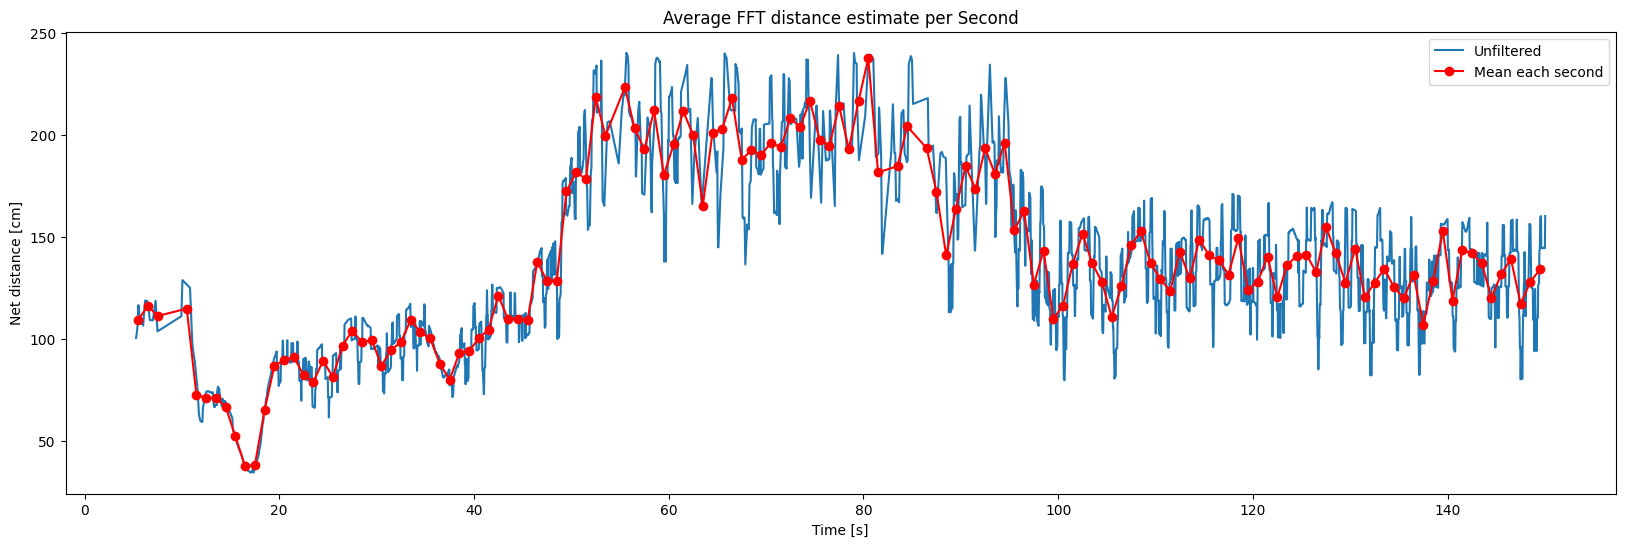

In [184]:
def smoothing_average_sec(original_time, original_distance): 
    # Initialize lists to store averaged time and distance
    time_average_sec = []
    net_distance_average_sec = []

    start_time = int(original_time[0]) + 1
    distance_sum = 0
    count = 0
    count_list = []

    # Iterate over time values
    for i in range(len(original_time)):
        if original_time[i] < start_time:
            # Add distance value to the sum
            distance_sum += original_distance[i]
            count += 1
        else:
            # Calculate average for the current second
            if count > 0:
                average_distance = distance_sum / count
                net_distance_average_sec.append(average_distance)
                time_average_sec.append(start_time - 0.5)
                count_list.append(count)

            # Reset variables for the next second
            start_time += 1
            distance_sum = 0
            count = 0
            

    # Add the last average if there are remaining values
    if count > 0:
        average_distance = distance_sum / count
        net_distance_average_sec.append(average_distance)
        time_average_sec.append(start_time)
        count_list.append(count)



    print("count_list: ", count_list)
    print("Mean of count_list: ", sum(count_list) / len(count_list))
    print("Min count_list: ", min(count_list))
    print("Max count_list: ",max(count_list))

    return time_average_sec, net_distance_average_sec 


DVL_time_average_sec, DVL_net_distance_average_sec = smoothing_average_sec(DVL_time_cut_outliers, DVL_net_distance_cut_outliers)

FFT_time_average_sec, FFT_net_distance_average_sec = smoothing_average_sec(FFT_time_left_well, FFT_net_distance_left_well)

# Plot original and smoothed data
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 6))
plt.plot(DVL_time_cut_outliers, DVL_net_distance_cut_outliers, label='Unfiltered')
plt.plot(DVL_time_average_sec, DVL_net_distance_average_sec, color='r', marker='o', linestyle='-', label='Mean each second')
plt.title('Average FFT distance estimate per Second')
plt.xlabel('Time [s]')  # Corrected line
plt.ylabel('Net distance [cm]')  # Corrected line
plt.legend()
plt.show()


# Plot original and smoothed data
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 6))
plt.plot(FFT_time_left_well, FFT_net_distance_left_well, label='Unfiltered')
plt.plot(FFT_time_average_sec, FFT_net_distance_average_sec , color='r', marker='o', linestyle='-', label='Mean each second')
plt.title('Average FFT distance estimate per Second')
plt.xlabel('Time [s]')  # Corrected line
plt.ylabel('Net distance [cm]')  # Corrected line
plt.legend()
plt.show()


For every #samples I take the average

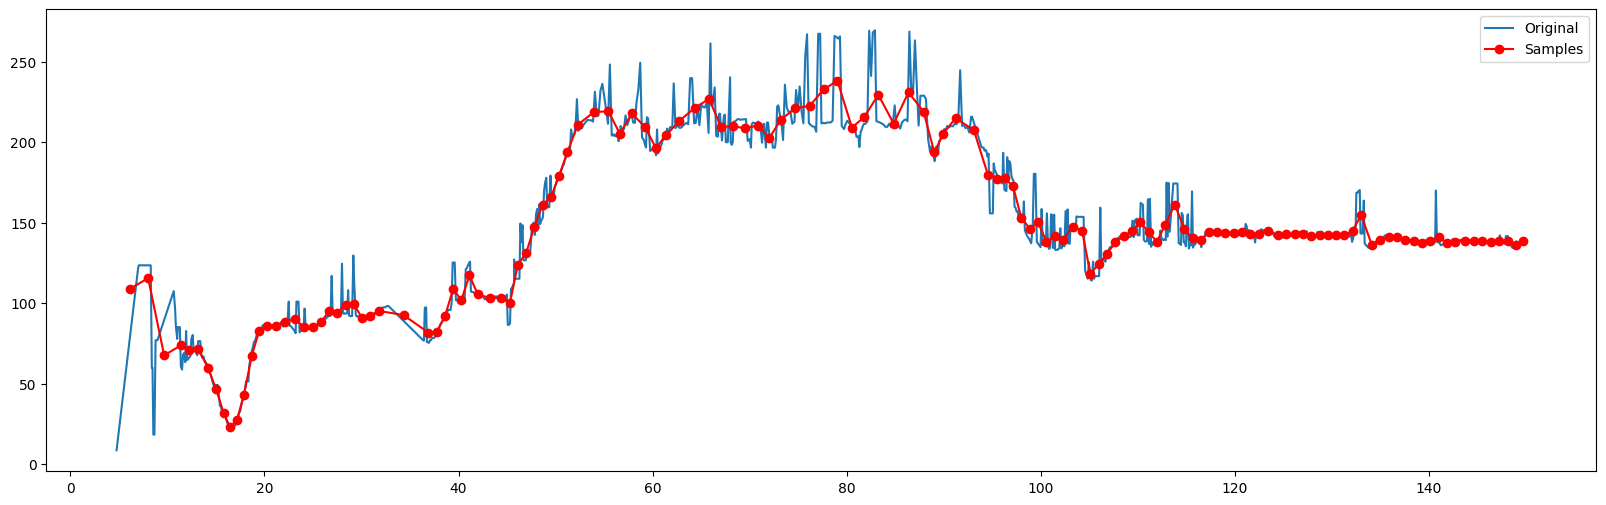

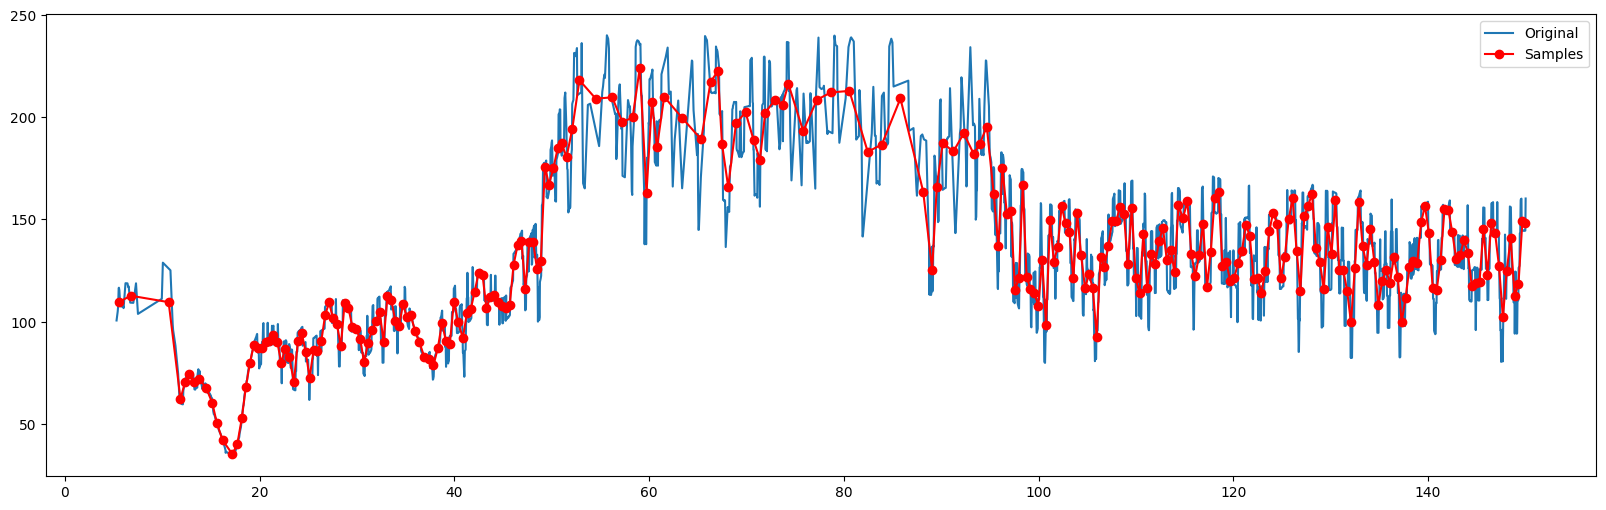

In [185]:
# Initialize lists to store averaged time and distance

def smoothing_average_samples(original_time, original_distance, samples): 
    start_index = 0
    end_index = samples

    time_average_samples = []
    net_distance_average_samples = []


    # Iterate over the samples
    while end_index <= len(original_distance):
        # Calculate the mean of the current 5 samples
        mean_distance = sum(original_distance[start_index:end_index]) / samples
        
        # Add the mean distance and corresponding time to the lists
        net_distance_average_samples.append(mean_distance)
        time_average_samples.append((original_time[start_index] + original_time[end_index - 1]) / 2)
        
        # Move to the next set of samples
        start_index += samples
        end_index += samples

    # If there are remaining samples (less than samples), calculate the mean for them
    if start_index < len(original_distance):
        remaining_samples = original_distance[start_index:]
        mean_distance = sum(remaining_samples) / len(remaining_samples)
        net_distance_average_samples.append(mean_distance)
        time_average_samples.append((original_time[start_index] + original_time[-1]) / 2)

    return time_average_samples, net_distance_average_samples



DVL_time_average_samples, DVL_net_distance_average_samples = smoothing_average_samples(DVL_time_cut_outliers, DVL_net_distance_cut_outliers, 8)

FFT_time_average_samples, FFT_net_distance_average_samples = smoothing_average_samples(FFT_time_left_well, FFT_net_distance_left_well, 10)

# Plot original and smoothed data
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 6))
plt.plot(DVL_time_cut_outliers, DVL_net_distance_cut_outliers, label='Original')
plt.plot(DVL_time_average_samples, DVL_net_distance_average_samples, color='r', marker='o', linestyle='-', label='Samples')
plt.legend()
plt.show()


# Plot original and smoothed data
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 6))
plt.plot(FFT_time_left_well, FFT_net_distance_left_well, label='Original')
plt.plot(FFT_time_average_samples, FFT_net_distance_average_samples, color='r', marker='o', linestyle='-', label='Samples')
plt.legend()
plt.show()

# Median

145.24356400000002


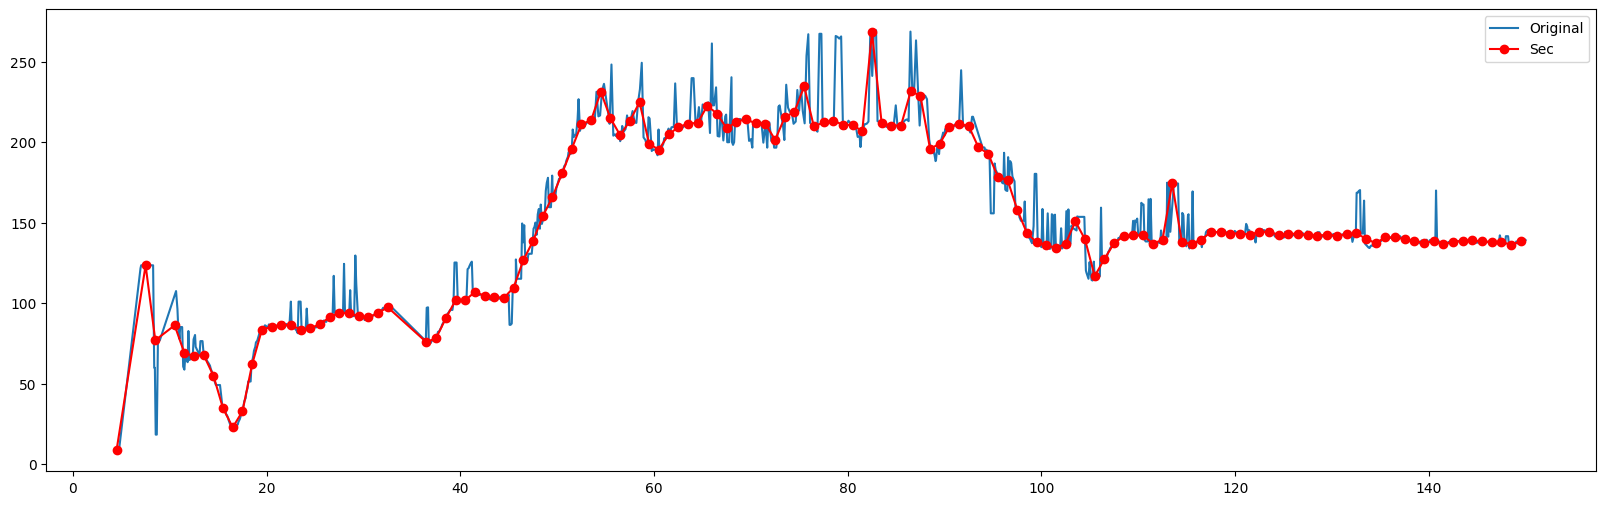

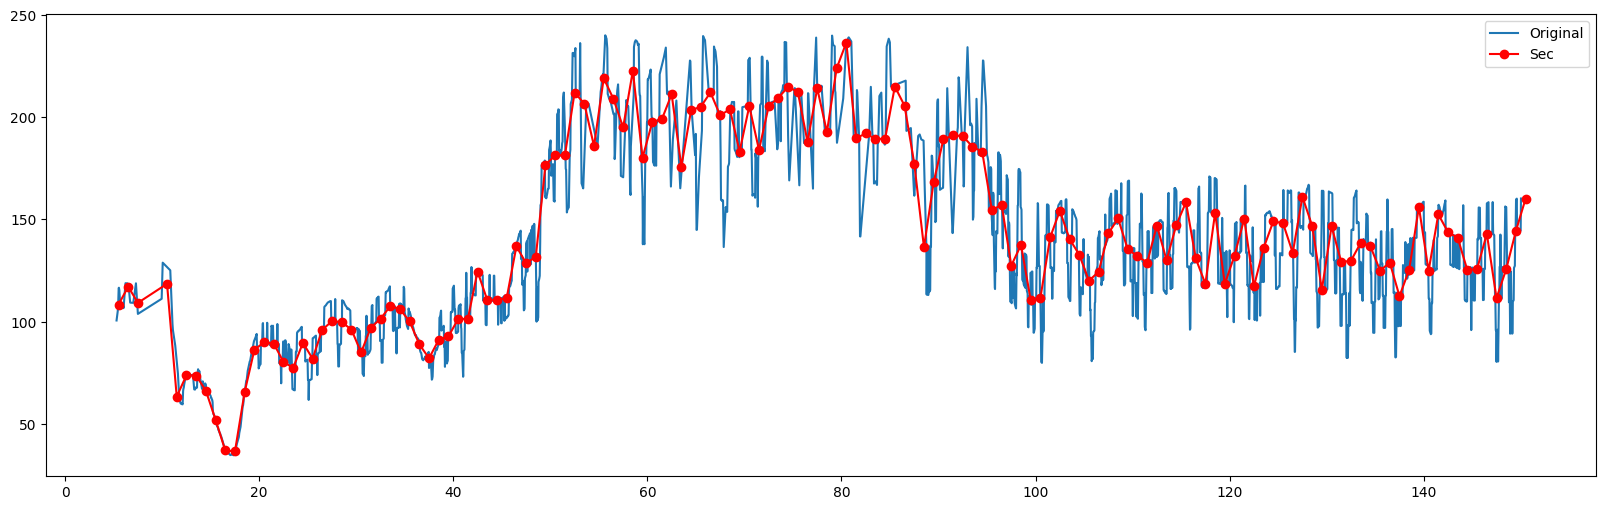

In [262]:
import numpy as np

def smoothing_median_sec(original_time, original_distance): 
    # Initialize lists to store averaged time and distance
    time_median_sec = []
    net_distance_median_sec = []

    start_time = int(original_time[0]) + 1
    distances = []

    # Iterate over time values
    for i in range(len(original_time)):
        if original_time[i] < start_time:
            # Add distance value to the list
            distances.append(original_distance[i])
        else:
            # Calculate median for the current second
            if distances:
                median_distance = np.median(distances)
                net_distance_median_sec.append(median_distance)
                time_median_sec.append(start_time - 0.5)

            # Reset variables for the next second
            start_time += 1
            distances = []
            if original_time[i] < start_time:
                distances.append(original_distance[i])

    # Add the last median if there are remaining values
    if distances:
        median_distance = np.median(distances)
        net_distance_median_sec.append(median_distance)
        time_median_sec.append(start_time - 0.5)

    return time_median_sec, net_distance_median_sec


DVL_time_median_sec, DVL_net_distance_median_sec = smoothing_median_sec(DVL_time_cut_outliers, DVL_net_distance_cut_outliers)

FFT_time_median_sec, FFT_net_distance_median_sec = smoothing_median_sec(FFT_time_left_well, FFT_net_distance_left_well)


# Plot original and smoothed data
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 6))
plt.plot(DVL_time_cut_outliers, DVL_net_distance_cut_outliers, label='Original')
plt.plot(DVL_time_median_sec, DVL_net_distance_median_sec, color='r', marker='o', linestyle='-', label='Sec')
plt.legend()
plt.show()


# Plot original and smoothed data
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 6))
plt.plot(FFT_time_left_well, FFT_net_distance_left_well, label='Original')
plt.plot(FFT_time_median_sec, FFT_net_distance_median_sec, color='r', marker='o', linestyle='-', label='Sec')
plt.legend()
plt.show()

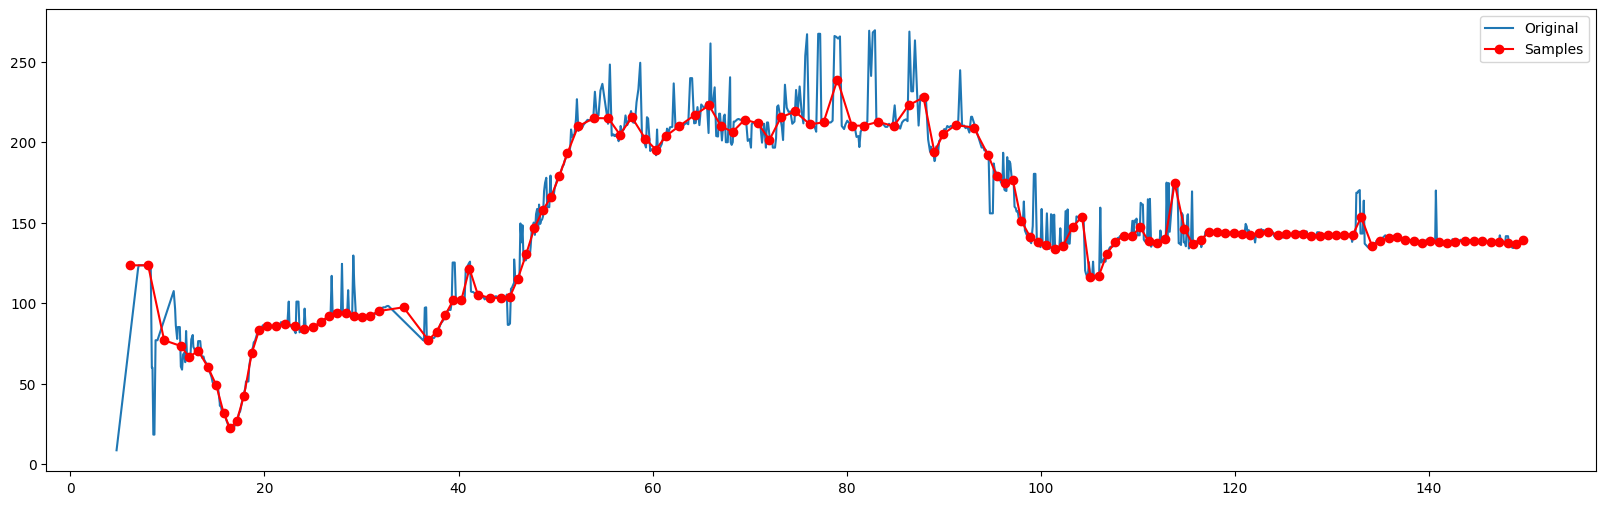

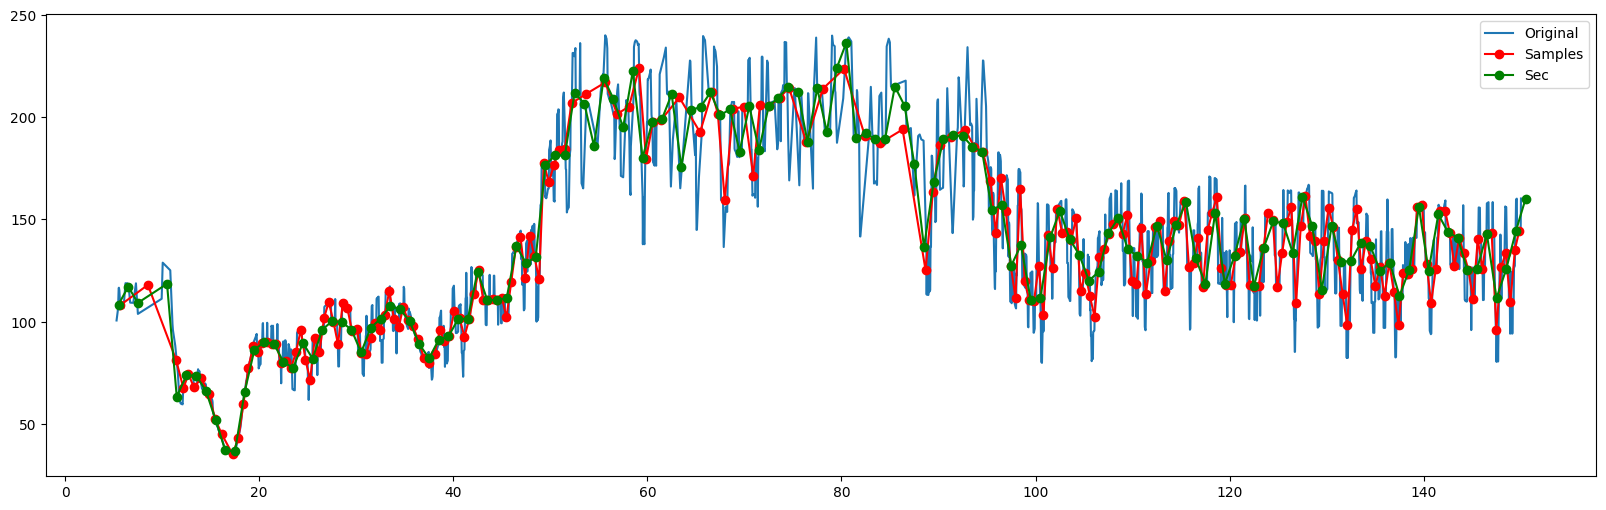

In [264]:
def smoothing_median_samples(original_time, original_distance, samples): 
    start_index = 0
    end_index = samples

    time_median_samples = []
    net_distance_median_samples = []


    # Iterate over the samples
    while end_index <= len(original_distance):
        # Calculate the mean of the current 5 samples
        median_distance = np.median(original_distance[start_index:end_index])
        
        # Add the mean distance and corresponding time to the lists
        net_distance_median_samples.append(median_distance)
        time_median_samples.append((original_time[start_index] + original_time[end_index - 1]) / 2)
        
        # Move to the next set of samples
        start_index += samples
        end_index += samples

    # If there are remaining samples (less than samples), calculate the mean for them
    if start_index < len(original_distance):
        remaining_samples = original_distance[start_index:]
        median_distance = np.median(remaining_samples)
        net_distance_median_samples.append(median_distance)
        time_median_samples.append((original_time[start_index] + original_time[-1]) / 2)

    return time_median_samples, net_distance_median_samples



DVL_time_median_samples, DVL_net_distance_median_samples = smoothing_median_samples(DVL_time_cut_outliers, DVL_net_distance_cut_outliers, 8)

FFT_time_median_samples, FFT_net_distance_median_samples = smoothing_median_samples(FFT_time_left_well, FFT_net_distance_left_well, 12)

# Plot original and smoothed data
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 6))
plt.plot(DVL_time_cut_outliers, DVL_net_distance_cut_outliers, label='Original')
plt.plot(DVL_time_median_samples, DVL_net_distance_median_samples, color='r', marker='o', linestyle='-', label='Samples')
plt.legend()
plt.show()


# Plot original and smoothed data
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 6))
plt.plot(FFT_time_left_well, FFT_net_distance_left_well, label='Original')
plt.plot(FFT_time_median_samples, FFT_net_distance_median_samples, color='r', marker='o', linestyle='-', label='Samples')
plt.legend()
plt.show()

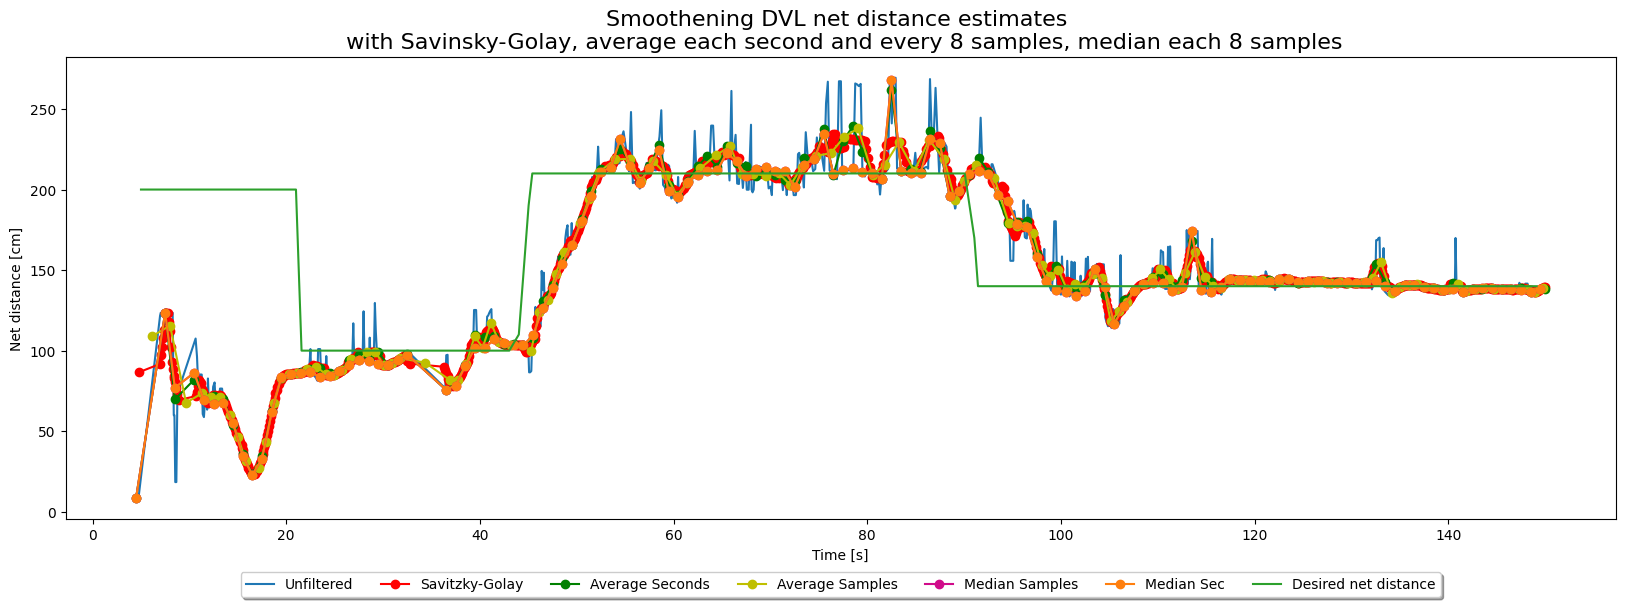

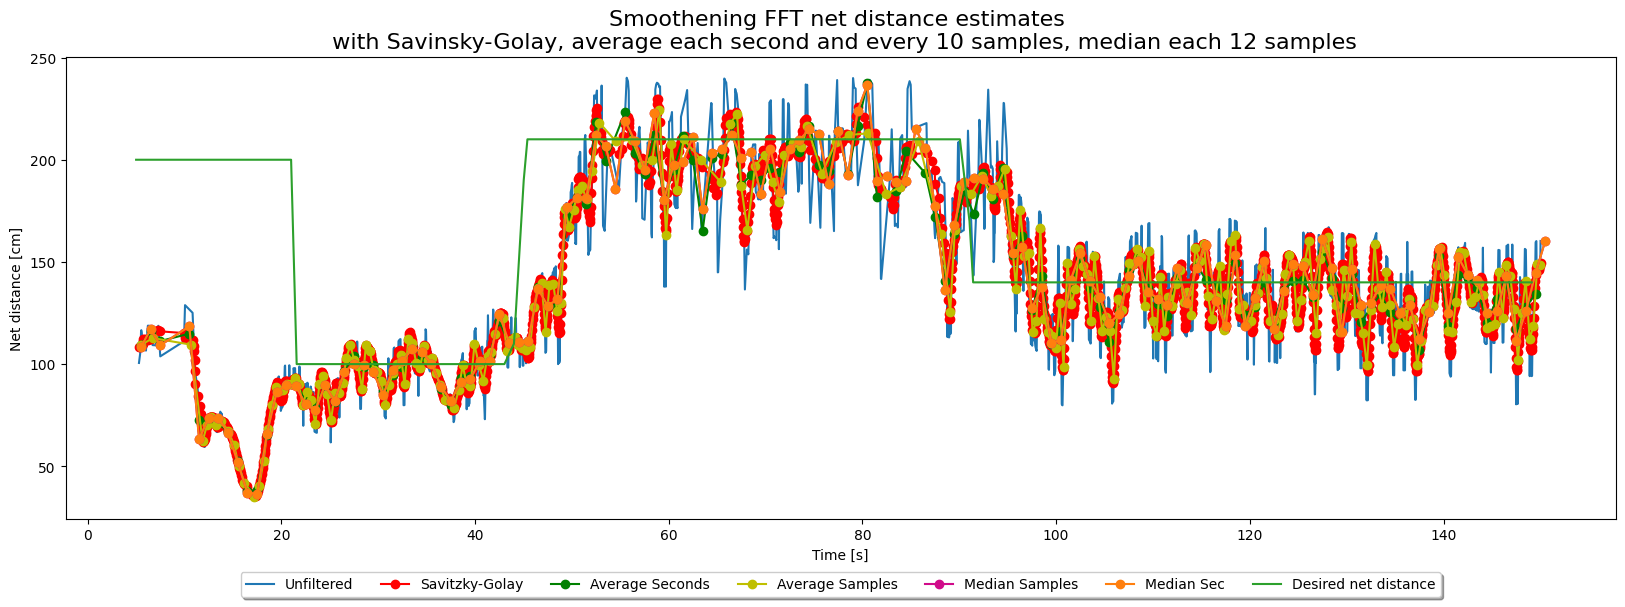

In [229]:
# Plot original and smoothed data
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 6))
plt.plot(DVL_time_cut_outliers, DVL_net_distance_cut_outliers, label='Unfiltered')
plt.plot(DVL_time_cut_outliers, DVL_net_distance_savinsky, color='r', marker='o', linestyle='-', label='Savitzky-Golay')
plt.plot(DVL_time_average_sec, DVL_net_distance_average_sec, color='g', marker='o', linestyle='-', label='Average Seconds')
plt.plot(DVL_time_average_samples, DVL_net_distance_average_samples, color='y', marker='o', linestyle='-', label='Average Samples')
plt.plot(DVL_time_median_samples, DVL_net_distance_median_samples, color='#d00b8a', marker='o', linestyle='-', label='Median Samples')
plt.plot(DVL_time_median_sec, DVL_net_distance_median_sec, marker='o', linestyle='-', label='Median Sec')
plt.plot(time_dist_d, net_dist_d, label='Desired net distance')
plt.title('Smoothening DVL net distance estimates \n with Savinsky-Golay, average each second and every 8 samples, median each 8 samples', fontsize=16)
plt.xlabel('Time [s]')  # Corrected line
plt.ylabel('Net distance [cm]')  # Corrected line
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=7)
plt.show()

# Plot original and smoothed data
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 6))
plt.plot(FFT_time_left_well, FFT_net_distance_left_well, label='Unfiltered')
plt.plot(FFT_time_left_well, FFT_net_distance_savinsky, color='r', marker='o', linestyle='-', label='Savitzky-Golay')
plt.plot(FFT_time_average_sec, FFT_net_distance_average_sec, color='g', marker='o', linestyle='-', label='Average Seconds')
plt.plot(FFT_time_average_samples, FFT_net_distance_average_samples, color='y', marker='o', linestyle='-', label='Average Samples')
plt.plot(FFT_time_median_samples, FFT_net_distance_median_samples, color='#d00b8a', marker='o', linestyle='-', label='Median Samples')
plt.plot(FFT_time_median_sec, FFT_net_distance_median_sec, marker='o', linestyle='-', label='Median Sec')
plt.plot(time_dist_d, net_dist_d, label='Desired net distance')
plt.title('Smoothening FFT net distance estimates \n with Savinsky-Golay, average each second and every 10 samples, median each 12 samples',fontsize=16 )
plt.xlabel('Time [s]')  # Corrected line
plt.ylabel('Net distance [cm]')  # Corrected line

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=7)
plt.show()

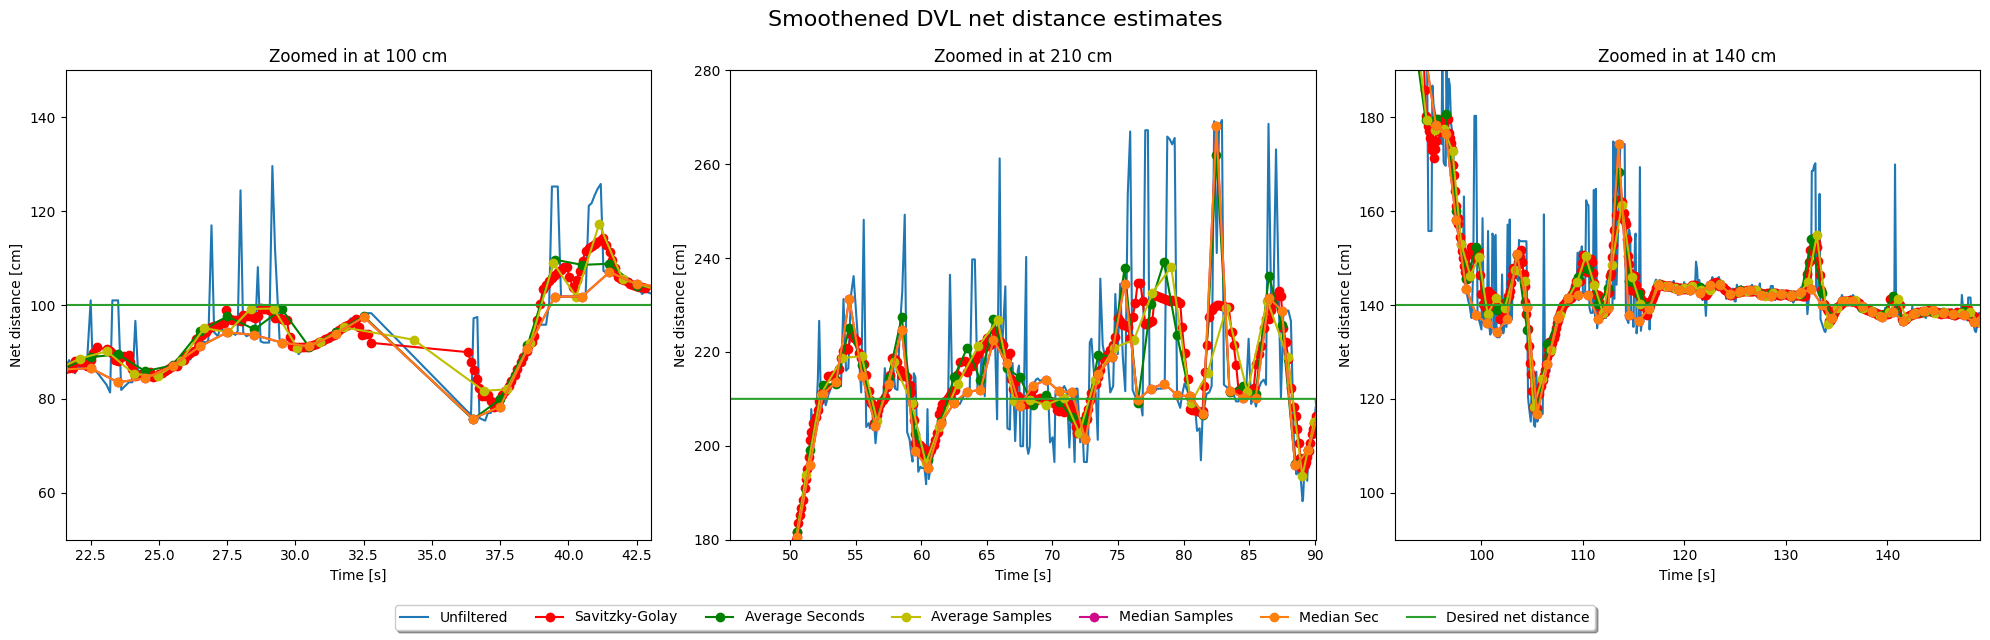

In [212]:
import matplotlib.pyplot as plt

def plot_DVL_smoothen(ax, x_min, x_max, y_min, y_max, title):
    ax.plot(DVL_time_cut_outliers, DVL_net_distance_cut_outliers, label='Unfiltered')
    ax.plot(DVL_time_cut_outliers, DVL_net_distance_savinsky, color='r', marker='o', linestyle='-', label='Savitzky-Golay')
    ax.plot(DVL_time_average_sec, DVL_net_distance_average_sec, color='g', marker='o', linestyle='-', label='Average Seconds')
    ax.plot(DVL_time_average_samples, DVL_net_distance_average_samples, color='y', marker='o', linestyle='-', label='Average Samples')
    ax.plot(DVL_time_median_samples, DVL_net_distance_median_samples, color='#d00b8a', marker='o', linestyle='-', label='Median Samples')
    ax.plot(DVL_time_median_sec, DVL_net_distance_median_sec, marker='o', linestyle='-', label='Median Sec')
    ax.plot(time_dist_d, net_dist_d, label='Desired net distance')
    ax.set_title(title)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xlabel('Time [s]')  # Set x-axis label
    ax.set_ylabel('Net distance [cm]')  # Set y-axis label

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

plot_DVL_smoothen(axes[0], 21.583284, 43.0300749, 50, 150, 'Zoomed in at 100 cm')
plot_DVL_smoothen(axes[1], 45.4092458, 90.0645161, 180, 280, 'Zoomed in at 210 cm')
plot_DVL_smoothen(axes[2], 91.4307401, 149.1144388, 90, 190, 'Zoomed in at 140 cm')
fig.suptitle('Smoothened DVL net distance estimates', fontsize=16)  # Adding a big title

# Create a single legend for all subplots
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0), fancybox=True, shadow=True, ncol=7)

plt.tight_layout()
plt.show()


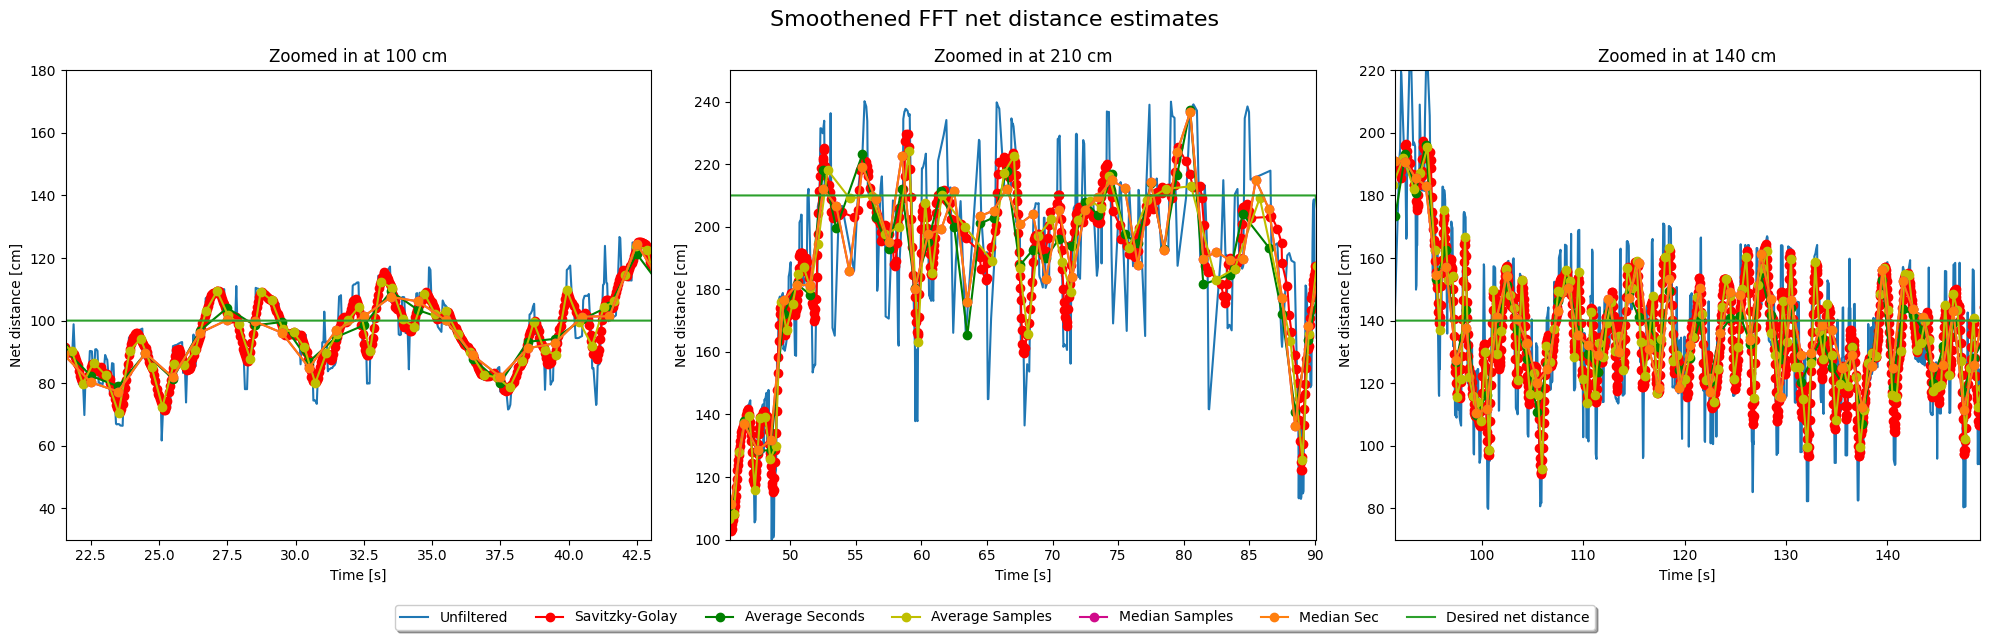

In [213]:
import matplotlib.pyplot as plt

def plot_DVL_smoothen(ax, x_min, x_max, y_min, y_max, title):
    ax.plot(FFT_time_left_well, FFT_net_distance_left_well, label='Unfiltered')
    ax.plot(FFT_time_left_well, FFT_net_distance_savinsky, color='r', marker='o', linestyle='-', label='Savitzky-Golay')
    ax.plot(FFT_time_average_sec, FFT_net_distance_average_sec, color='g', marker='o', linestyle='-', label='Average Seconds')
    ax.plot(FFT_time_average_samples, FFT_net_distance_average_samples, color='y', marker='o', linestyle='-', label='Average Samples')
    ax.plot(FFT_time_median_samples, FFT_net_distance_median_samples, color='#d00b8a', marker='o', linestyle='-', label='Median Samples')
    ax.plot(FFT_time_median_sec, FFT_net_distance_median_sec, marker='o', linestyle='-', label='Median Sec')

    ax.plot(time_dist_d, net_dist_d, label='Desired net distance')
    ax.set_title(title)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xlabel('Time [s]')  # Set x-axis label
    ax.set_ylabel('Net distance [cm]')  # Set y-axis label

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
plot_DVL_smoothen(axes[0], 21.583284, 43.0300749, 30, 180, 'Zoomed in at 100 cm')
plot_DVL_smoothen(axes[1], 45.4092458, 90.0645161, 100, 250, 'Zoomed in at 210 cm')
plot_DVL_smoothen(axes[2], 91.4307401, 149.1144388, 70, 220, 'Zoomed in at 140 cm')
fig.suptitle('Smoothened FFT net distance estimates', fontsize=16)  # Adding a big title
# Create a single legend for all subplots
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0), fancybox=True, shadow=True, ncol=7)

plt.tight_layout()
plt.show()

# Savitzky-Golay on smoothed avreage samples

[8.674993366003036, 123.50707054138184, 76.99280977249146, 86.25931739807129, 69.08901929855347, 67.18120574951172, 67.72629618644714, 55.05297780036926, 34.61214303970337, 22.892729938030243, 32.8406035900116, 62.00286149978638, 83.39760303497314, 85.44168472290039, 86.25932037830353, 86.53186559677124, 83.53387713432312, 84.35150980949402, 87.07695305347443, 91.16511940956116, 94.16310787200928, 93.61801743507385, 91.98275208473206, 91.16511940956116, 93.8905656337738, 97.43364453315735, 75.76635777950287, 78.35553288459778, 90.62003493309021, 101.79435014724731, 101.79435014724731, 106.97269439697266, 104.51980233192444, 103.70216965675354, 103.29335331916809, 109.6981406211853, 126.59590244293213, 138.5878622531891, 153.85035276412964, 165.84230661392212, 180.55970668792725, 195.82220315933228, 211.08468770980835, 213.53758573532104, 231.25298023223877, 214.7640347480774, 204.2710781097412, 213.1287693977356, 224.71191883087158, 198.82018566131592, 195.27711868286133, 204.816174507

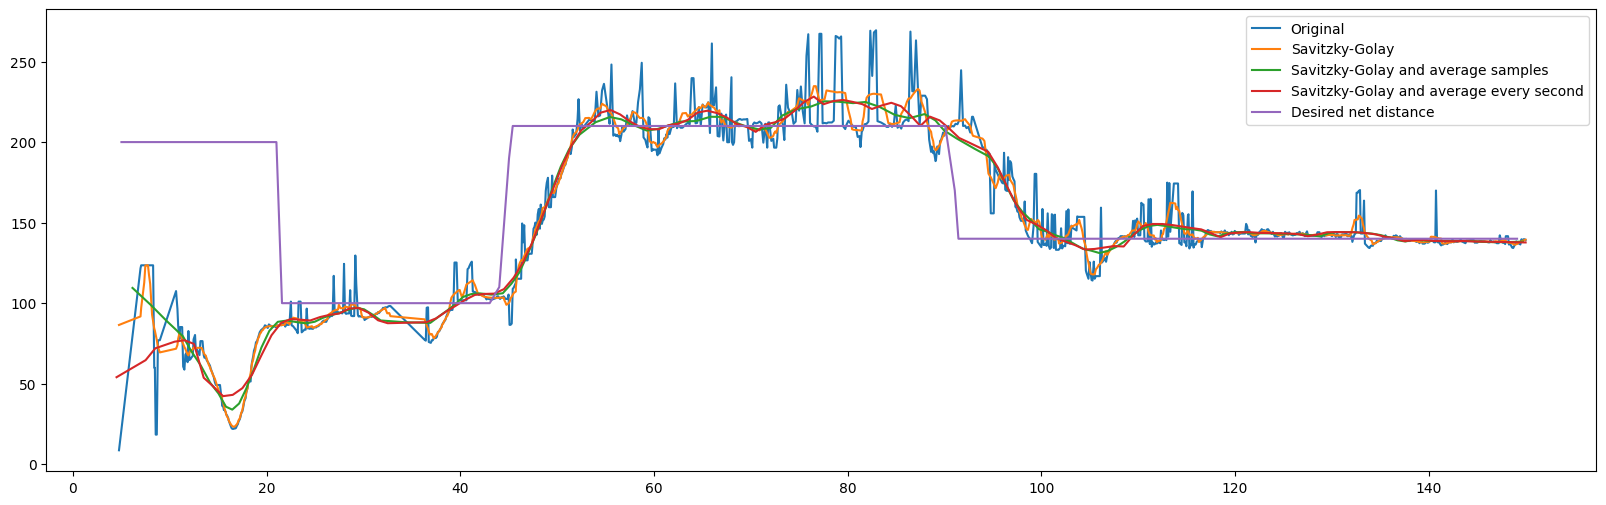

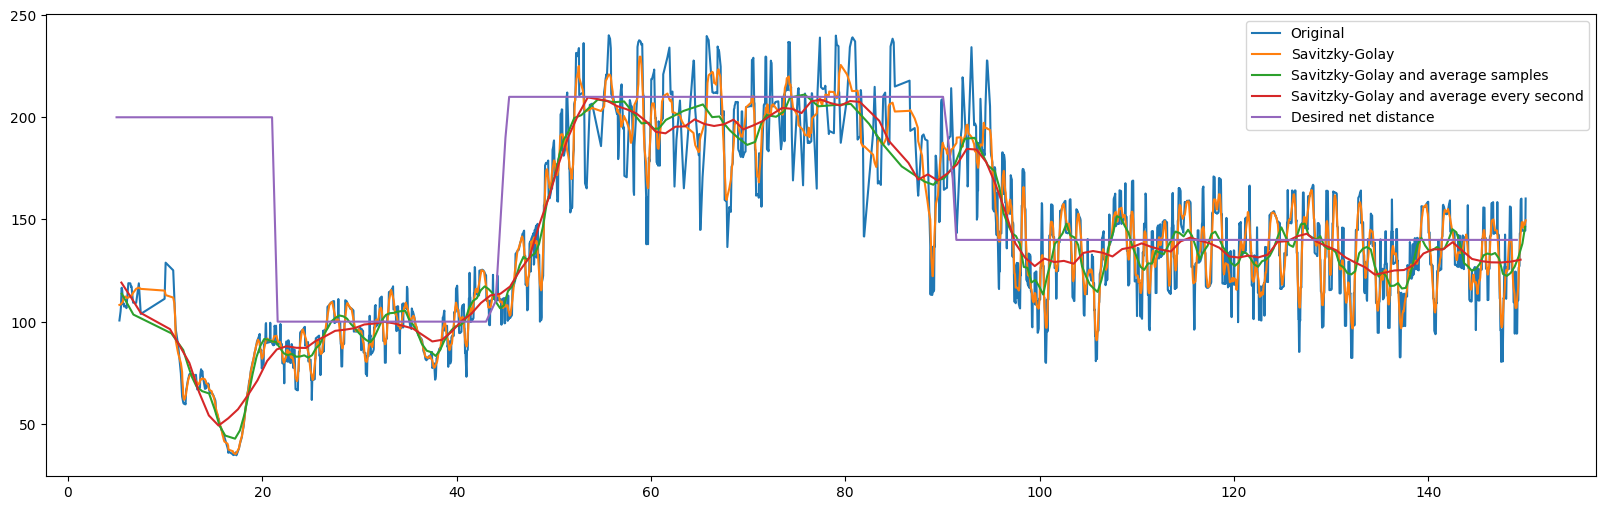

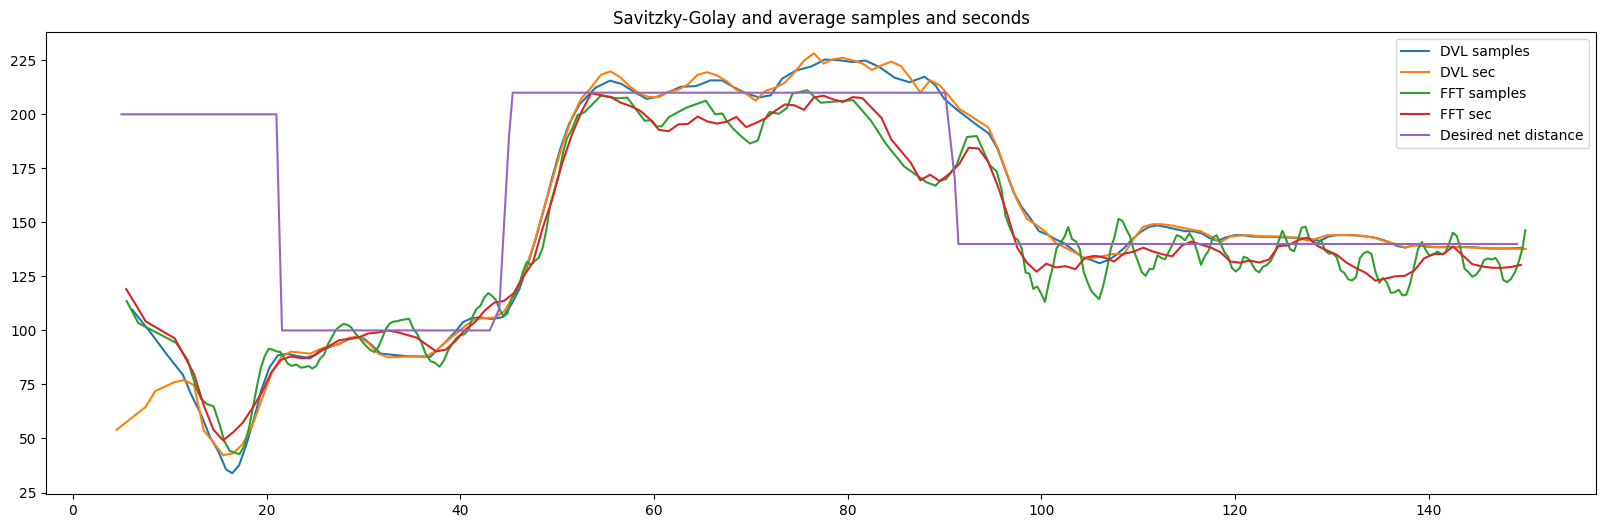

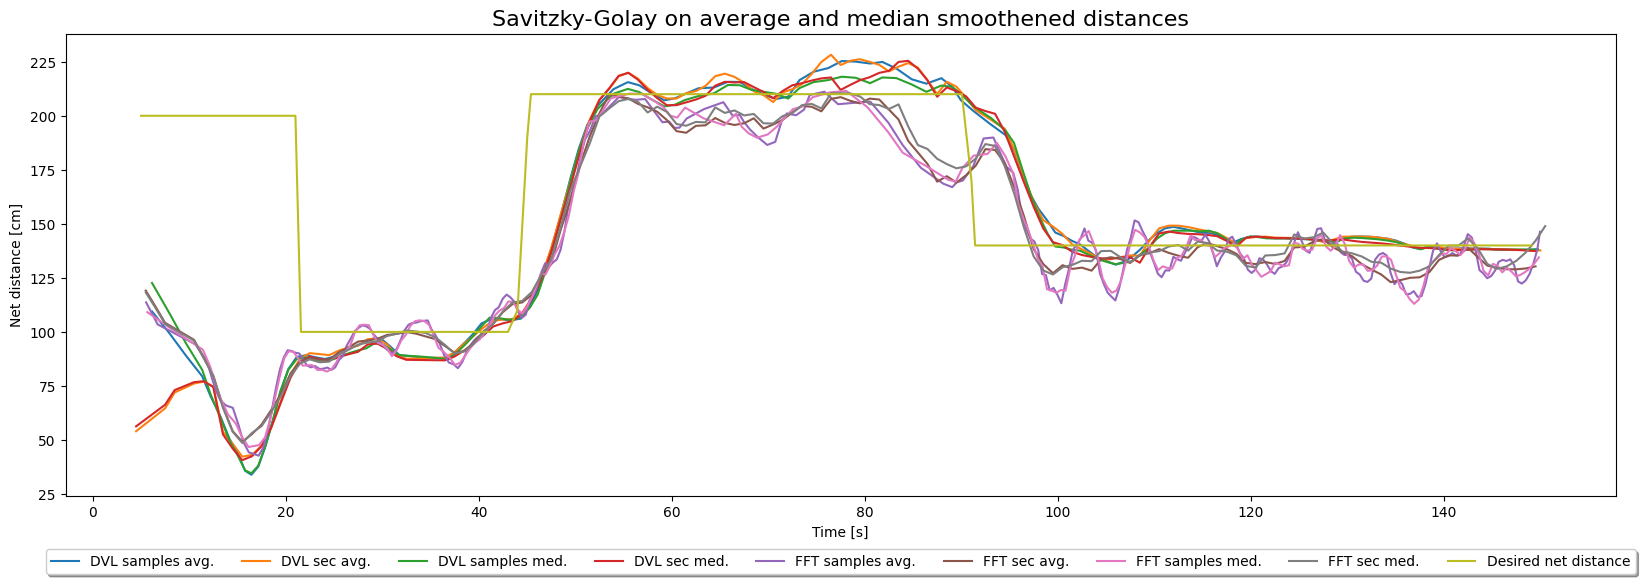

In [266]:
DVL_net_distance_savinsky_average_samples = savgol_filter(DVL_net_distance_average_samples, window_length=11, polyorder=2)

FFT_net_distance_savinsky_average_samples = savgol_filter(FFT_net_distance_average_samples, window_length=11, polyorder=2)


DVL_net_distance_savinsky_average_sec = savgol_filter(DVL_net_distance_average_sec, window_length=11, polyorder=2)

FFT_net_distance_savinsky_average_sec = savgol_filter(FFT_net_distance_average_sec, window_length=11, polyorder=2)


DVL_net_distance_savinsky_median_samples = savgol_filter(DVL_net_distance_median_samples, window_length=11, polyorder=2)

FFT_net_distance_savinsky_median_samples = savgol_filter(FFT_net_distance_median_samples, window_length=11, polyorder=2)

DVL_net_distance_savinsky_median_sec = savgol_filter(DVL_net_distance_median_sec, window_length=11, polyorder=2)

FFT_net_distance_savinsky_median_sec = savgol_filter(FFT_net_distance_median_sec, window_length=11, polyorder=2)




# Plot original and smoothed data
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 6))
plt.plot(DVL_time_cut_outliers, DVL_net_distance_cut_outliers, label='Original')
plt.plot(DVL_time_cut_outliers, DVL_net_distance_savinsky, label='Savitzky-Golay')
plt.plot(DVL_time_average_samples, DVL_net_distance_savinsky_average_samples, label='Savitzky-Golay and average samples')
plt.plot(DVL_time_average_sec, DVL_net_distance_savinsky_average_sec, label='Savitzky-Golay and average every second')
plt.plot(time_dist_d, net_dist_d, label='Desired net distance')
plt.legend()
plt.show()

# Plot original and smoothed data
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 6))
plt.plot(FFT_time_left_well, FFT_net_distance_left_well, label='Original')
plt.plot(FFT_time_left_well, FFT_net_distance_savinsky, label='Savitzky-Golay')
plt.plot(FFT_time_average_samples, FFT_net_distance_savinsky_average_samples, label='Savitzky-Golay and average samples')
plt.plot(FFT_time_average_sec, FFT_net_distance_savinsky_average_sec, label='Savitzky-Golay and average every second')
plt.plot(time_dist_d, net_dist_d, label='Desired net distance')
plt.legend()
plt.show()

# Plot original and smoothed data
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 6))
plt.plot(DVL_time_average_samples, DVL_net_distance_savinsky_average_samples, label='DVL samples')
plt.plot(DVL_time_average_sec, DVL_net_distance_savinsky_average_sec, label='DVL sec')
plt.plot(FFT_time_average_samples, FFT_net_distance_savinsky_average_samples, label='FFT samples')
plt.plot(FFT_time_average_sec, FFT_net_distance_savinsky_average_sec, label='FFT sec')
plt.plot(time_dist_d, net_dist_d, label='Desired net distance')
plt.title('Savitzky-Golay and average samples and seconds')
plt.legend()
plt.show()


# Plot original and smoothed data
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 6))
plt.plot(DVL_time_average_samples, DVL_net_distance_savinsky_average_samples, label='DVL samples avg.')
plt.plot(DVL_time_average_sec, DVL_net_distance_savinsky_average_sec, label='DVL sec avg.')
plt.plot(DVL_time_median_samples, DVL_net_distance_savinsky_median_samples, label='DVL samples med.')
plt.plot(DVL_time_median_sec, DVL_net_distance_savinsky_median_sec, label='DVL sec med.')
plt.plot(FFT_time_average_samples, FFT_net_distance_savinsky_average_samples, label='FFT samples avg.')
plt.plot(FFT_time_average_sec, FFT_net_distance_savinsky_average_sec, label='FFT sec avg.')
plt.plot(FFT_time_median_samples, FFT_net_distance_savinsky_median_samples, label='FFT samples med.')
plt.plot(FFT_time_median_sec, FFT_net_distance_savinsky_median_sec, label='FFT sec med.')
plt.plot(time_dist_d, net_dist_d, label='Desired net distance')
plt.title('Savitzky-Golay on average and median smoothened distances', fontsize=16)
plt.xlabel('Time [s]')  # Set x-axis label
plt.ylabel('Net distance [cm]')  # Set y-axis label
# Create a single legend for all subplots
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=9)
plt.show()

# Statistical 

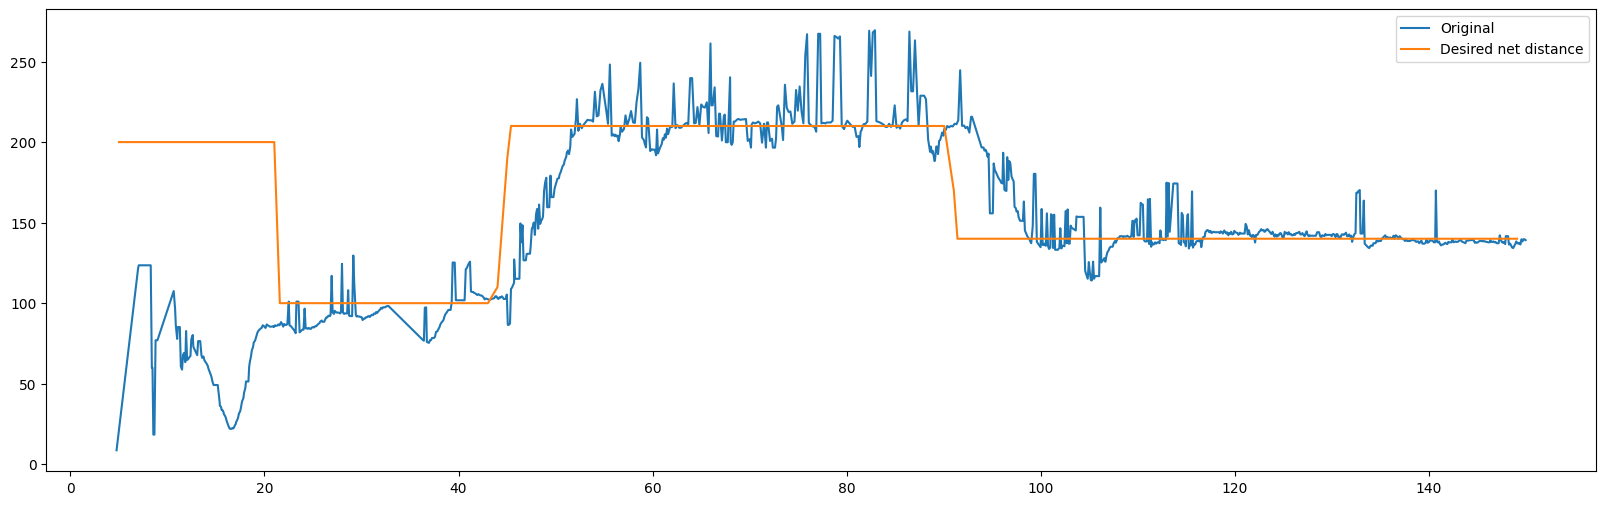

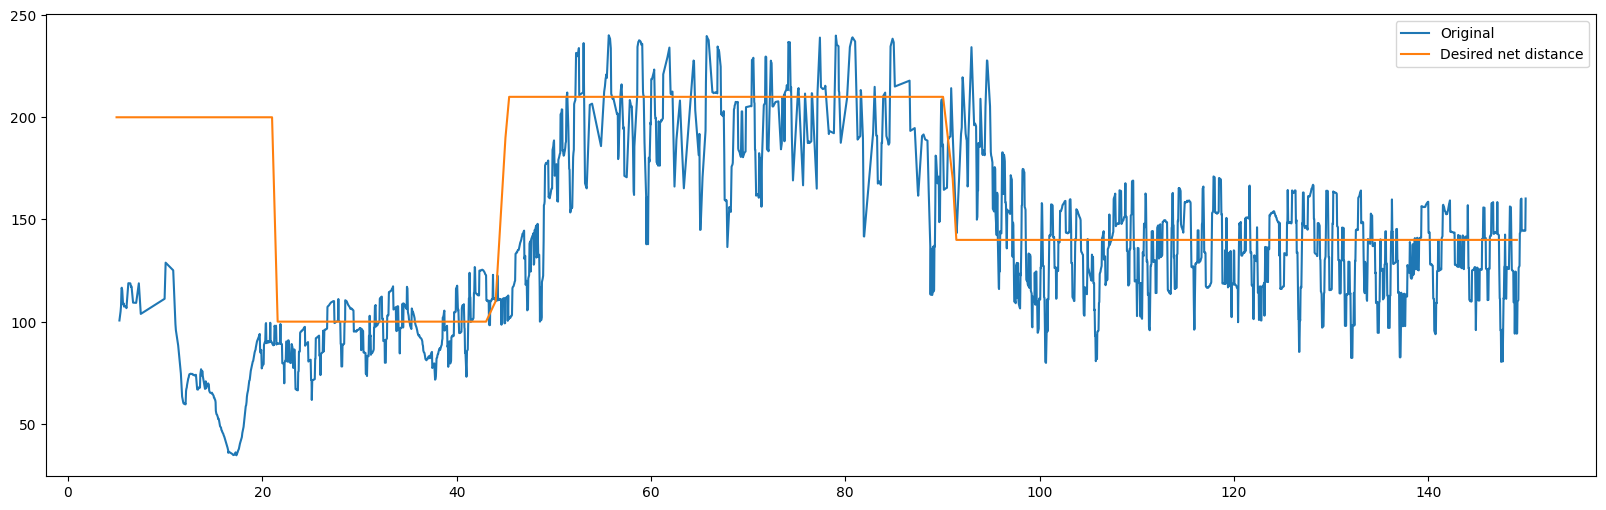

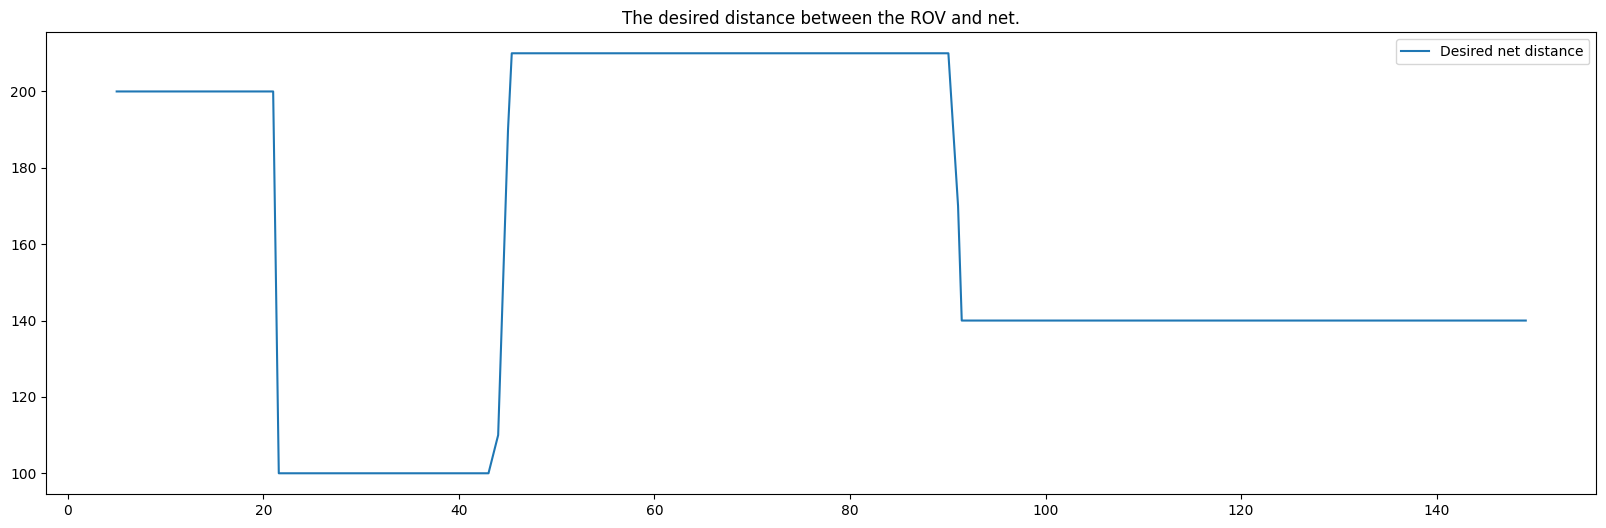

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 6))
plt.plot(DVL_time_cut_outliers, DVL_net_distance_cut_outliers, label='Original')
plt.plot(time_dist_d, net_dist_d, label='Desired net distance')
plt.legend()
plt.show()

import matplotlib.pyplot as plt
plt.figure(figsize=(20, 6))
plt.plot(FFT_time_left_well, FFT_net_distance_left_well, label='Original')
plt.plot(time_dist_d, net_dist_d, label='Desired net distance')
plt.legend()
plt.show()

import matplotlib.pyplot as plt
plt.figure(figsize=(20, 6))
plt.plot(time_dist_d, net_dist_d, label='Desired net distance')
plt.legend()
plt.title('The desired distance between the ROV and net.')
plt.show()

# Divide it to three sections regarding the desired net distance

## 100 cm, 210 cm and 140 cm

# Q: now i have just divided from when th straight reference line begins. Should I maybe start it from when the ROV has managed to come to the desired distance?

In [241]:
# Plot original and smoothed data
print("At time:", time_dist_d[1], "the net distance in cm is:", net_dist_d[1])
print("At time:", time_dist_d[17], "the net distance in cm is:", net_dist_d[17])
print("At time:", time_dist_d[39], "the net distance in cm is:", net_dist_d[39])
print("At time:", time_dist_d[40], "the net distance in cm is:", net_dist_d[40])
print("At time:", time_dist_d[41], "the net distance in cm is:", net_dist_d[41])
print("At time:", time_dist_d[42], "the net distance in cm is:", net_dist_d[42])
print("At time:", time_dist_d[88], "the net distance in cm is:", net_dist_d[88])
print("At time:", time_dist_d[89], "the net distance in cm is:", net_dist_d[89])
print("At time:", time_dist_d[90], "the net distance in cm is:", net_dist_d[90])
print("At time:", time_dist_d[113], "the net distance in cm is:", net_dist_d[113])
print("At time:", time_dist_d[-1], "the net distance in cm is:", net_dist_d[-1])



DVL_time_cut_outliers_100 = []
DVL_time_cut_outliers_210 = []
DVL_time_cut_outliers_140 = []

DVL_net_distance_cut_outliers_100 = []
DVL_net_distance_cut_outliers_210 = []
DVL_net_distance_cut_outliers_140 = []

FFT_time_left_well_100 = []
FFT_time_left_well_210 = []
FFT_time_left_well_140 = []

FFT_net_distance_left_well_100 = []
FFT_net_distance_left_well_210 = []
FFT_net_distance_left_well_140 = []


net_dist_d_100 = net_dist_d[17]
net_dist_d_210 = net_dist_d[42]
net_dist_d_140 = net_dist_d[90]




print(time_dist_d[17:40])

'''
for i in range(len(DVL_time_cut_outliers)):
    if (DVL_time_cut_outliers[i] >= time_dist_d[17]) and (DVL_time_cut_outliers[i] <= time_dist_d[39]) :
        DVL_time_cut_outliers_100.append(DVL_time_cut_outliers[i])
        DVL_net_distance_cut_outliers_100.append(DVL_net_distance_cut_outliers[i])

    if (DVL_time_cut_outliers[i] >= time_dist_d[42]) and (DVL_time_cut_outliers[i] <= time_dist_d[88]) :
        DVL_time_cut_outliers_210.append(DVL_time_cut_outliers[i])
        DVL_net_distance_cut_outliers_210.append(DVL_net_distance_cut_outliers[i])
    
    if (DVL_time_cut_outliers[i] >= time_dist_d[90]) and (DVL_time_cut_outliers[i] <= time_dist_d[-1]) :
        DVL_time_cut_outliers_140.append(DVL_time_cut_outliers[i])
        DVL_net_distance_cut_outliers_140.append(DVL_net_distance_cut_outliers[i])

for i in range(len(FFT_time_left_well)):
    if (FFT_time_left_well[i] >= time_dist_d[17]) and (FFT_time_left_well[i] <= time_dist_d[39]) :
        FFT_time_left_well_100.append(FFT_time_left_well[i])
        FFT_net_distance_left_well_100.append(FFT_net_distance_left_well[i])

    if (FFT_time_left_well[i] >= time_dist_d[42]) and (FFT_time_left_well[i] <= time_dist_d[88]) :
        FFT_time_left_well_210.append(FFT_time_left_well[i])
        FFT_net_distance_left_well_210.append(FFT_net_distance_left_well[i])
    
    if (FFT_time_left_well[i] >= time_dist_d[90]) and (FFT_time_left_well[i] <= time_dist_d[-1]) :
        FFT_time_left_well_140.append(FFT_time_left_well[i])
        FFT_net_distance_left_well_140.append(FFT_net_distance_left_well[i])
 
 
'''
def separate_net_distances_to_desired(net_distances, net_distances_time):
    time_100 = []
    time_210 = []
    time_140 = []

    net_distance_100 = []
    net_distance_210 = []
    net_distance_140 = []

    for i in range(len(net_distances)):
        if (net_distances_time[i] >= time_dist_d[17]) and (net_distances_time[i] <= time_dist_d[39]) :
            time_100.append(net_distances_time[i])
            net_distance_100.append(net_distances[i])

        if (net_distances_time[i] >= time_dist_d[42]) and (net_distances_time[i] <= time_dist_d[88]) :
            time_210.append(net_distances_time[i])
            net_distance_210.append(net_distances[i])
        
        if (net_distances_time[i] >= time_dist_d[90]) and (net_distances_time[i] <= time_dist_d[-1]) :
            time_140.append(net_distances_time[i])
            net_distance_140.append(net_distances[i])

    return time_100, time_210, time_140, net_distance_100, net_distance_210, net_distance_140 


FFT_time_left_well_100, FFT_time_left_well_210, FFT_time_left_well_140, FFT_net_distance_left_well_100, FFT_net_distance_left_well_210, FFT_net_distance_left_well_140 = separate_net_distances_to_desired(FFT_net_distance_left_well, FFT_time_left_well)
DVL_time_cut_outliers_100, DVL_time_cut_outliers_210, DVL_time_cut_outliers_140, DVL_net_distance_cut_outliers_100, DVL_net_distance_cut_outliers_210, DVL_net_distance_cut_outliers_140 = separate_net_distances_to_desired(DVL_net_distance_cut_outliers, DVL_time_cut_outliers)




At time: 5.9966875 the net distance in cm is: 200.0
At time: 21.583284 the net distance in cm is: 100.0
At time: 43.0300749 the net distance in cm is: 100.0
At time: 44.0187086 the net distance in cm is: 110.00000238418579
At time: 45.0271692 the net distance in cm is: 189.9999976158142
At time: 45.4092458 the net distance in cm is: 209.99999046325684
At time: 90.0645161 the net distance in cm is: 209.99999046325684
At time: 91.053756 the net distance in cm is: 170.00000476837158
At time: 91.4307401 the net distance in cm is: 139.9999976158142
At time: 114.0766742 the net distance in cm is: 139.9999976158142
At time: 149.1144388 the net distance in cm is: 139.9999976158142
[21.583284, 22.021787, 23.0113523, 24.0200189, 25.0210622, 26.029829, 27.0373225, 28.022525, 29.0269317, 30.0294234, 31.0247089, 32.024825, 33.0297977, 34.0267703, 35.0291253, 36.0277952, 37.0227454, 38.018701, 39.0328925, 40.0320375, 41.0223468, 42.0242606, 43.0300749]


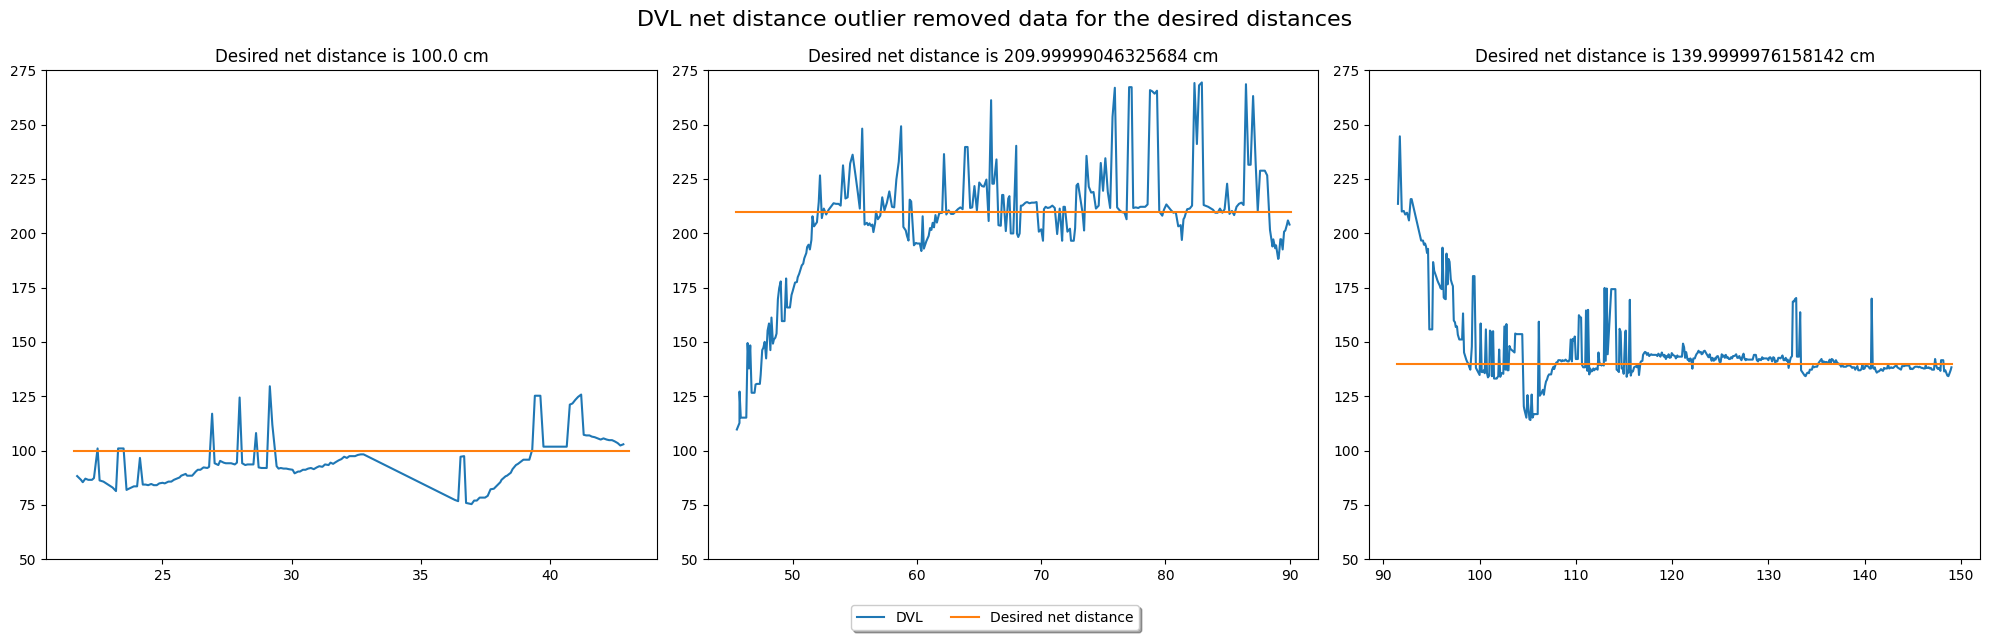

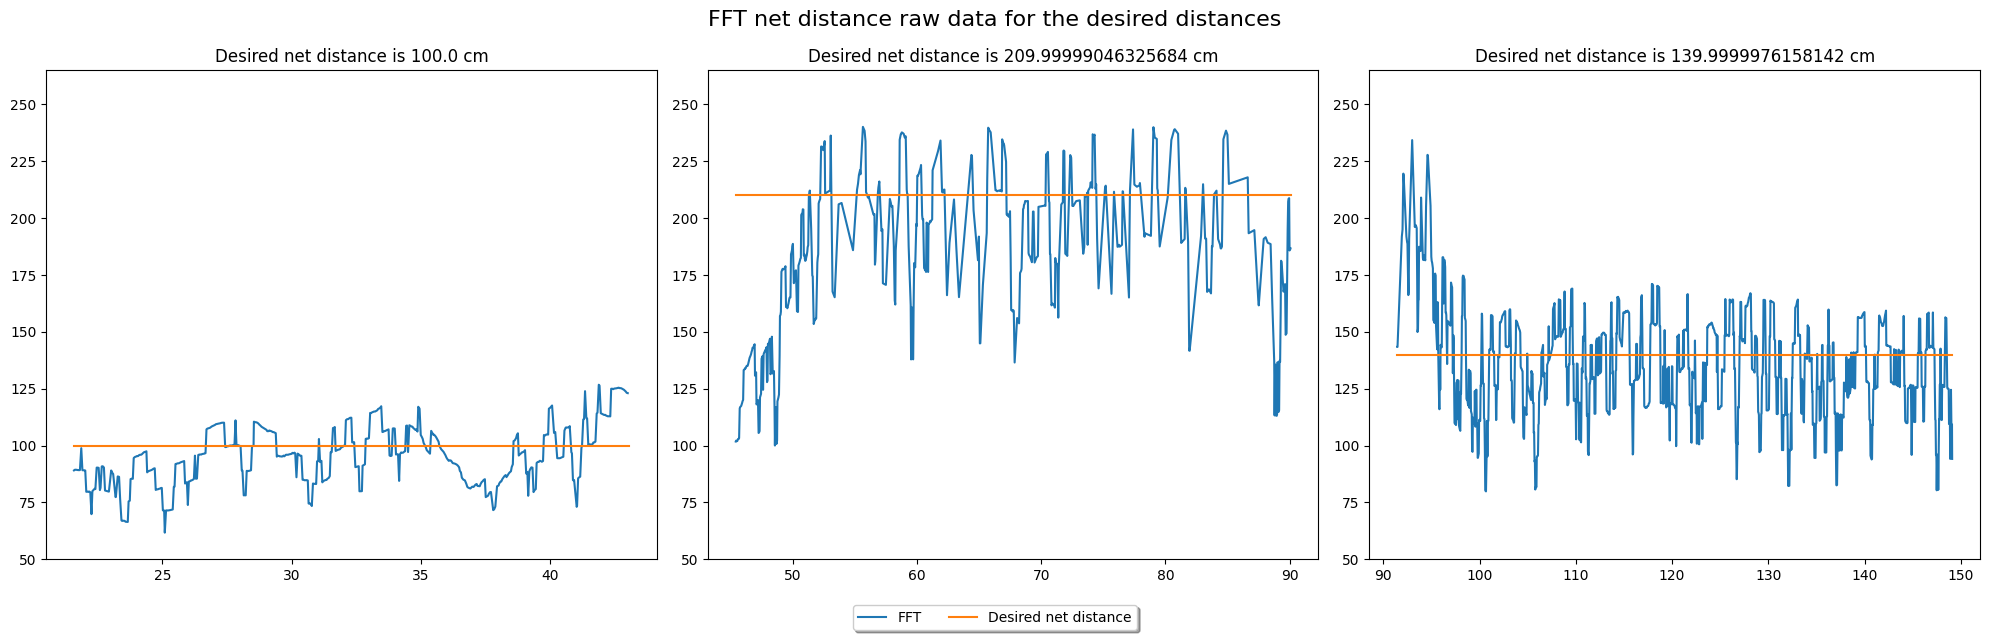

In [236]:
import matplotlib.pyplot as plt

# Create subplots with 1 row and 3 columns
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

# Plot for the first subplot
axs[0].plot(DVL_time_cut_outliers_100, DVL_net_distance_cut_outliers_100, label='DVL')
axs[0].plot(time_dist_d[17:40], net_dist_d[17:40], label='Desired net distance')
axs[0].set_title('Desired net distance is 100.0 cm')
axs[0].set_ylim(50, 275)  # Set y-axis limits

# Plot for the second subplot
axs[1].plot(DVL_time_cut_outliers_210, DVL_net_distance_cut_outliers_210, label='DVL')
axs[1].plot(time_dist_d[42:89], net_dist_d[42:89], label='Desired net distance')
axs[1].set_title('Desired net distance is 209.99999046325684 cm')
axs[1].set_ylim(50, 275)  # Set y-axis limits

# Plot for the third subplot
axs[2].plot(DVL_time_cut_outliers_140, DVL_net_distance_cut_outliers_140, label='DVL')
axs[2].plot(time_dist_d[90:], net_dist_d[90:], label='Desired net distance')
axs[2].set_title('Desired net distance is 139.9999976158142 cm')
axs[2].set_ylim(50, 275)  # Set y-axis limits

# Create a single legend for all subplots
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0), fancybox=True, shadow=True, ncol=2)

fig.suptitle("DVL net distance outlier removed data for the desired distances", fontsize = 16)
plt.tight_layout()
plt.show()


# Create subplots with 1 row and 3 columns
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

# Plot for the first subplot
axs[0].plot(FFT_time_left_well_100, FFT_net_distance_left_well_100, label='FFT')
axs[0].plot(time_dist_d[17:40], net_dist_d[17:40], label='Desired net distance')
axs[0].set_title('Desired net distance is 100.0 cm')
axs[0].set_ylim(50, 265)  # Set y-axis limits

# Plot for the second subplot
axs[1].plot(FFT_time_left_well_210, FFT_net_distance_left_well_210, label='FFT')
axs[1].plot(time_dist_d[42:89], net_dist_d[42:89], label='Desired net distance')
axs[1].set_title('Desired net distance is 209.99999046325684 cm')
axs[1].set_ylim(50, 265)  # Set y-axis limits

# Plot for the third subplot
axs[2].plot(FFT_time_left_well_140, FFT_net_distance_left_well_140, label='FFT')
axs[2].plot(time_dist_d[90:], net_dist_d[90:], label='Desired net distance')
axs[2].set_title('Desired net distance is 139.9999976158142 cm')
axs[2].set_ylim(50, 265)  # Set y-axis limits
# Create a single legend for all subplots
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0), fancybox=True, shadow=True, ncol=2)

fig.suptitle("FFT net distance raw data for the desired distances", fontsize = 16)
plt.tight_layout()
plt.show()


## Error statistics
First find the error
- MAE: The mean absolute error, defined as the average variance between the significant values in the dataset and the projected values in the same dataset
- MSE: the mean squared error of an estimator measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value
- RMSE: root mean squared error.

Then standard deviation directly on errors.

IQR 


Boxplots på distanser
Violin plots

## MAE, MSE, RMSE

In [ ]:
import numpy as np
from tabulate import tabulate

# Compute error between original and desired net distances
DVL_errors = np.array([])
FFT_errors = np.array([])


# Error for 100 cm
DVL_error_100 = np.abs(np.array(DVL_net_distance_cut_outliers_100) - [net_dist_d[17]] * len(DVL_net_distance_cut_outliers_100))
DVL_errors = np.concatenate((DVL_errors, DVL_error_100))

FFT_error_100 = np.abs(np.array(FFT_net_distance_left_well_100) - [net_dist_d[17]] * len(FFT_net_distance_left_well_100))
FFT_errors = np.concatenate((FFT_errors, FFT_error_100))


# Error for 210 cm
DVL_error_210 = np.abs(np.array(DVL_net_distance_cut_outliers_210) - [net_dist_d[42]] * len(DVL_net_distance_cut_outliers_210))
DVL_errors = np.concatenate((DVL_errors, DVL_error_210))

FFT_error_210 = np.abs(np.array(FFT_net_distance_left_well_210) - [net_dist_d[42]] * len(FFT_net_distance_left_well_210))
FFT_errors = np.concatenate((FFT_errors, FFT_error_210))


# Error for 140 cm
DVL_error_140 = np.abs(np.array(DVL_net_distance_cut_outliers_140) - [net_dist_d[90]] * len(DVL_net_distance_cut_outliers_140))
DVL_errors = np.concatenate((DVL_errors, DVL_error_140))

FFT_error_140 = np.abs(np.array(FFT_net_distance_left_well_140) - [net_dist_d[90]] * len(FFT_net_distance_left_well_140))
FFT_errors = np.concatenate((FFT_errors, FFT_error_140))

# Compute MAE
DVL_mae_100 = np.mean(np.abs(DVL_error_100))
DVL_mae_210 = np.mean(np.abs(DVL_error_210))
DVL_mae_140 = np.mean(np.abs(DVL_error_140))
DVL_mae = np.mean(np.abs(DVL_errors))

FFT_mae_100 = np.mean(np.abs(FFT_error_100))
FFT_mae_210 = np.mean(np.abs(FFT_error_210))
FFT_mae_140 = np.mean(np.abs(FFT_error_140))
FFT_mae = np.mean(np.abs(FFT_errors))

# Compute MSE
DVL_mse_100 = np.mean(np.square(DVL_error_100))
DVL_mse_210 = np.mean(np.square(DVL_error_210))
DVL_mse_140 = np.mean(np.square(DVL_error_140))
DVL_mse = np.mean(np.square(DVL_errors))

FFT_mse_100 = np.mean(np.square(FFT_error_100))
FFT_mse_210 = np.mean(np.square(FFT_error_210))
FFT_mse_140 = np.mean(np.square(FFT_error_140))
FFT_mse = np.mean(np.square(FFT_errors))

# Compute RMSE
DVL_rmse_100 = np.sqrt(np.mean(np.square(DVL_error_100)))
DVL_rmse_210 = np.sqrt(np.mean(np.square(DVL_error_210)))
DVL_rmse_140 = np.sqrt(np.mean(np.square(DVL_error_140)))
DVL_rmse = np.sqrt(np.mean(np.square(DVL_errors)))

FFT_rmse_100 = np.sqrt(np.mean(np.square(FFT_error_100)))
FFT_rmse_210 = np.sqrt(np.mean(np.square(FFT_error_210)))
FFT_rmse_140 = np.sqrt(np.mean(np.square(FFT_error_140)))
FFT_rmse = np.sqrt(np.mean(np.square(FFT_errors)))


print("Mean Absolute Error (MAE) for DV and FFT:")
# Create table
table = [
    ["FFT", FFT_mae, FFT_mae_100, FFT_mae_210, FFT_mae_140],
    ["DVL", DVL_mae, DVL_mae_100, DVL_mae_210, DVL_mae_140]
]

# Print table
headers = ["Method", "Overall MAE", "MAE for 100 cm", "MAE for 210 cm", "MAE for 140 cm"]
print(tabulate(table, headers=headers, tablefmt="grid"))

print("Mean Squared Error (MSE) for DVL and FFT:")
# Create table
table = [
    ["FFT", FFT_mse, FFT_mse_100, FFT_mse_210, FFT_mse_140],
    ["DVL", DVL_mse, DVL_mse_100, DVL_mse_210, DVL_mse_140]
]

# Print table
headers = ["Method", "Overall MSE", "MSE for 100 cm", "MSE for 210 cm", "MSE for 140 cm"]
print(tabulate(table, headers=headers, tablefmt="grid"))


print("Root Mean Squared Error (RMSE) for DVL and FFT:")
# Create table
table = [
    ["FFT", FFT_rmse, FFT_rmse_100, FFT_rmse_210, FFT_rmse_140],
    ["DVL", DVL_rmse, DVL_rmse_100, DVL_rmse_210, DVL_rmse_140]
]

# Print table
headers = ["Method", "Overall RMSE", "RMSE for 100 cm","RMSE for 210 cm", "RMSE for 140 cm"]
print(tabulate(table, headers=headers, tablefmt="grid"))



Mean Absolute Error (MAE) for DV and FFT:
+----------+---------------+------------------+------------------+------------------+
| Method   |   Overall MAE |   MAE for 100 cm |   MAE for 210 cm |   MAE for 140 cm |
+==========+===============+==================+==================+==================+
| FFT      |       20.1135 |          11.0961 |          34.6137 |          18.1623 |
+----------+---------------+------------------+------------------+------------------+
| DVL      |       12.3931 |          10.2184 |          19.8442 |           8.913  |
+----------+---------------+------------------+------------------+------------------+
Mean Squared Error (MSE) for DVL and FFT:
+----------+---------------+------------------+------------------+------------------+
| Method   |   Overall MSE |   MSE for 100 cm |   MSE for 210 cm |   MSE for 140 cm |
+==========+===============+==================+==================+==================+
| FFT      |       761.658 |          184.735 |         

In [ ]:
# Standard deviation for MAE
DVL_std_100 = np.std(np.abs(DVL_error_100))
DVL_std_210 = np.std(np.abs(DVL_error_210))
DVL_std_140 = np.std(np.abs(DVL_error_140))
DVL_std = np.std(np.abs(DVL_errors))

FFT_std_100 = np.std(np.abs(FFT_error_100))
FFT_std_210 = np.std(np.abs(FFT_error_210))
FFT_std_140 = np.std(np.abs(FFT_error_140))
FFT_std = np.std(np.abs(FFT_errors))


print("Standard deviation for DVL and FFT:")
# Define the data
data = [
    ["DVL", DVL_std, DVL_std_100, DVL_std_210, DVL_std_140],
    ["FFT", FFT_std, FFT_std_100, FFT_std_210, FFT_std_140]
]

# Define the headers
headers = ["Method", "Overall Std", "Std for 100 cm", "Std for 210 cm", "Std for 140 cm"]

# Print the table
print(tabulate(data, headers=headers, tablefmt="grid"))

Standard deviation for DVL and FFT:
+----------+---------------+------------------+------------------+------------------+
| Method   |   Overall Std |   Std for 100 cm |   Std for 210 cm |   Std for 140 cm |
+==========+===============+==================+==================+==================+
| DVL      |       17.791  |          6.89007 |          24.1843 |          14.4056 |
+----------+---------------+------------------+------------------+------------------+
| FFT      |       18.8972 |          7.84937 |          29.0291 |          13.3305 |
+----------+---------------+------------------+------------------+------------------+


# IQR

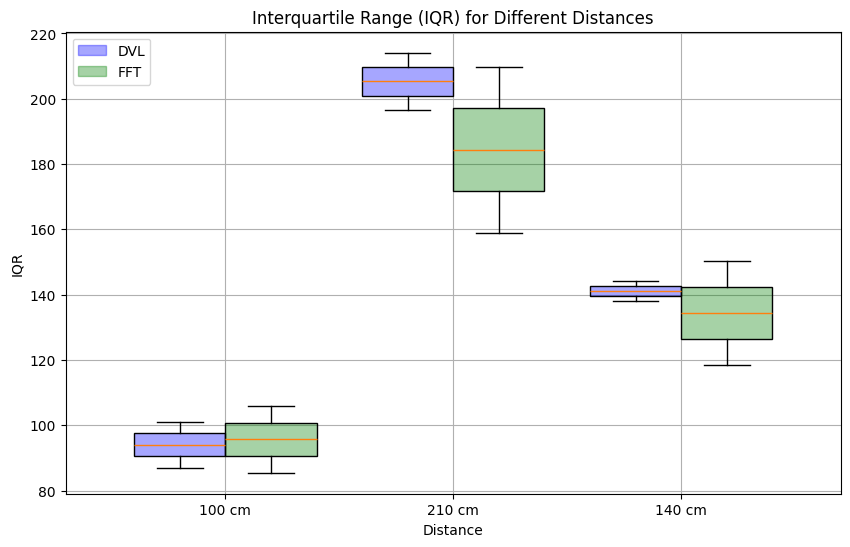

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Calculate IQR for DVL errors
DVL_IQR = [[np.percentile(DVL_net_distance_cut_outliers_100, 25), np.percentile(DVL_net_distance_cut_outliers_100, 75)],
           [np.percentile(DVL_net_distance_cut_outliers_210, 25), np.percentile(DVL_net_distance_cut_outliers_210, 75)],
           [np.percentile(DVL_net_distance_cut_outliers_140, 25), np.percentile(DVL_net_distance_cut_outliers_140, 75)]]

FFT_IQR = [[np.percentile(FFT_net_distance_left_well_100, 25), np.percentile(FFT_net_distance_left_well_100, 75)],
           [np.percentile(FFT_net_distance_left_well_210, 25), np.percentile(FFT_net_distance_left_well_210, 75)],
           [np.percentile(FFT_net_distance_left_well_140, 25), np.percentile(FFT_net_distance_left_well_140, 75)]]

# Create boxplot
plt.figure(figsize=(10, 6))

# Boxplot for DVL
plt.boxplot(DVL_IQR, labels=['100 cm', '210 cm', '140 cm'], positions=[1, 2, 3], widths=0.4, patch_artist=True, boxprops=dict(facecolor=(0, 0, 1, 0.35)))
# Boxplot for FFT
plt.boxplot(FFT_IQR, labels=['100 cm', '210 cm', '140 cm'], positions=[1.4, 2.4, 3.4], widths=0.4, patch_artist=True, boxprops=dict(facecolor=(0, 0.5, 0, 0.35)))

plt.title('Interquartile Range (IQR) for Different Distances')
plt.xlabel('Distance')
plt.ylabel('IQR')
plt.xticks([1.2, 2.2, 3.2], ['100 cm', '210 cm', '140 cm'])
# Create custom legend handles
DVL_handle = mpatches.Patch(color=(0, 0, 1, 0.35), label='DVL')  # Blue with 50% transparency
FFT_handle = mpatches.Patch(color=(0, 0.5, 0, 0.35), label='FFT')  # Green with 50% transparency

# Create legend
plt.legend(handles=[DVL_handle, FFT_handle], loc='upper left')

plt.grid(True)
plt.show()



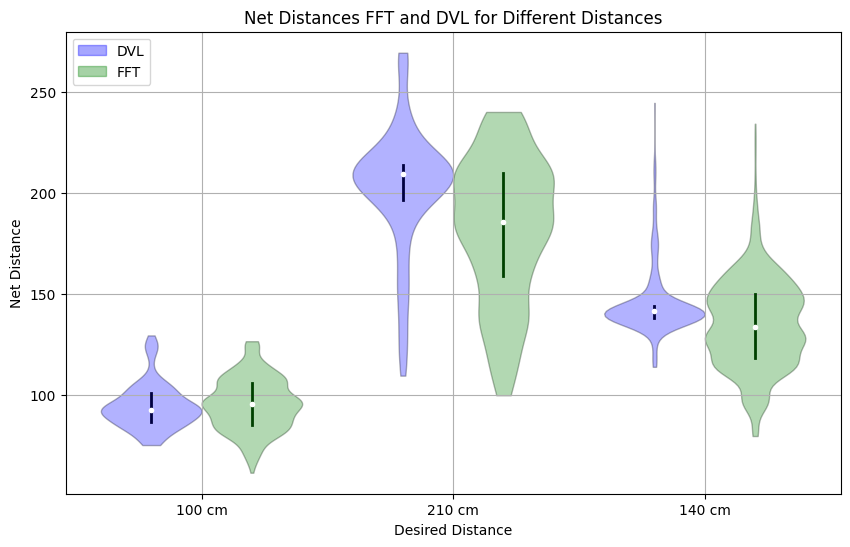

Median DVL 100:  92.80038475990295
Median DVL 210:  209.4494104385376
Median DVL 140:  141.44957661628723
Median FFT 100:  95.7768
Median FFT 210:  185.922
Median FFT 140:  133.6615


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Create violin plots
plt.figure(figsize=(10, 6))

# Calculate interquartile range for each dataset
def calculate_iqr(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    return q1, q3

DVL_iqr_100 = calculate_iqr(DVL_net_distance_cut_outliers_100)
DVL_iqr_210 = calculate_iqr(DVL_net_distance_cut_outliers_210)
DVL_iqr_140 = calculate_iqr(DVL_net_distance_cut_outliers_140)

FFT_iqr_100 = calculate_iqr(FFT_net_distance_left_well_100)
FFT_iqr_210 = calculate_iqr(FFT_net_distance_left_well_210)
FFT_iqr_140 = calculate_iqr(FFT_net_distance_left_well_140)


# Define colors with transparency for each violin plot
colors_DVL = [(0, 0, 1, 0.5), (0, 0, 1, 0.5), (0, 0, 1, 0.5)]  # Blue with 50% transparency
colors_FFT = [(0, 0.5, 0, 0.85), (0, 0.5, 0, 0.85), (0, 0.5, 0, 0.85)]  # Green with 50% transparency

# Violin plot for DVL
plots = plt.violinplot(dataset=[DVL_net_distance_cut_outliers_100, DVL_net_distance_cut_outliers_210, DVL_net_distance_cut_outliers_140],
                       positions=[1, 2, 3], widths=0.4, showmeans=False, showextrema=False)

# Set the color of the violin patches for DVL
for pc, color in zip(plots['bodies'], colors_DVL):
    pc.set_facecolor(color)
    pc.set_edgecolor((0, 0, 0.1, 1))

# Add interquartile range lines
plt.plot([1, 1], DVL_iqr_100, color=(0, 0, 0.25, 1), linewidth=2)
plt.plot([2, 2], DVL_iqr_210, color=(0, 0, 0.25, 1), linewidth=2)
plt.plot([3, 3], DVL_iqr_140, color=(0, 0, 0.25, 1), linewidth=2)

# Violin plot for FFT
plots_FFT = plt.violinplot(dataset=[FFT_net_distance_left_well_100, FFT_net_distance_left_well_210, FFT_net_distance_left_well_140],
                            positions=[1.4, 2.4, 3.4], widths=0.4, showmeans=False, showextrema=False)

# Add interquartile range lines for FFT
plt.plot([1.4, 1.4], FFT_iqr_100, color=(0, 0.25, 0, 1), linewidth=2)
plt.plot([2.4, 2.4], FFT_iqr_210, color=(0, 0.25, 0, 1), linewidth=2)
plt.plot([3.4, 3.4], FFT_iqr_140, color=(0, 0.25, 0, 1), linewidth=2)

# Set the color of the violin patches for FFT
for pc, color in zip(plots_FFT['bodies'], colors_FFT):
    pc.set_facecolor(color)
    pc.set_edgecolor((0, 0.1, 0, 1))


# Calculate medians for DVL and FFT
medians_DVL = [np.median(data) for data in [DVL_net_distance_cut_outliers_100, DVL_net_distance_cut_outliers_210, DVL_net_distance_cut_outliers_140]]
medians_FFT = [np.median(data) for data in [FFT_net_distance_left_well_100, FFT_net_distance_left_well_210, FFT_net_distance_left_well_140]]

# Plot medians
plt.plot([1, 2, 3], medians_DVL, color=(1, 1, 1, 1), marker='o', linestyle='', markersize=3)
plt.plot([1.4, 2.4, 3.4], medians_FFT, color=(1, 1, 1, 1), marker='o', linestyle='', markersize=3)


# Create custom legend handles
DVL_handle = mpatches.Patch(color=(0, 0, 1, 0.35), label='DVL') 
FFT_handle = mpatches.Patch(color=(0, 0.5, 0, 0.35), label='FFT')  

# Create legend
plt.legend(handles=[DVL_handle, FFT_handle], loc='upper left')

plt.title('Net Distances FFT and DVL for Different Distances')
plt.xlabel('Desired Distance')
plt.ylabel('Net Distance')
plt.xticks([1.2, 2.2, 3.2], ['100 cm', '210 cm', '140 cm'])
plt.grid(True)
plt.show()

In [ ]:
averages_DVL = [np.mean(data) for data in [DVL_net_distance_cut_outliers_100, DVL_net_distance_cut_outliers_210, DVL_net_distance_cut_outliers_140]]
averages_FFT = [np.mean(data) for data in [FFT_net_distance_left_well_100, FFT_net_distance_left_well_210, FFT_net_distance_left_well_140]]
"""
print("Median DVL 100: ", medians_DVL[0])
print("Median DVL 210: ", medians_DVL[1])
print("Median DVL 140: ", medians_DVL[2])
print("Median FFT 100: ", medians_FFT[0])
print("Median FFT 210: ", medians_FFT[1])
print("Median FFT 140: ", medians_FFT[2])

print("Average DVL 100: ", averages_DVL[0])
print("Average DVL 210: ", averages_DVL[1])
print("Average DVL 140: ", averages_DVL[2])
print("Average FFT 100: ", averages_FFT[0])
print("Average FFT 210: ", averages_FFT[1])
print("Average FFT 140: ", averages_FFT[2])


print("Desired net distance 100: ", net_dist_d_100)
print("Desired net distance 210: ", net_dist_d_210)
print("Desired net distance 140: ", net_dist_d_140) 
"""

from tabulate import tabulate

# Data
data = [
    [net_dist_d_100, medians_DVL[0], averages_DVL[0],medians_FFT[0],averages_FFT[0]],
    [net_dist_d_210, medians_DVL[1], averages_DVL[1],medians_FFT[1],averages_FFT[1]],
    [net_dist_d_140, medians_DVL[2], averages_DVL[2],medians_FFT[2],averages_FFT[2]]
    ]

# Print table
print(tabulate(data, headers=["Desired \n Net Distance", "DVL median", "DVL average", "FFT median", "FFT average"], tablefmt = 'grid'))




+-----------------+--------------+---------------+--------------+---------------+
|        Desired  |   DVL median |   DVL average |   FFT median |   FFT average |
|    Net Distance |              |               |              |               |
+=================+==============+===============+==============+===============+
|             100 |      92.8004 |       94.4539 |      95.7768 |       95.6579 |
+-----------------+--------------+---------------+--------------+---------------+
|             210 |     209.449  |      202.866  |     185.922  |      181.805  |
+-----------------+--------------+---------------+--------------+---------------+
|             140 |     141.45   |      145.317  |     133.661  |      135.235  |
+-----------------+--------------+---------------+--------------+---------------+


## Error on average sec and samples and mean sec and samples

First have to separate into the desired ned distances

In [270]:
[time_100_DVL_average_samples, 
 time_210_DVL_average_samples, 
 time_140_DVL_average_samples,
 net_distance_100_DVL_average_samples, 
 net_distance_210_DVL_average_samples, 
 net_distance_140_DVL_average_samples] = separate_net_distances_to_desired(DVL_net_distance_savinsky_average_samples, DVL_time_average_samples)

[time_100_DVL_average_sec, 
 time_210_DVL_average_sec, 
 time_140_DVL_average_sec,
 net_distance_100_DVL_average_sec, 
 net_distance_210_DVL_average_sec, 
 net_distance_140_DVL_average_sec] = separate_net_distances_to_desired(DVL_net_distance_savinsky_average_sec, DVL_time_average_sec)

[time_100_DVL_median_samples, 
 time_210_DVL_median_samples, 
 time_140_DVL_median_samples,
 net_distance_100_DVL_median_samples, 
 net_distance_210_DVL_median_samples, 
 net_distance_140_DVL_median_samples] = separate_net_distances_to_desired(DVL_net_distance_savinsky_median_samples, DVL_time_median_samples)

[time_100_DVL_median_sec, 
 time_210_DVL_median_sec, 
 time_140_DVL_median_sec,
 net_distance_100_DVL_median_sec, 
 net_distance_210_DVL_median_sec, 
 net_distance_140_DVL_median_sec] = separate_net_distances_to_desired(DVL_net_distance_savinsky_median_sec, DVL_time_median_sec)


[time_100_FFT_average_samples, 
 time_210_FFT_average_samples, 
 time_140_FFT_average_samples,
 net_distance_100_FFT_average_samples, 
 net_distance_210_FFT_average_samples, 
 net_distance_140_FFT_average_samples] = separate_net_distances_to_desired(FFT_net_distance_savinsky_average_samples, FFT_time_average_samples)

[time_100_FFT_average_sec, 
 time_210_FFT_average_sec, 
 time_140_FFT_average_sec,
 net_distance_100_FFT_average_sec, 
 net_distance_210_FFT_average_sec, 
 net_distance_140_FFT_average_sec] = separate_net_distances_to_desired(FFT_net_distance_savinsky_average_sec, FFT_time_average_sec)
                                                        
[time_100_FFT_median_samples, 
 time_210_FFT_median_samples, 
 time_140_FFT_median_samples,
 net_distance_100_FFT_median_samples, 
 net_distance_210_FFT_median_samples, 
 net_distance_140_FFT_median_samples] = separate_net_distances_to_desired(FFT_net_distance_savinsky_median_samples, FFT_time_median_samples)

[time_100_FFT_median_sec, 
 time_210_FFT_median_sec, 
 time_140_FFT_median_sec,
 net_distance_100_FFT_median_sec, 
 net_distance_210_FFT_median_sec, 
 net_distance_140_FFT_median_sec] = separate_net_distances_to_desired(FFT_net_distance_savinsky_median_sec, FFT_time_median_sec)



## MAE

In [271]:
def MAE(net_distance, desired_net_distance):
    error = np.abs(np.array(net_distance) - [desired_net_distance] * len(net_distance))
    mae = np.mean(np.abs(error))
    return mae


dist_100 = net_dist_d[17]
dist_210 = net_dist_d[42]
dist_140 = net_dist_d[90]



DVL_mae_100_average_samples = MAE(net_distance_100_DVL_average_samples, dist_100)
DVL_mae_210_average_samples = MAE(net_distance_210_DVL_average_samples, dist_210)
DVL_mae_140_average_samples = MAE(net_distance_140_DVL_average_samples, dist_140)

DVL_mae_100_average_sec = MAE(net_distance_100_DVL_average_sec, dist_100)
DVL_mae_210_average_sec = MAE(net_distance_210_DVL_average_sec, dist_210)
DVL_mae_140_average_sec = MAE(net_distance_140_DVL_average_sec, dist_140)

DVL_mae_100_median_samples = MAE(net_distance_100_DVL_median_samples, dist_100)
DVL_mae_210_median_samples = MAE(net_distance_210_DVL_median_samples, dist_210)
DVL_mae_140_median_samples = MAE(net_distance_140_DVL_median_samples, dist_140)

DVL_mae_100_median_sec = MAE(net_distance_100_DVL_median_sec, dist_100)
DVL_mae_210_median_sec = MAE(net_distance_210_DVL_median_sec, dist_210)
DVL_mae_140_median_sec = MAE(net_distance_140_DVL_median_sec, dist_140)

FFT_mae_100_average_samples = MAE(net_distance_100_FFT_average_samples, dist_100)
FFT_mae_210_average_samples = MAE(net_distance_210_FFT_average_samples, dist_210)
FFT_mae_140_average_samples = MAE(net_distance_140_FFT_average_samples, dist_140)

FFT_mae_100_average_sec = MAE(net_distance_100_FFT_average_sec, dist_100)
FFT_mae_210_average_sec = MAE(net_distance_210_FFT_average_sec, dist_210)
FFT_mae_140_average_sec = MAE(net_distance_140_FFT_average_sec, dist_140)

FFT_mae_100_median_samples = MAE(net_distance_100_FFT_median_samples, dist_100)
FFT_mae_210_median_samples = MAE(net_distance_210_FFT_median_samples, dist_210)
FFT_mae_140_median_samples = MAE(net_distance_140_FFT_median_samples, dist_140)

FFT_mae_100_median_sec = MAE(net_distance_100_FFT_median_sec, dist_100)
FFT_mae_210_median_sec = MAE(net_distance_210_FFT_median_sec, dist_210)
FFT_mae_140_median_sec = MAE(net_distance_140_FFT_median_sec, dist_140)


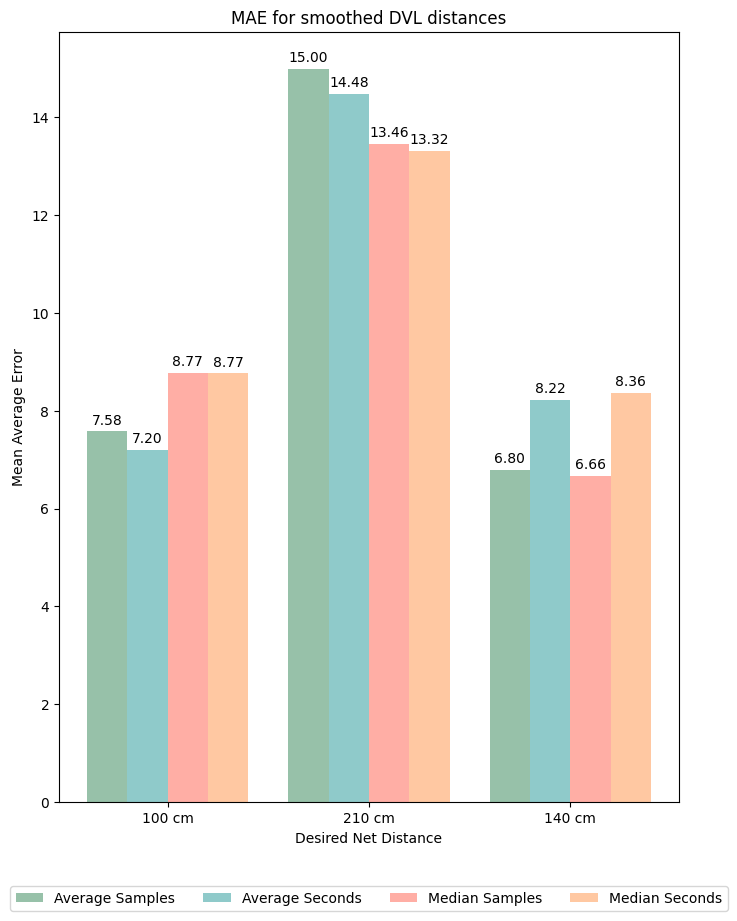

In [279]:
import numpy as np
import matplotlib.pyplot as plt

# Define MAE values
mae_100 = [DVL_mae_100_average_samples, DVL_mae_100_average_sec, DVL_mae_100_median_samples, DVL_mae_100_median_sec]
mae_210 = [DVL_mae_210_average_samples, DVL_mae_210_average_sec, DVL_mae_210_median_samples, DVL_mae_210_median_sec]
mae_140 = [DVL_mae_140_average_samples, DVL_mae_140_average_sec, DVL_mae_140_median_samples, DVL_mae_140_median_sec]

# Convert MAE values to numpy array
mae_values = np.array([mae_100, mae_210, mae_140])

# Define group labels and bar width
labels = ['100 cm', '210 cm', '140 cm']
bar_width = 0.2

# Set up x-axis locations for the bars
x = np.arange(len(labels))

# Define labels for each type of MAE
mae_labels = ['Average Samples', 'Average Seconds', 'Median Samples', 'Median Seconds']

colors = ['#97C1A9', '#8FCACA', '#FFAEA5', '#FFC8A2']

# Plot grouped bars
fig, ax = plt.subplots(figsize=(8, 10))
for i in range(4):
    bars = ax.bar(x + i * bar_width, mae_values[:, i], width=bar_width, label=mae_labels[i], color = colors[i])
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Add labels and title
ax.set_xlabel('Desired Net Distance')
ax.set_ylabel('Mean Average Error')
ax.set_title('MAE for smoothed DVL distances')
ax.set_xticks(x + 1.5 * bar_width)
ax.set_xticklabels(labels)

# Create a separate subplot for the legend
legend_ax = fig.add_subplot(111, frameon=False)
legend_ax.axis('off')
legend_ax.legend(*ax.get_legend_handles_labels(), loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=4)

plt.show()


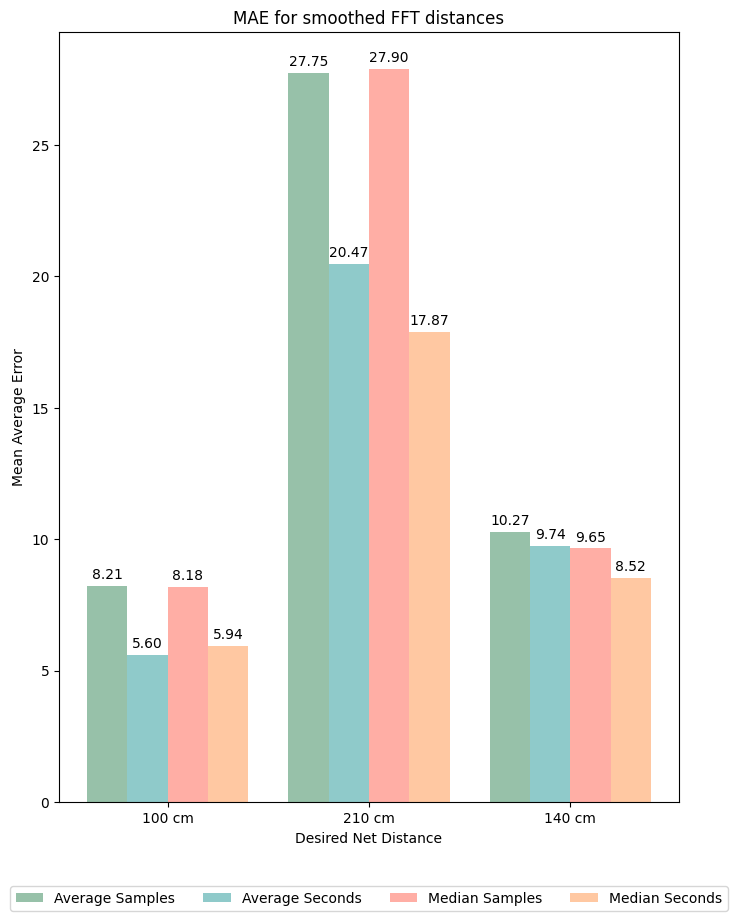

In [278]:
import numpy as np
import matplotlib.pyplot as plt

# Define MAE values
mae_100 = [FFT_mae_100_average_samples, FFT_mae_100_average_sec, FFT_mae_100_median_samples, FFT_mae_100_median_sec]
mae_210 = [FFT_mae_210_average_samples, FFT_mae_210_average_sec, FFT_mae_210_median_samples, FFT_mae_210_median_sec]
mae_140 = [FFT_mae_140_average_samples, FFT_mae_140_average_sec, FFT_mae_140_median_samples, FFT_mae_140_median_sec]

# Convert MAE values to numpy array
mae_values = np.array([mae_100, mae_210, mae_140])

# Define group labels and bar width
labels = ['100 cm', '210 cm', '140 cm']
bar_width = 0.2

# Set up x-axis locations for the bars
x = np.arange(len(labels))

# Define labels for each type of MAE
mae_labels = ['Average Samples', 'Average Seconds', 'Median Samples', 'Median Seconds']

colors = ['#97C1A9', '#8FCACA', '#FFAEA5', '#FFC8A2']

# Plot grouped bars
fig, ax = plt.subplots(figsize=(8, 10))
for i in range(4):
    bars = ax.bar(x + i * bar_width, mae_values[:, i], width=bar_width, label=mae_labels[i], color = colors[i])
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Add labels and title
ax.set_xlabel('Desired Net Distance')
ax.set_ylabel('Mean Average Error')
ax.set_title('MAE for smoothed FFT distances')
ax.set_xticks(x + 1.5 * bar_width)
ax.set_xticklabels(labels)

# Create a separate subplot for the legend
legend_ax = fig.add_subplot(111, frameon=False)
legend_ax.axis('off')
legend_ax.legend(*ax.get_legend_handles_labels(), loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=4)

plt.show()

## RMSE

In [287]:

def RMSE(net_distance, desired_net_distance):
    error = np.abs(np.array(net_distance) - [desired_net_distance] * len(net_distance))
    rmse = np.sqrt(np.mean(np.square(error)))
    return rmse


dist_100 = net_dist_d[17]
dist_210 = net_dist_d[42]
dist_140 = net_dist_d[90]



DVL_rmse_100_average_samples = RMSE(net_distance_100_DVL_average_samples, dist_100)
DVL_rmse_210_average_samples = RMSE(net_distance_210_DVL_average_samples, dist_210)
DVL_rmse_140_average_samples = RMSE(net_distance_140_DVL_average_samples, dist_140)

DVL_rmse_100_average_sec = RMSE(net_distance_100_DVL_average_sec, dist_100)
DVL_rmse_210_average_sec = RMSE(net_distance_210_DVL_average_sec, dist_210)
DVL_rmse_140_average_sec = RMSE(net_distance_140_DVL_average_sec, dist_140)

DVL_rmse_100_median_samples = RMSE(net_distance_100_DVL_median_samples, dist_100)
DVL_rmse_210_median_samples = RMSE(net_distance_210_DVL_median_samples, dist_210)
DVL_rmse_140_median_samples = RMSE(net_distance_140_DVL_median_samples, dist_140)

DVL_rmse_100_median_sec = RMSE(net_distance_100_DVL_median_sec, dist_100)
DVL_rmse_210_median_sec = RMSE(net_distance_210_DVL_median_sec, dist_210)
DVL_rmse_140_median_sec = RMSE(net_distance_140_DVL_median_sec, dist_140)

FFT_rmse_100_average_samples = RMSE(net_distance_100_FFT_average_samples, dist_100)
FFT_rmse_210_average_samples = RMSE(net_distance_210_FFT_average_samples, dist_210)
FFT_rmse_140_average_samples = RMSE(net_distance_140_FFT_average_samples, dist_140)

FFT_rmse_100_average_sec = RMSE(net_distance_100_FFT_average_sec, dist_100)
FFT_rmse_210_average_sec = RMSE(net_distance_210_FFT_average_sec, dist_210)
FFT_rmse_140_average_sec = RMSE(net_distance_140_FFT_average_sec, dist_140)

FFT_rmse_100_median_samples = RMSE(net_distance_100_FFT_median_samples, dist_100)
FFT_rmse_210_median_samples = RMSE(net_distance_210_FFT_median_samples, dist_210)
FFT_rmse_140_median_samples = RMSE(net_distance_140_FFT_median_samples, dist_140)

FFT_rmse_100_median_sec = RMSE(net_distance_100_FFT_median_sec, dist_100)
FFT_rmse_210_median_sec = RMSE(net_distance_210_FFT_median_sec, dist_210)
FFT_rmse_140_median_sec = RMSE(net_distance_140_FFT_median_sec, dist_140)


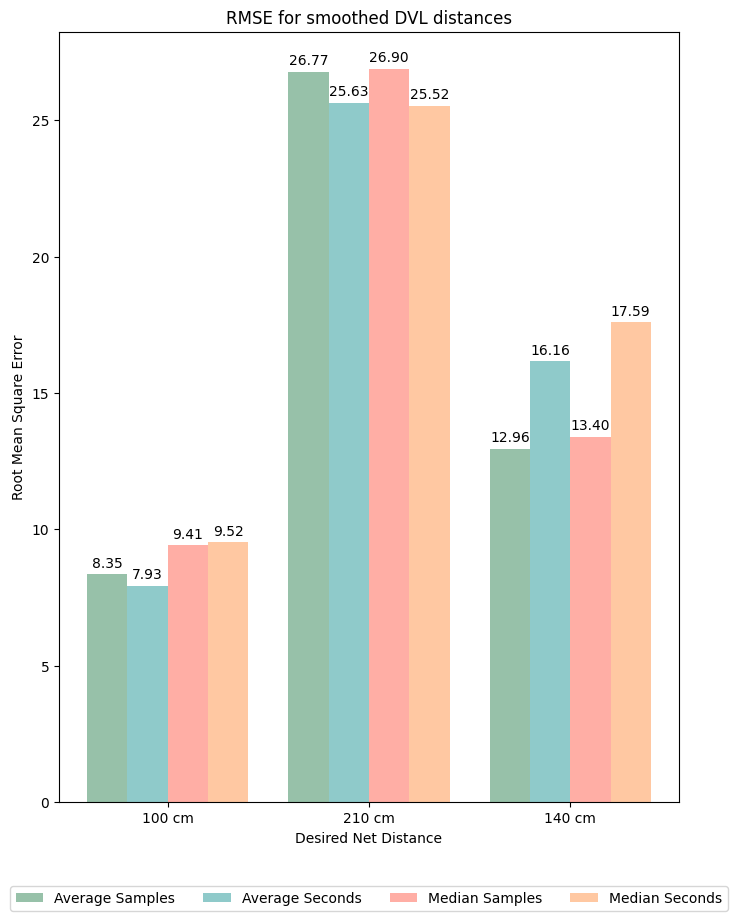

In [289]:
import numpy as np
import matplotlib.pyplot as plt

# Define MAE values
rmse_100 = [DVL_rmse_100_average_samples, DVL_rmse_100_average_sec, DVL_rmse_100_median_samples, DVL_rmse_100_median_sec]
rmse_210 = [DVL_rmse_210_average_samples, DVL_rmse_210_average_sec, DVL_rmse_210_median_samples, DVL_rmse_210_median_sec]
rmse_140 = [DVL_rmse_140_average_samples, DVL_rmse_140_average_sec, DVL_rmse_140_median_samples, DVL_rmse_140_median_sec]

# Convert MAE values to numpy array
rmse_values = np.array([rmse_100, rmse_210, rmse_140])

# Define group labels and bar width
labels = ['100 cm', '210 cm', '140 cm']
bar_width = 0.2

# Set up x-axis locations for the bars
x = np.arange(len(labels))

# Define labels for each type of MAE
mae_labels = ['Average Samples', 'Average Seconds', 'Median Samples', 'Median Seconds']

colors = ['#97C1A9', '#8FCACA', '#FFAEA5', '#FFC8A2']

# Plot grouped bars
fig, ax = plt.subplots(figsize=(8, 10))
for i in range(4):
    bars = ax.bar(x + i * bar_width, rmse_values[:, i], width=bar_width, label=mae_labels[i], color = colors[i])
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Add labels and title
ax.set_xlabel('Desired Net Distance')
ax.set_ylabel('Root Mean Square Error')
ax.set_title('RMSE for smoothed DVL distances')
ax.set_xticks(x + 1.5 * bar_width)
ax.set_xticklabels(labels)

# Create a separate subplot for the legend
legend_ax = fig.add_subplot(111, frameon=False)
legend_ax.axis('off')
legend_ax.legend(*ax.get_legend_handles_labels(), loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=4)

plt.show()

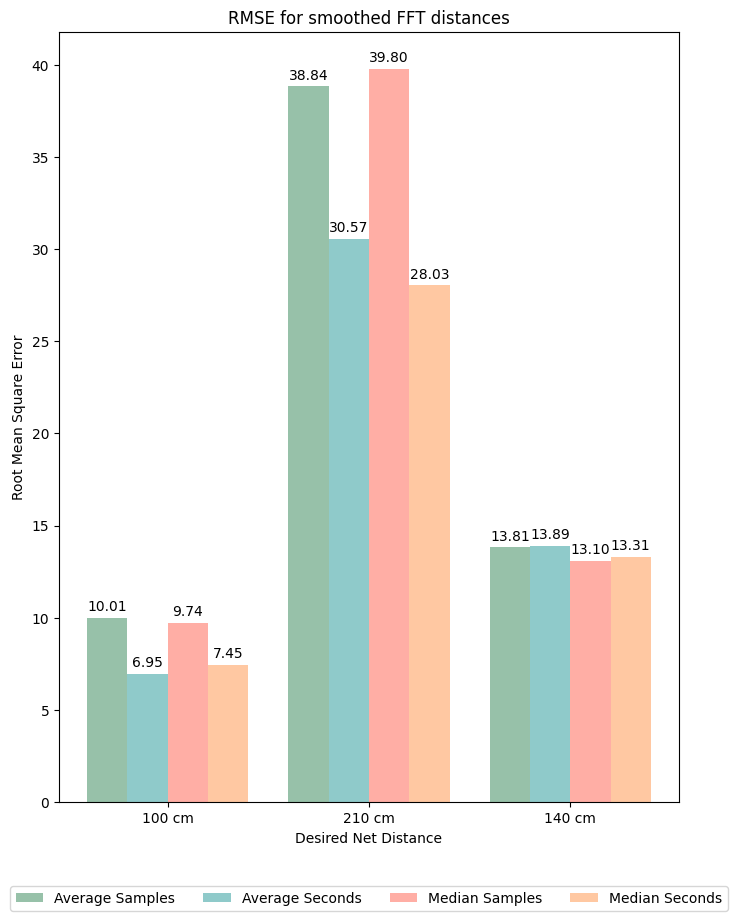

In [288]:
import numpy as np
import matplotlib.pyplot as plt

# Define MAE values
rmse_100 = [FFT_rmse_100_average_samples, FFT_rmse_100_average_sec, FFT_rmse_100_median_samples, FFT_rmse_100_median_sec]
rmse_210 = [FFT_rmse_210_average_samples, FFT_rmse_210_average_sec, FFT_rmse_210_median_samples, FFT_rmse_210_median_sec]
rmse_140 = [FFT_rmse_140_average_samples, FFT_rmse_140_average_sec, FFT_rmse_140_median_samples, FFT_rmse_140_median_sec]

# Convert MAE values to numpy array
rmse_values = np.array([rmse_100, rmse_210, rmse_140])

# Define group labels and bar width
labels = ['100 cm', '210 cm', '140 cm']
bar_width = 0.2

# Set up x-axis locations for the bars
x = np.arange(len(labels))

# Define labels for each type of MAE
mae_labels = ['Average Samples', 'Average Seconds', 'Median Samples', 'Median Seconds']

colors = ['#97C1A9', '#8FCACA', '#FFAEA5', '#FFC8A2']

# Plot grouped bars
fig, ax = plt.subplots(figsize=(8, 10))
for i in range(4):
    bars = ax.bar(x + i * bar_width, rmse_values[:, i], width=bar_width, label=mae_labels[i], color = colors[i])
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Add labels and title
ax.set_xlabel('Desired Net Distance')
ax.set_ylabel('Root Mean Square Error')
ax.set_title('RMSE for smoothed FFT distances')
ax.set_xticks(x + 1.5 * bar_width)
ax.set_xticklabels(labels)

# Create a separate subplot for the legend
legend_ax = fig.add_subplot(111, frameon=False)
legend_ax.axis('off')
legend_ax.legend(*ax.get_legend_handles_labels(), loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=4)

plt.show()

# Net distance: FFT vs DVL
In the FFT, only the well detections of the net are used.

Two graphs are showed. one with the original stereo images and one which is turned upside down such that the video is the right way (i.e. such that the fish is the right way on the video). However it seems that the turned grapg gives worse results so I will continue working with the original video used in FFT method.

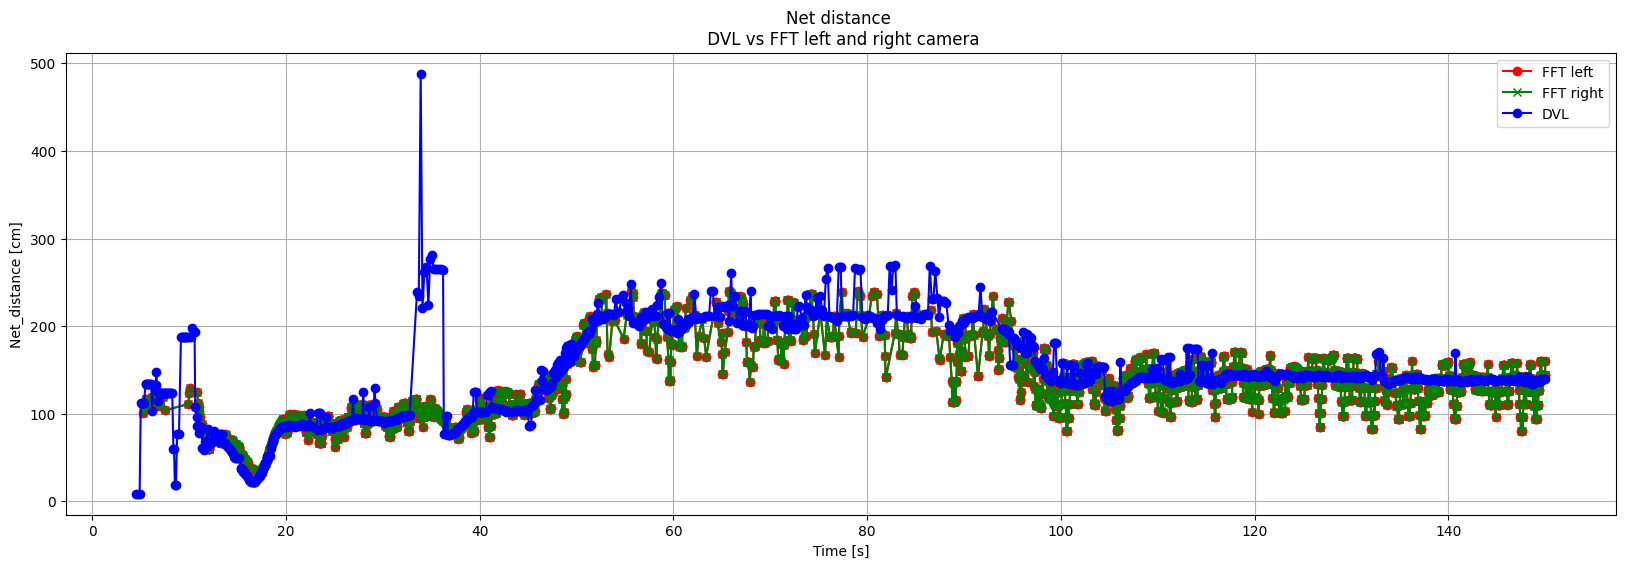

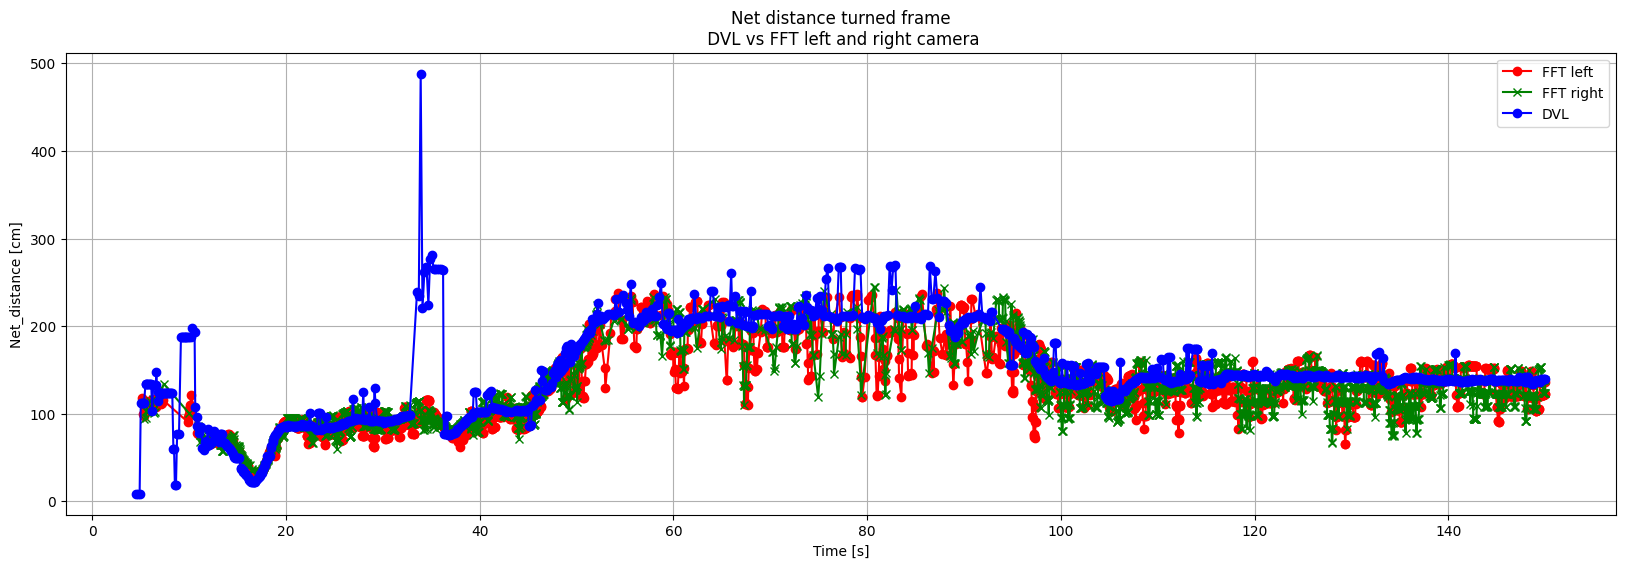

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))
plt.plot(FFT_time_left_well, FFT_net_distance_left_well, color='r', marker='o', linestyle='-', label="FFT left")
plt.plot(FFT_time_right_well, FFT_net_distance_right_well, color='g', marker='x', linestyle='-', label="FFT right")
plt.plot(DVL_time, DVL_net_distance, color='b', marker='o', linestyle='-', label="DVL")
plt.title('Net distance \n DVL vs FFT left and right camera')  # Corrected line
plt.xlabel('Time [s]')  # Corrected line
plt.ylabel('Net_distance [cm]')  # Corrected line
plt.legend()
plt.grid(True)
plt.show()




plt.figure(figsize=(20, 6))
plt.plot(FFT_time_right_rotated_well, FFT_net_distance_right_rotated_well, color='r', marker='o', linestyle='-', label="FFT left")
plt.plot(FFT_time_left_rotated_well, FFT_net_distance_left_rotated_well, color='g', marker='x', linestyle='-', label="FFT right")
plt.plot(DVL_time, DVL_net_distance, color='b', marker='o', linestyle='-', label="DVL")
plt.title('Net distance turned frame\n DVL vs FFT left and right camera')  # Corrected line
plt.xlabel('Time [s]')  # Corrected line
plt.ylabel('Net_distance [cm]')  # Corrected line
plt.legend()
plt.grid(True)
plt.show()


## statistic of error, for 1, 1.5, 2 meterd. divide the clip. ARgue and siscuss it it is close. DVL and FFT method. WHich method is better on distance.

## Shorten the graphs to only visualize distance when the ROV heading is approx. normal on net plane

In [ ]:
DVL_time_cut = []
DVL_net_distance_cut = []

for i in range(len(DVL_time)):
    if DVL_time[i] > FFT_time_left_cut[0]:
        DVL_time_cut.append(DVL_time[i])
        DVL_net_distance_cut.append(DVL_net_distance[i])


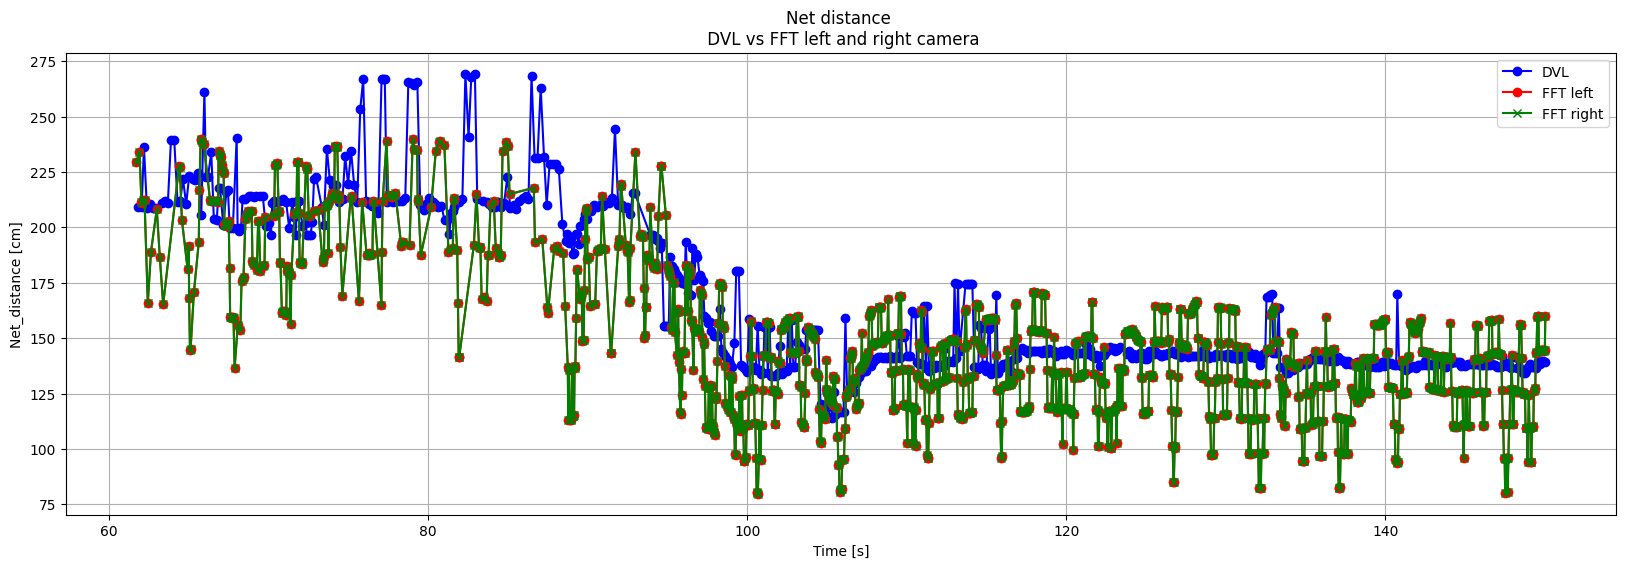

In [ ]:
import matplotlib.pyplot as plt

# Plot for FFT left camera net distance vs DVL
plt.figure(figsize=(20, 6))
plt.plot(DVL_time_cut, DVL_net_distance_cut, color='b', marker='o', linestyle='-', label="DVL")
plt.plot(FFT_time_left_cut, FFT_net_distance_left_cut, color='r', marker='o', linestyle='-', label="FFT left")
plt.plot(FFT_time_right_cut, FFT_net_distance_right_cut, color='g', marker='x', linestyle='-', label="FFT right")
plt.title('Net distance \n DVL vs FFT left and right camera')  # Corrected line
plt.xlabel('Time [s]')  # Corrected line
plt.ylabel('Net_distance [cm]')  # Corrected line
plt.legend()
plt.grid(True)
plt.show()

## Method to process FFT measurements ????????????


Smoothening Polynominal filtering, Hanne grete thesis did something, ...

First statistical, then smoothening, this is average smoothening.

Send an message to Bent asking about. Ask about when dvl and Stereo images are taken? on the same time? or how often?.

In [ ]:
print(time_stereo[0])
print(DVL_time_epoch[0])

print((time_stereo[40]-DVL_time_epoch[40]) /1e9)

1698758908028882100
1698758910999254600
-5


# YOLO to estimate net distance

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Image Display</title>
    <style>
        img {
            width: 50%; /* Adjust the width as needed */
            height: auto; /* Maintain aspect ratio */
        }
        h1 {
            font-size: 24px; /* Adjust the font size as needed */
        }
    </style>
</head>
<body>
    <h1>The sewing(?) line on the net will be used for stereo matching</h1>
    <img src="mp4_from_converter/netLine.png" alt="Image Description">
</body>
</html>


Several bounding boxes will me made on each line on 100 (?) images where the sewing line sometimes is skrå.